
# Machine Learning Assignment: Marketing Campaign Performance Prediction

Objective: Your task is to build a machine learning model that predicts the conversion rate of marketing campaigns based on various features.


# Tasks

` 1)Data Exploration and Preprocessing:`

- Explore the dataset to understand its characteristics.
- Handle any missing or anomalous data.
- Perform any necessary data transformation or scaling.

` 2)Feature Engineering:`
- Create new features if needed.
- Select relevant features for the model.

` 3)Model Building and Evaluation:`
- Choose a suitable machine learning algorithm for this regression problem.
- Train and validate your model. You may split the data into training and validation sets.
- Evaluate the model performance using appropriate metrics (e.g., RMSE, MAE).

` 4)Model Interpretation:`
- Interpret the results and provide insights.
- Discuss the importance of different features and their impact on the conversion rate.

` 5)Report and Code:`
-Prepare a brief report summarizing your methodology, findings, and any assumptions made.
-Include visualizations to support your analysis.
-Provide well-documented and clean code in a Jupyter Notebook or Python script.

### Submission Guidelines:
Submit your report and code through a collab notebook or a github repo
Ensure your code is reproducible and includes comments explaining your logic.
If you have made any assumptions or simplifications, clearly state them in your report.

### Evaluation Criteria:
Understanding of machine learning concepts and algorithms.
Ability to preprocess and analyze data effectively.
Quality and clarity of the code.
Insights and interpretation of the model's results.
Overall approach to solving the problem and communication in the report.


In [1]:
#!pip install missingno,optuna,xgboost,lightgbm
#!pip install xgboost
#!pip install lightgbm
#!pip install optuna

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler
import pickle
import optuna
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge

df = pd.read_csv('/home/ozkan/marketing_campaign_data_socail_media.csv',encoding='utf-8')
df.head(5)

,Campaign_Type,Duration,Budget,Audience_Size,Audience_Age_Group,Engagement_Rate,Conversion_Rate
0,Instagram,45,95.802761,75579,35-44,7.775563,1.890406
1,YouTube,26,84.123524,88376,18-24,1.971576,4.269139
2,Instagram,50,91.688038,99427,25-34,5.504620,0.702806
3,YouTube,41,61.214077,40325,25-34,7.387365,2.035973
4,YouTube,40,74.356604,10775,18-24,4.336349,4.858624


Campaign_Type         0.0
Duration              0.0
Budget                0.0
Audience_Size         0.0
Audience_Age_Group    0.0
Engagement_Rate       0.0
Conversion_Rate       0.0
dtype: float64
---------------------------
-------------------------------


<Axes: >

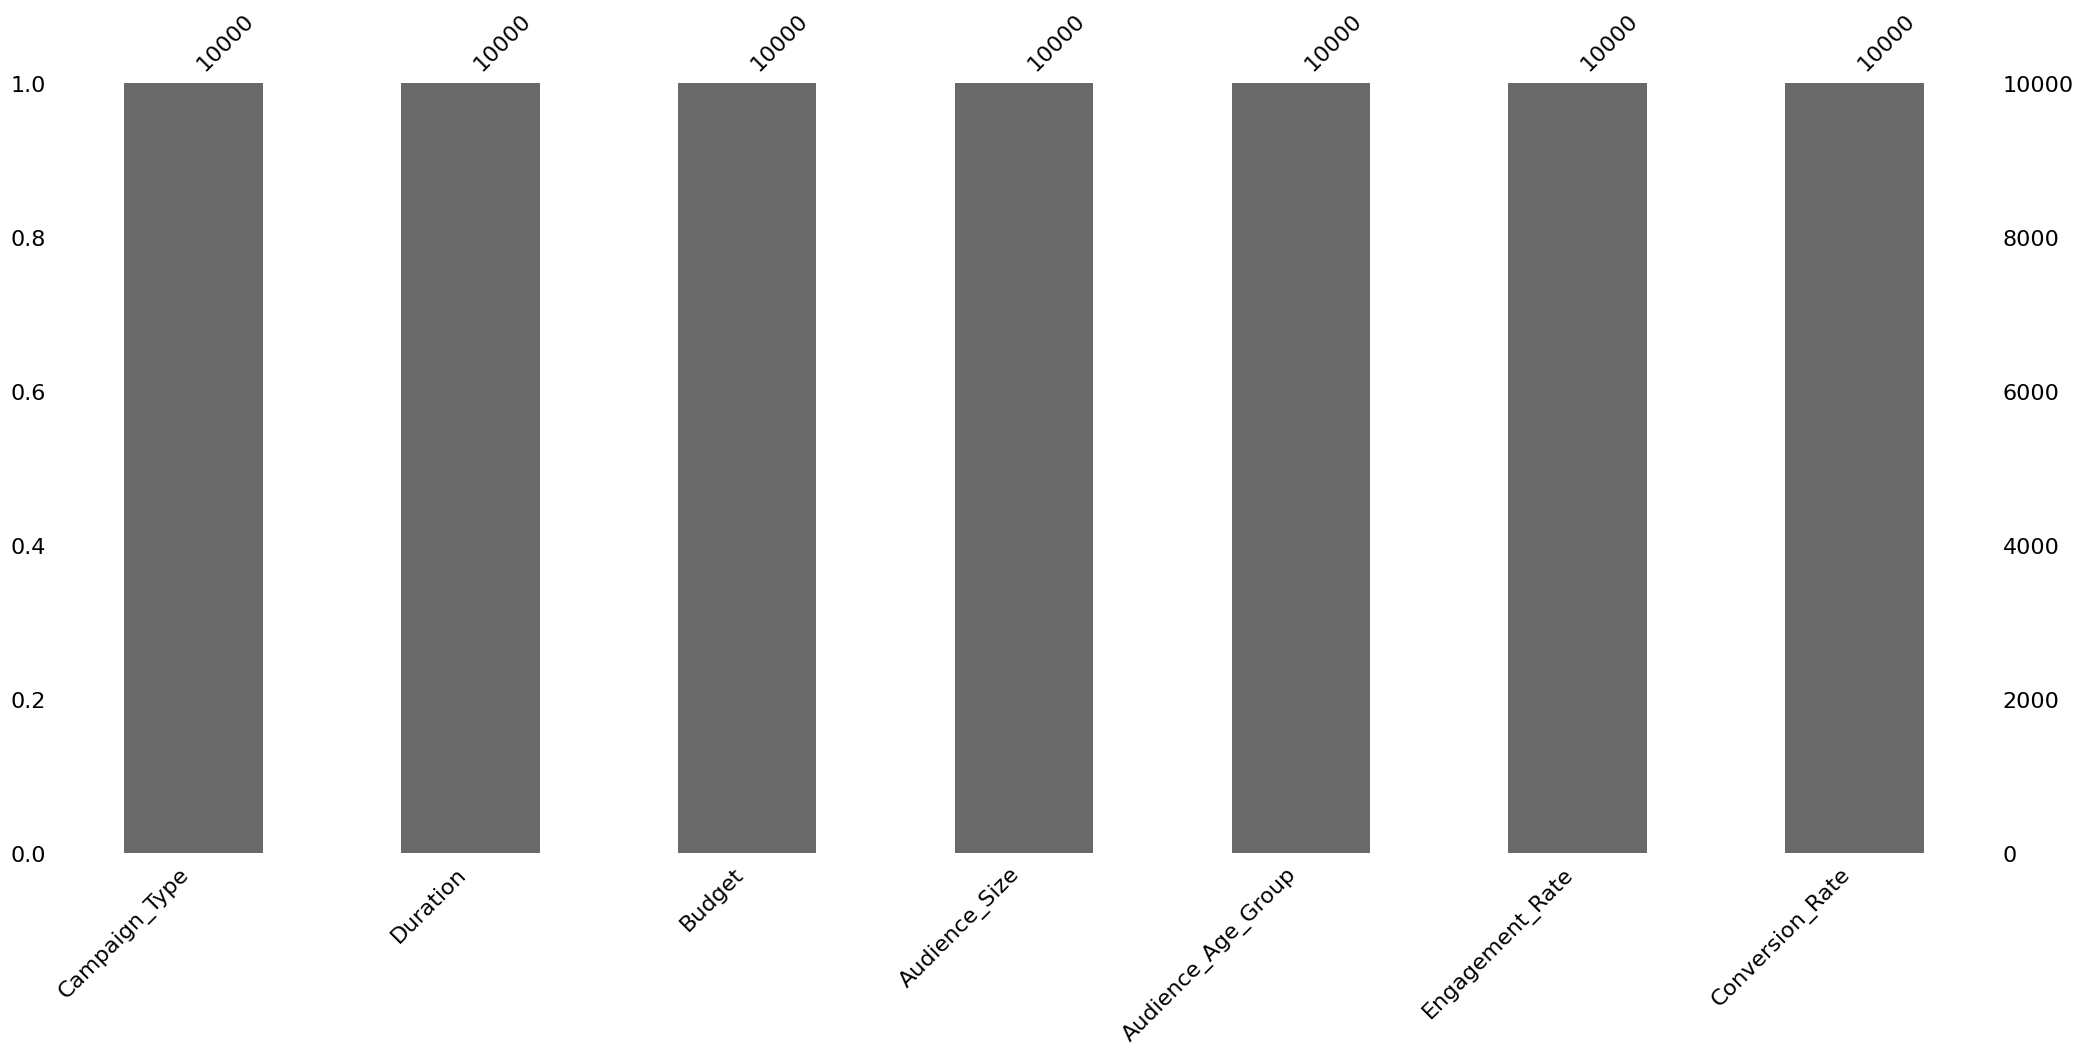

In [2]:
print(df.isnull().sum() * 100 / len(df)) #No missing value.
print('---------------------------')
df.duplicated().value_counts() #is there any duplicated value? -> False : 10000
print('-------------------------------')
msno.bar(df) 

In [3]:
col = []
d_type = []
uniques = []
n_uniques = []
for i in df.columns:
    col.append(i)
    d_type.append(df[i].dtypes)
    uniques.append(df[i].unique()[:10])
    n_uniques.append(df[i].nunique())

insight_df=pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_values': uniques, 'n_uniques': n_uniques})
insight_df

,Column,d_type,unique_values,n_uniques
0,Campaign_Type,object,"[Instagram, YouTube, Snapchat, Facebook, TikTok]",5
1,Duration,int64,"[45, 26, 50, 41, 40, 42, 33, 58, 6, 27]",59
2,Budget,float64,"[95.80276112896576, 84.12352444124747, 91.6880...",10000
3,Audience_Size,int64,"[75579, 88376, 99427, 40325, 10775, 85995, 237...",9523
4,Audience_Age_Group,object,"[35-44, 18-24, 25-34, 45-54, 55-64]",5
5,Engagement_Rate,float64,"[7.775562903000708, 1.971575504316236, 5.50462...",10000
6,Conversion_Rate,float64,"[1.890406068991072, 4.269138601926646, 0.70280...",10000


<Axes: xlabel='Duration hue with Campaign_Type', ylabel='Count'>

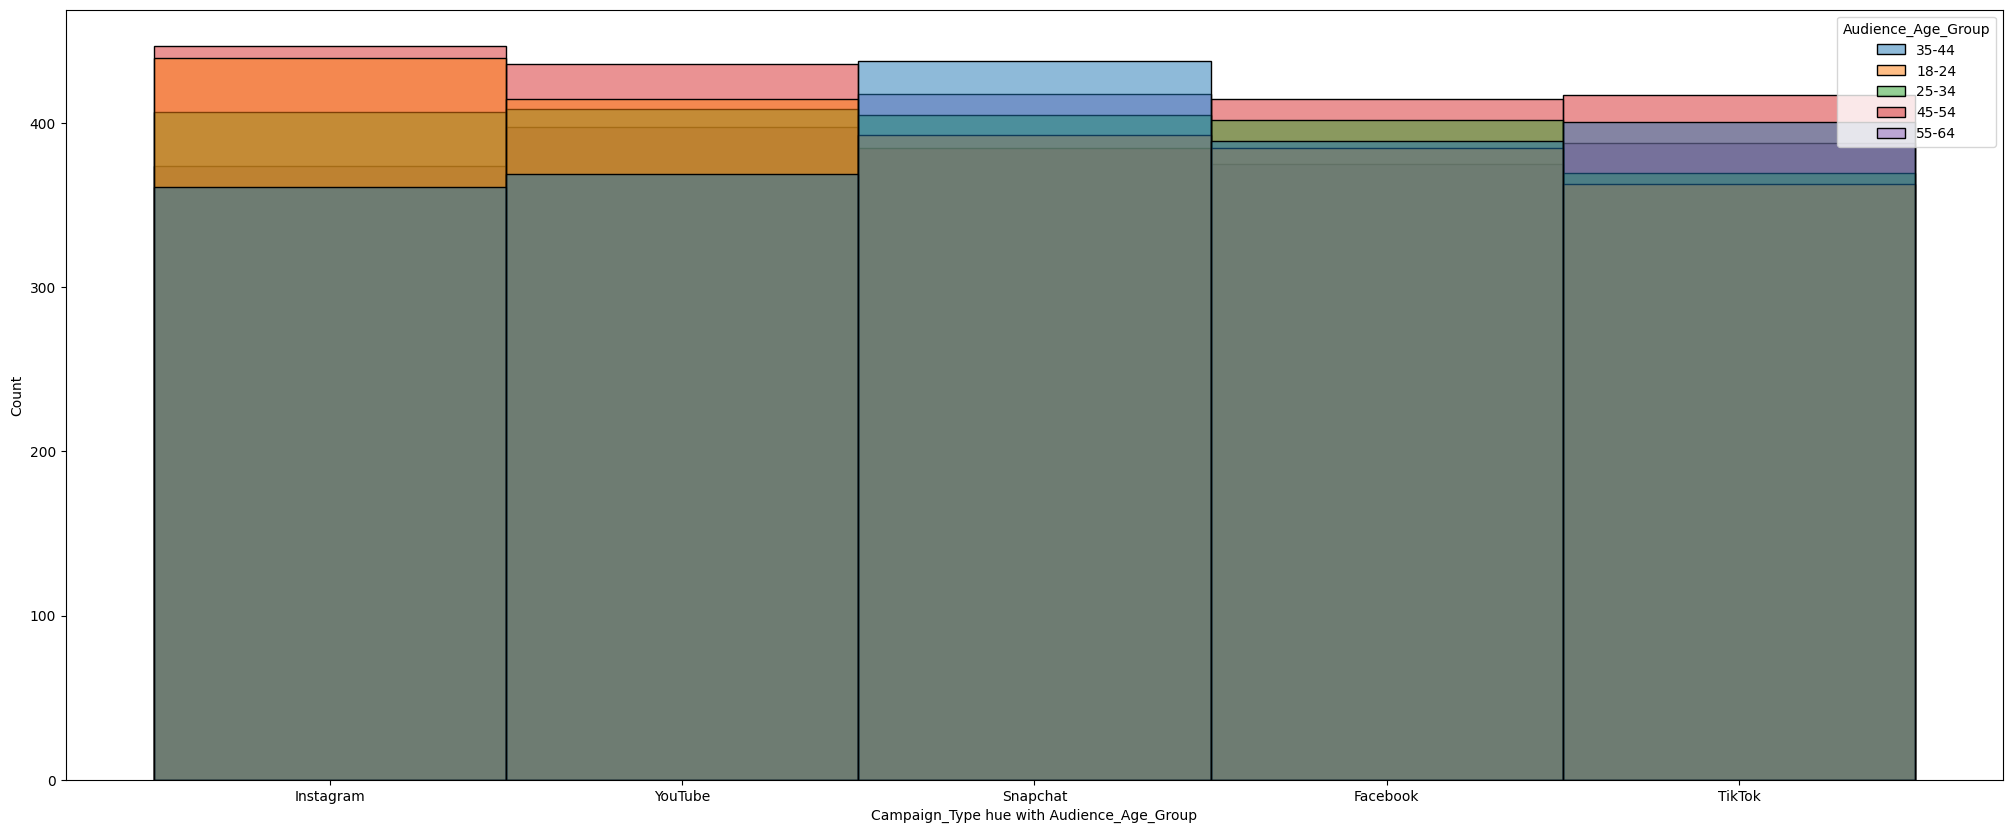

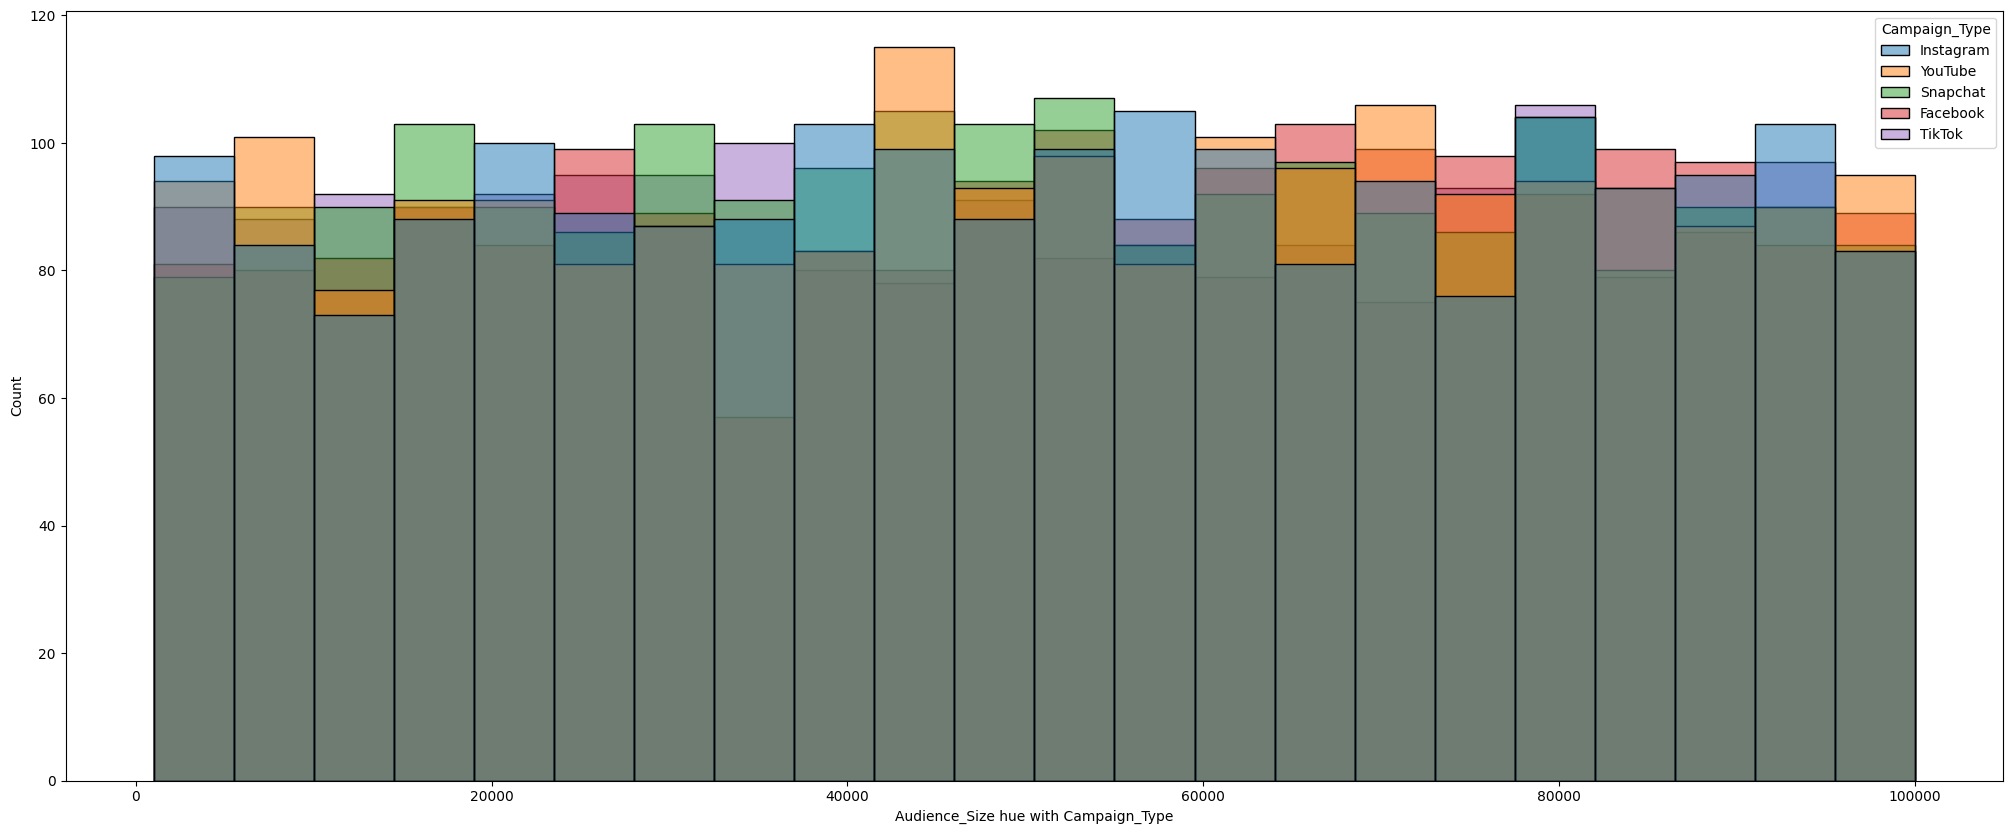

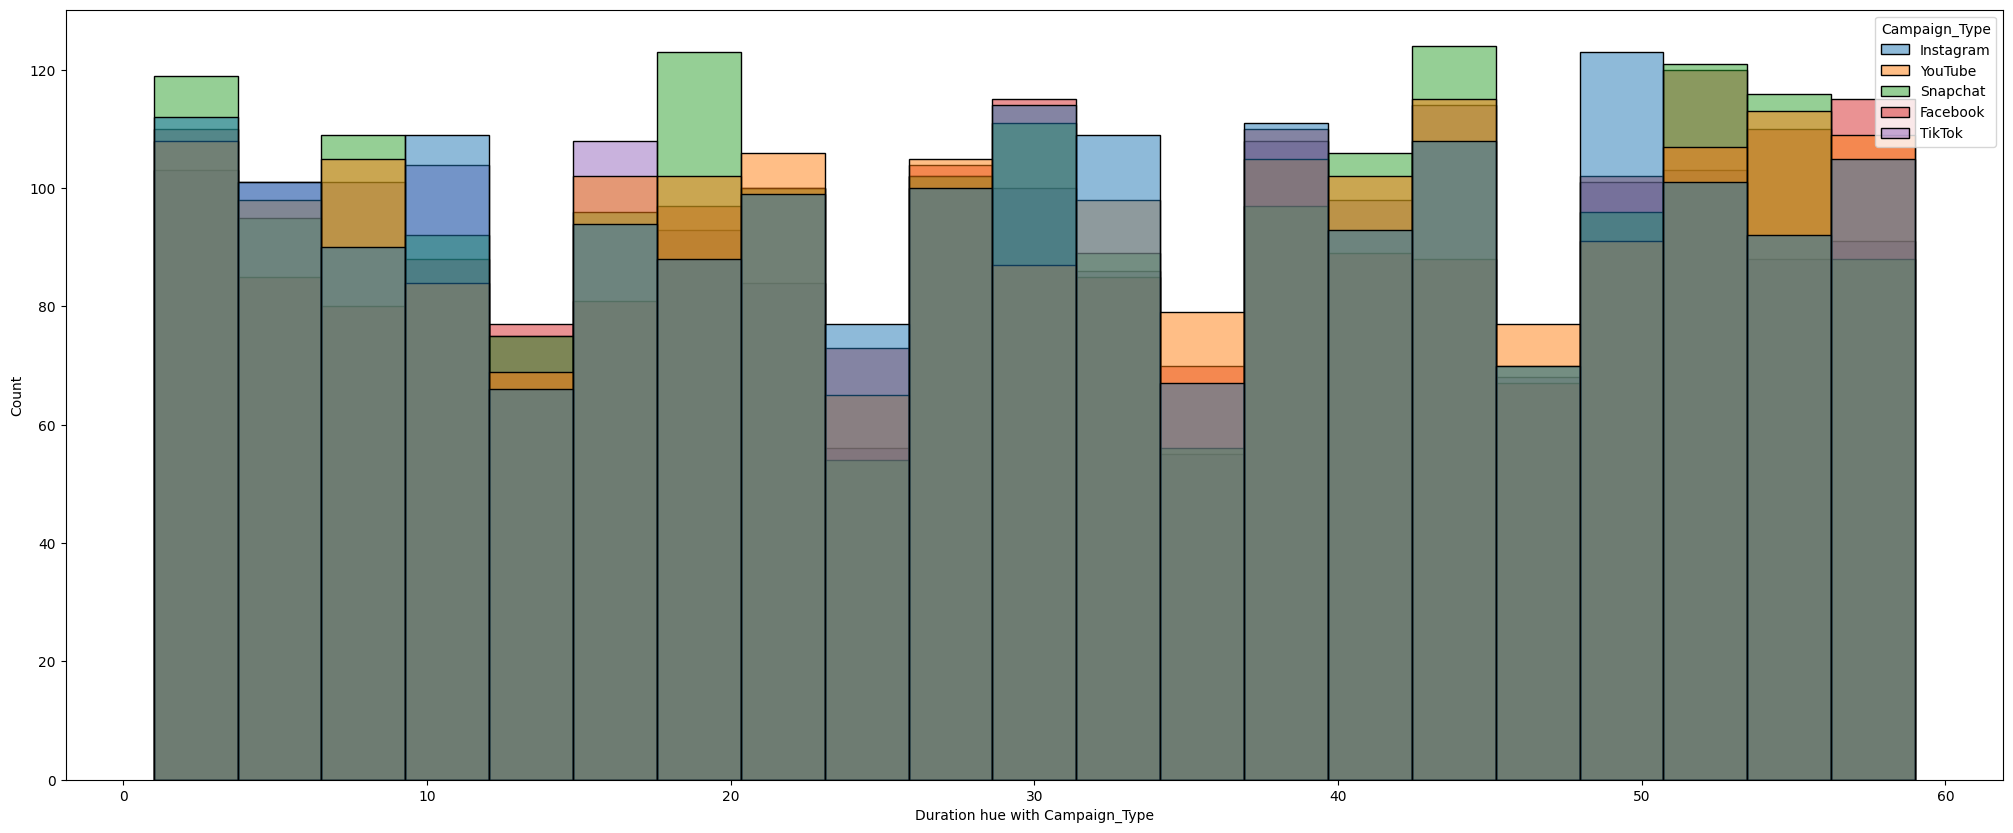

In [4]:
plt.figure(figsize=(25,10))
plt.xlabel('Campaign_Type hue with Audience_Age_Group')
sns.histplot(x=df["Campaign_Type"],hue='Audience_Age_Group',data=df)

plt.figure(figsize=(25,10))
plt.xlabel('Audience_Size hue with Campaign_Type')
sns.histplot(x=df["Audience_Size"],hue='Campaign_Type',data=df)
 
plt.figure(figsize=(25,10))
plt.xlabel('Duration hue with Campaign_Type')
sns.histplot(x=df["Duration"],hue='Campaign_Type',data=df)



# Heatmap

(7.5, -0.5)

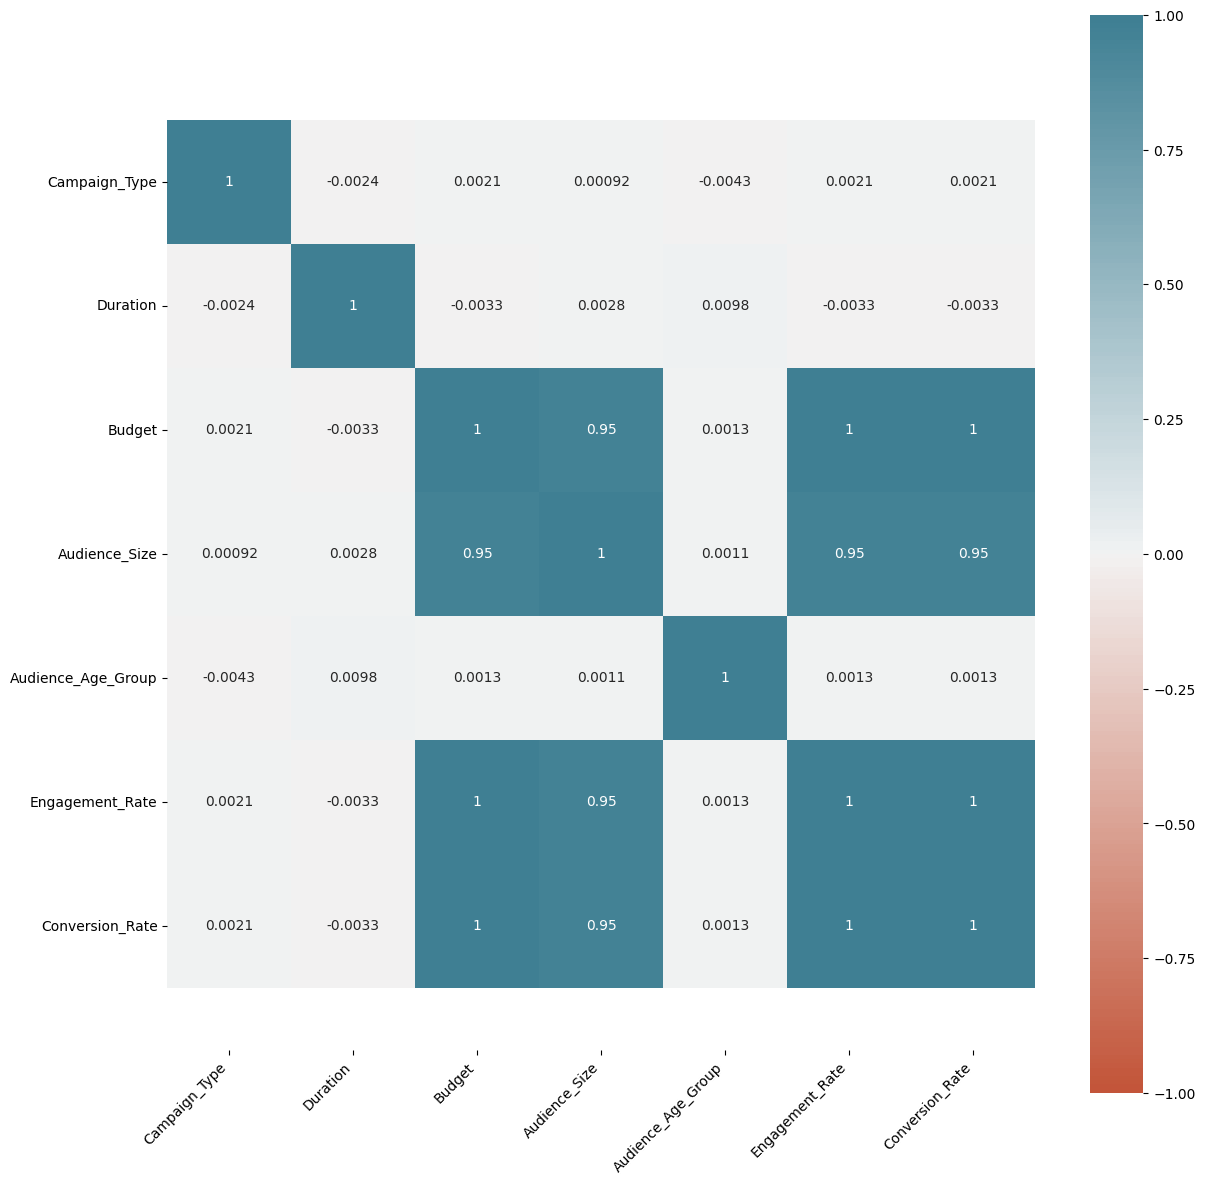

In [5]:
corr_df = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_df

# Corelation heatmap
corr = corr_df

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5)


# If we need use Transformation,: -Scaling,Outlier, 

count    10000.000000
mean         5.469257
std          2.596781
min          1.001260
25%          3.180886
50%          5.477351
75%          7.718424
max          9.997279
Name: Engagement_Rate, dtype: float64
-----------------

count    10000.000000
mean     50836.461400
std      28388.986716
min       1013.000000
25%      26391.000000
50%      51077.000000
75%      75305.250000
max      99999.000000
Name: Audience_Size, dtype: float64


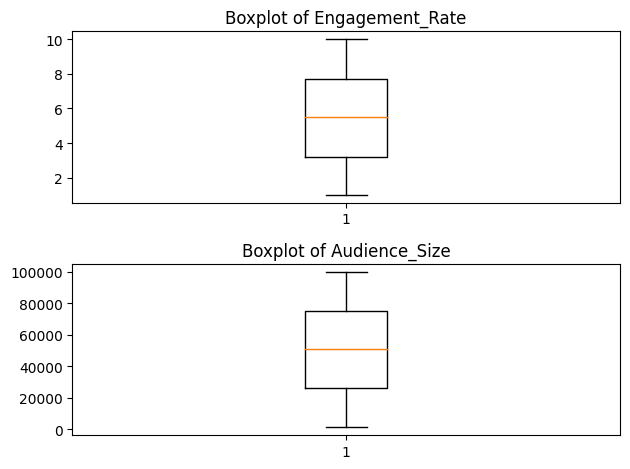

In [6]:
print(df['Engagement_Rate'].describe())
print('-----------------\n')
print(df['Audience_Size'].describe())

fig, axs = plt.subplots(2)
axs[0].boxplot(df['Engagement_Rate'])
axs[0].set_title('Boxplot of Engagement_Rate')


axs[1].boxplot(df['Audience_Size'])
axs[1].set_title('Boxplot of Audience_Size')

plt.tight_layout()
plt.show()


#df['Audience_Size'].mean() #50836.4614
#df['Engagement_Rate'].mean() #5.4692

#!TODO : Can be convertable Convert Type of Audience_Size & Engagement_Rate

<Axes: xlabel='Duration'>

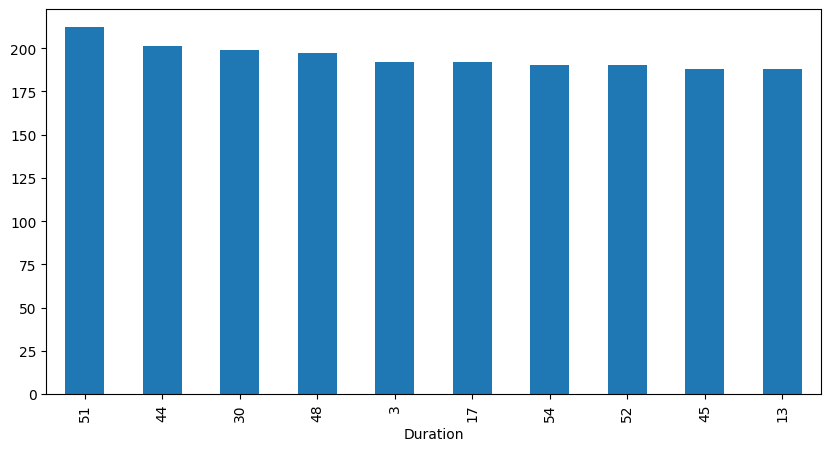

In [7]:
df['Duration'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5)) #nlargest=values  ->TODO:30dan büyükse 1 ay oldu mu kolonuna 1 olmadıysa 0 yapabılırız.

In [8]:
def print_group_stats(df, group_col):
    print(df.groupby(group_col).Budget.agg(["count", "mean", "median", "std", "min", "max"]))
    print('-----------------\n')

group_columns = ["Campaign_Type", "Audience_Age_Group"]

for col in group_columns:
    print_group_stats(df, col)


               count       mean     median        std        min        max
Campaign_Type                                                              
Facebook        1966  55.098447  55.899341  26.140936  10.051209  99.942496
Instagram       2029  55.037611  55.806357  25.782038  10.041969  99.986975
Snapchat        2039  54.703348  54.723271  25.925640  10.093961  99.957849
TikTok          1939  54.315078  54.772853  26.115757  10.031045  99.987006
YouTube         2027  55.806884  56.372709  26.268057  10.020753  99.968583
-----------------

                    count       mean     median        std        min  \
Audience_Age_Group                                                      
18-24                1996  53.880231  53.760993  26.286485  10.051931   
25-34                1993  54.855956  55.803743  25.783199  10.051209   
35-44                1958  55.543339  56.287895  25.944291  10.041969   
45-54                2100  55.348727  56.079035  26.059528  10.020753   
55-64      

In [9]:
duratıon_rate = df.groupby('Campaign_Type')['Duration'].value_counts().to_frame().rename(columns={'Duration': 'Freq'}).reset_index().sort_values('Campaign_Type')
print(duratıon_rate.head(10))
print('---------\n')
Audience_Age_Group_rate = df.groupby('Campaign_Type')['Audience_Age_Group'].value_counts().to_frame().rename(columns={'Audience_Age_Group': 'Freq'}).reset_index().sort_values('Campaign_Type')
print(Audience_Age_Group_rate.head(10))


   Campaign_Type  Duration  count
0       Facebook         3     50
32      Facebook        40     31
33      Facebook        50     31
34      Facebook        28     31
35      Facebook        49     31
36      Facebook        44     31
37      Facebook        41     30
38      Facebook        34     30
39      Facebook        55     30
40      Facebook        25     30
---------

  Campaign_Type Audience_Age_Group  count
0      Facebook              45-54    415
1      Facebook              25-34    402
2      Facebook              35-44    389
3      Facebook              18-24    385
4      Facebook              55-64    375
5     Instagram              45-54    447
6     Instagram              18-24    440
7     Instagram              25-34    407
8     Instagram              55-64    374
9     Instagram              35-44    361


# Scaling

In [10]:
scaler = MinMaxScaler(feature_range=(1, 10))
df['Audience_Size_Scaled'] = scaler.fit_transform(df[['Audience_Size']])
print(df['Audience_Size_Scaled'].describe())

count    10000.000000
mean         5.530046
std          2.581182
min          1.000000
25%          3.307417
50%          5.551916
75%          7.754796
max         10.000000
Name: Audience_Size_Scaled, dtype: float64


# Feature Engineering

In [11]:
#df['Duration'].max() #59 not 2 month
#df['Campaign_Type'].value_counts() # Snapchat     2039,Instagram    2029,YouTube      2027,Facebook     1966,TikTok       1939
#df['Audience_Age_Group'].value_counts() # 45-54:    2100,  18-24:    1996,  25-34:    1993, 35-44:    1958,   55-64:    1953

def categorize_duration(duration):
    if duration <=30:
        return 0 
    elif 30 < duration <=60 :
        return 1
    else : 
        return 2


def generate_category_of_Campaign(row):
    if row['Campaign_Type'] == 'Snapchat':
        return 1
    elif row['Campaign_Type'] == 'Instagram':
        return 2
    elif row['Campaign_Type'] == 'YouTube':
        return 3
    elif row['Campaign_Type'] == 'Facebook':
        return 4
    elif row['Campaign_Type'] == 'TikTok':
        return 5
    else:
        return 'Unknown'


def generate_category_of_Age(row):
    if row['Audience_Age_Group'] == '45-54':
        return 1
    elif row['Audience_Age_Group'] == '18-24':
        return 2
    elif row['Audience_Age_Group'] == '25-34':
        return 3
    elif row['Audience_Age_Group'] == '35-44':
        return 4
    elif row['Audience_Age_Group'] == '55-64':
        return 5
    else:
        return 'Unknown'


df['Month_Of_Duration'] = df['Duration'].apply(categorize_duration)
df['Category_of_Campaign_Type'] = df.apply(generate_category_of_Campaign, axis=1)
df['Category_of_Audience_Age'] = df.apply(generate_category_of_Age, axis=1)



In [12]:
numerical_values = ['Budget', 'Audience_Size', 'Engagement_Rate']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_data = poly.fit_transform(df[numerical_values])


interaction_features = poly.get_feature_names_out(input_features=numerical_values)
interaction_df = pd.DataFrame(interaction_data, columns=interaction_features)
df = pd.merge(df, interaction_df, on='Budget', how='left')


df['Duration_in_weeks'] = df['Duration'] / 7
df['Duration_in_months'] = df['Duration'] / 30
df['Duration_fraction_of_year'] = df['Duration'] / 365

# binned features
df['Budget_binned'] = pd.cut(df['Budget'], bins=10)
df['Audience_Size_binned'] = pd.cut(df['Audience_Size_x'], bins=10)
df['Engagement_Rate_binned'] = pd.cut(df['Engagement_Rate_x'], bins=10)

# log 
df['Budget_log'] = np.log(df['Budget'])
df['Audience_Size_log'] = np.log(df['Audience_Size_x'])
df['Engagement_Rate_log'] = np.log(df['Engagement_Rate_x'])

# Interaction between categorical variables
df['Campaign_Type_Audience_Age_Group'] = df['Campaign_Type'] + "_" + df['Audience_Age_Group']

# ^2
df['Budget_squared'] = df['Budget'] ** 2
df['Audience_Size_squared'] = df['Audience_Size_x'] ** 2
df['Engagement_Rate_squared'] = df['Engagement_Rate_x'] ** 2

# ^3
df['Budget_cubed'] = df['Budget'] ** 3
df['Audience_Size_cubed'] = df['Audience_Size_x'] ** 3
df['Engagement_Rate_cubed'] = df['Engagement_Rate_x'] ** 3

# Inverse of numerical variables
df['Budget_inverse'] = 1 / df['Budget']
df['Audience_Size_inverse'] = 1 / df['Audience_Size_x']
df['Engagement_Rate_inverse'] = 1 / df['Engagement_Rate_x']

#Drop Categorical Value
df.drop(['Campaign_Type','Audience_Age_Group'],axis=1,inplace=True)

df.head()

,Duration,Budget,Audience_Size_x,Engagement_Rate_x,Conversion_Rate,Audience_Size_Scaled,Month_Of_Duration,Category_of_Campaign_Type,Category_of_Audience_Age,Audience_Size_y,Engagement_Rate_y,Budget Audience_Size,Budget Engagement_Rate,Audience_Size Engagement_Rate,Duration_in_weeks,Duration_in_months,Duration_fraction_of_year,Budget_binned,Audience_Size_binned,Engagement_Rate_binned,Budget_log,Audience_Size_log,Engagement_Rate_log,Campaign_Type_Audience_Age_Group,Budget_squared,Audience_Size_squared,Engagement_Rate_squared,Budget_cubed,Audience_Size_cubed,Engagement_Rate_cubed,Budget_inverse,Audience_Size_inverse,Engagement_Rate_inverse
0,45,95.802761,75579,7.775563,1.890406,7.779686,1,2,4,75579.0,7.775563,7.240677e+06,744.920395,587669.268646,6.428571,1.500000,0.123288,"(90.99, 99.987]","(70303.2, 80201.8]","(7.298, 8.198]",4.562292,11.232934,2.050986,Instagram_35-44,9178.169040,5712185241,60.459378,879293.936134,431721248329539,470.105700,0.010438,0.000013,0.128608
1,26,84.123524,88376,1.971576,4.269139,8.943214,0,3,2,88376.0,1.971576,7.434501e+06,165.855880,174239.956769,3.714286,0.866667,0.071233,"(81.994, 90.99]","(80201.8, 90100.4]","(1.901, 2.8]",4.432286,11.389356,0.678833,YouTube_18-24,7076.767364,7810317376,3.887110,595322.612346,690244608421376,7.663731,0.011887,0.000011,0.507209
2,50,91.688038,99427,5.504620,0.702806,9.947993,1,2,3,99427.0,5.504620,9.116267e+06,504.707816,547307.861490,7.142857,1.666667,0.136986,"(90.99, 99.987]","(90100.4, 99999.0]","(5.499, 6.399]",4.518392,11.507179,1.705588,Instagram_25-34,8406.696303,9885728329,30.300842,770793.489707,982908310567483,166.794625,0.010907,0.000010,0.181666
3,41,61.214077,40325,7.387365,2.035973,4.574324,1,3,3,40325.0,7.387365,2.468458e+06,452.210732,297895.493275,5.857143,1.366667,0.112329,"(55.004, 64.001]","(30708.8, 40607.4]","(7.298, 8.198]",4.114377,10.604727,1.999771,YouTube_25-34,3747.163259,1626105625,54.573162,229379.141347,65572709328125,403.151863,0.016336,0.000025,0.135366
4,40,74.356604,10775,4.336349,4.858624,1.887580,1,3,2,10775.0,4.336349,8.011924e+05,322.436207,46724.163469,5.714286,1.333333,0.109589,"(72.997, 81.994]","(914.014, 10911.6]","(3.7, 4.6]",4.308872,9.284984,1.467033,YouTube_18-24,5528.904603,116100625,18.803925,411110.571729,1250984234375,81.540387,0.013449,0.000093,0.230609


# Train test split and model

In [13]:
# List of columns to be one-hot.
cols_to_encode = ['Budget_binned', 'Audience_Size_binned', 'Engagement_Rate_binned','Campaign_Type_Audience_Age_Group']
# Convert columns to string type and one-hot encode
df[cols_to_encode] = df[cols_to_encode].astype(str)
df = pd.get_dummies(df, columns=cols_to_encode)

# Conversion_Rate target variable
X = df.drop('Conversion_Rate', axis=1)
y = df['Conversion_Rate']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
print(f'MAE: {mean_absolute_error(y_val, y_pred)}')


cv_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error))

cv_mean = cv_scores.mean()

print(f'Cross-validation mean score: {cv_mean}')

RMSE: 1.4337060482440902
MAE: 1.2419903582614131
Cross-validation mean score: 2.0020904093659992


# Error Analysis

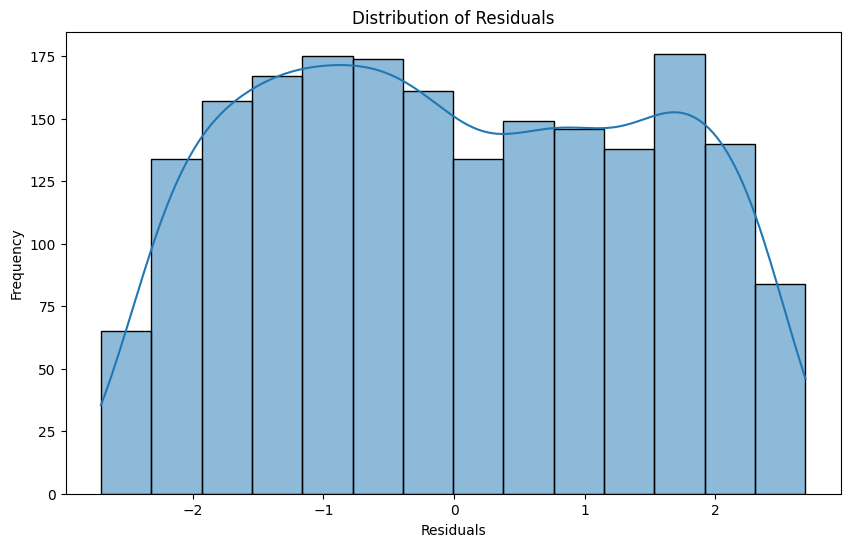

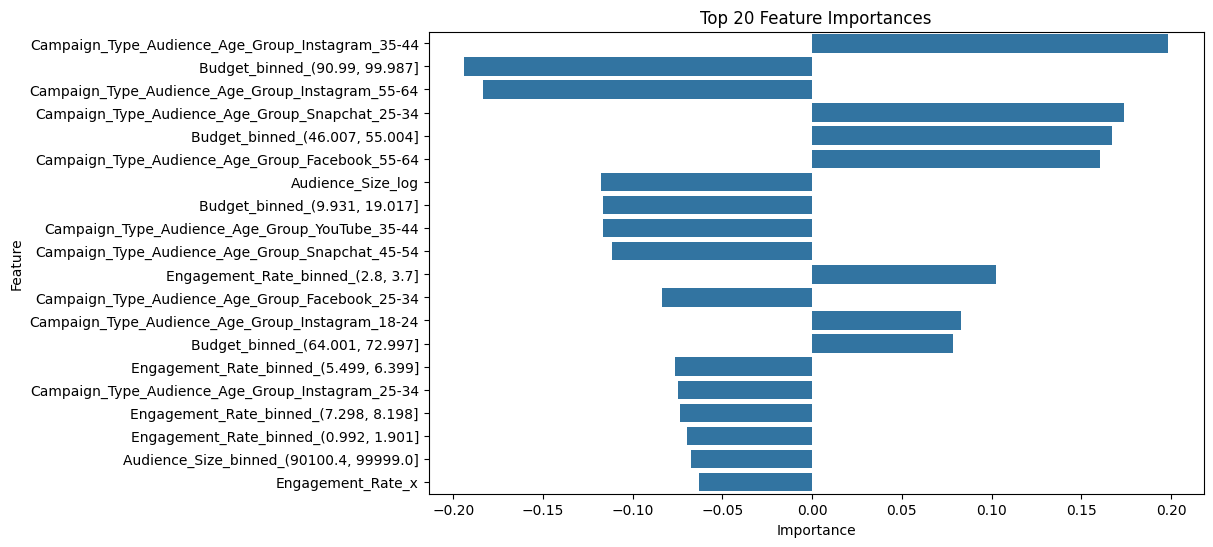

In [14]:
residuals = y_val - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


importances = model.coef_
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importances_df['abs_importance'] = importances_df['importance'].abs()
importances_df = importances_df.sort_values('abs_importance', ascending=False).drop('abs_importance', axis=1)


top_20_features = importances_df.head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_20_features)
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Lightgmb & XgBoost Algorithm's

In [15]:
X_train.columns = [str(i) for i in range(X_train.shape[1])]
X_val.columns = [str(i) for i in range(X_val.shape[1])]

model = LGBMRegressor(
    objective='regression',
    metric='rmse',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=0,
    n_estimators=100
)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
print(f'MAE: {mean_absolute_error(y_val, y_pred)}')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
cv_mean = -cv_scores.mean()
print(f'Cross-validation mean score: {cv_mean}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

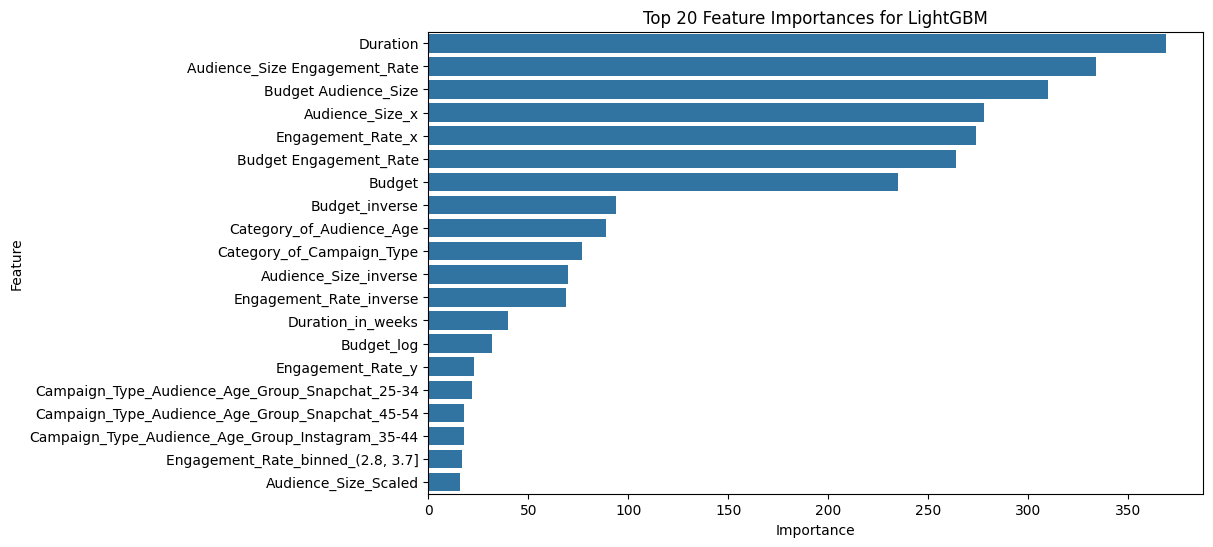

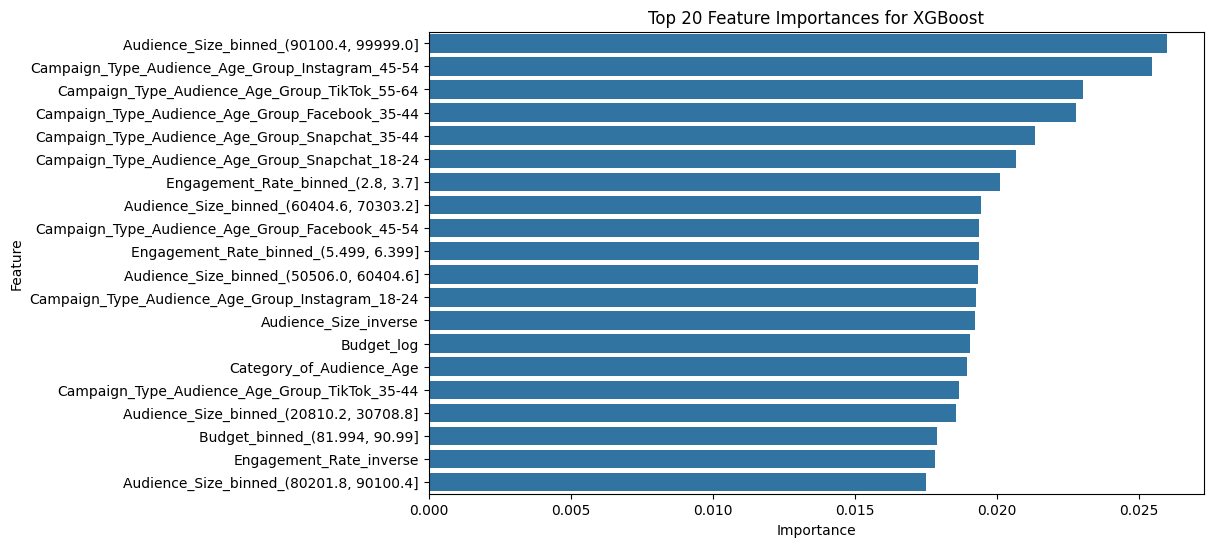

              Model      RMSE       MAE  CV Mean Score
0          LightGBM  1.444961  1.247556       2.012306
1           XGBoost  1.439694  1.246459       1.998471
2  LinearRegression  1.433706  1.241990       1.995091


In [21]:
models = {
    'LightGBM': LGBMRegressor(
        objective='regression',
        metric='rmse',
        boosting_type='gbdt',
        num_leaves=31,
        learning_rate=0.05,
        feature_fraction=0.9,
        bagging_fraction=0.8,
        bagging_freq=5,
        verbose=0,
        n_estimators=100
    ),
    'XGBoost': XGBRegressor(
        objective='reg:linear',
        learning_rate=0.05,
        max_depth=5,
        n_estimators=100,
        verbosity=0
    ),
     'LinearRegression': LinearRegression()
}
model_names = []
model_scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False)
scores = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'CV Mean Score': []
}

# For each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    cv_score = -cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer).mean()
    
    scores['Model'].append(name)
    scores['RMSE'].append(rmse)
    scores['MAE'].append(mae)
    scores['CV Mean Score'].append(cv_score)

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_        
        importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
        importances_df['abs_importance'] = importances_df['importance'].abs()
        importances_df = importances_df.sort_values('abs_importance', ascending=False).drop('abs_importance', axis=1)
        
        #Top 20 features
        top_20_features = importances_df.head(20)        
        plt.figure(figsize=(10,6))
        sns.barplot(x='importance', y='feature', data=top_20_features)
        plt.title(f'Top 20 Feature Importances for {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

df_scores = pd.DataFrame(scores)
print(df_scores)

In [22]:
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 2, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
    }
    
    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)


[I 2024-01-12 10:30:34,911] A new study created in memory with name: no-name-592d1b7f-636e-475e-a7cc-a375eb192aca
[I 2024-01-12 10:30:35,053] Trial 0 finished with value: 1.494550040863653 and parameters: {'num_leaves': 73, 'learning_rate': 0.07455130093446295, 'feature_fraction': 0.803663486842404, 'bagging_fraction': 0.19929668368226822, 'bagging_freq': 5, 'n_estimators': 71}. Best is trial 0 with value: 1.494550040863653.


[LightGBM] [Warning] feature_fraction is set=0.803663486842404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.803663486842404
[LightGBM] [Warning] bagging_fraction is set=0.19929668368226822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.19929668368226822
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.803663486842404, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.803663486842404
[LightGBM] [Warning] bagging_fraction is set=0.19929668368226822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.19929668368226822
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:35,185] Trial 1 finished with value: 1.4405773227073078 and parameters: {'num_leaves': 87, 'learning_rate': 0.04781925213530794, 'feature_fraction': 0.17498854799696986, 'bagging_fraction': 0.7408327015297745, 'bagging_freq': 1, 'n_estimators': 60}. Best is trial 1 with value: 1.4405773227073078.
[I 2024-01-12 10:30:35,289] Trial 2 finished with value: 1.4661952282940027 and parameters: {'num_leaves': 65, 'learning_rate': 0.09163772732415996, 'feature_fraction': 0.11305008875230198, 'bagging_fraction': 0.5516639441256942, 'bagging_freq': 4, 'n_estimators': 62}. Best is trial 1 with value: 1.4405773227073078.


[LightGBM] [Warning] feature_fraction is set=0.17498854799696986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17498854799696986
[LightGBM] [Warning] bagging_fraction is set=0.7408327015297745, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7408327015297745
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.11305008875230198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11305008875230198
[LightGBM] [Warning] bagging_fraction is set=0.5516639441256942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5516639441256942
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.11305008875230198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11305008875230198
[LightGBM] [Warning] b

[I 2024-01-12 10:30:35,465] Trial 3 finished with value: 1.4874446982498375 and parameters: {'num_leaves': 68, 'learning_rate': 0.09038011062182821, 'feature_fraction': 0.9697751956928664, 'bagging_fraction': 0.5070609950151221, 'bagging_freq': 5, 'n_estimators': 61}. Best is trial 1 with value: 1.4405773227073078.


[LightGBM] [Warning] feature_fraction is set=0.9697751956928664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9697751956928664
[LightGBM] [Warning] bagging_fraction is set=0.5070609950151221, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5070609950151221
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.21628172940234464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21628172940234464
[LightGBM] [Warning] bagging_fraction is set=0.5646296978542902, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5646296978542902
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.21628172940234464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21628172940234464
[LightGBM] [Warning] bag

[I 2024-01-12 10:30:35,667] Trial 4 finished with value: 1.477319023401876 and parameters: {'num_leaves': 83, 'learning_rate': 0.059177564285684936, 'feature_fraction': 0.21628172940234464, 'bagging_fraction': 0.5646296978542902, 'bagging_freq': 5, 'n_estimators': 86}. Best is trial 1 with value: 1.4405773227073078.


[LightGBM] [Warning] feature_fraction is set=0.5441280346482904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5441280346482904
[LightGBM] [Warning] bagging_fraction is set=0.3327136495421973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3327136495421973
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5441280346482904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5441280346482904
[LightGBM] [Warning] bagging_fraction is set=0.3327136495421973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3327136495421973
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:35,921] Trial 5 finished with value: 1.441635644673204 and parameters: {'num_leaves': 32, 'learning_rate': 0.02453729628339859, 'feature_fraction': 0.5441280346482904, 'bagging_fraction': 0.3327136495421973, 'bagging_freq': 4, 'n_estimators': 169}. Best is trial 1 with value: 1.4405773227073078.
[I 2024-01-12 10:30:36,029] Trial 6 finished with value: 1.4462543521343028 and parameters: {'num_leaves': 27, 'learning_rate': 0.07933827955795901, 'feature_fraction': 0.9084134723186906, 'bagging_fraction': 0.5668678979149551, 'bagging_freq': 1, 'n_estimators': 56}. Best is trial 1 with value: 1.4405773227073078.


[LightGBM] [Warning] feature_fraction is set=0.5441280346482904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5441280346482904
[LightGBM] [Warning] bagging_fraction is set=0.3327136495421973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3327136495421973
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9084134723186906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9084134723186906
[LightGBM] [Warning] bagging_fraction is set=0.5668678979149551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5668678979149551
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9084134723186906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9084134723186906
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:36,226] Trial 7 finished with value: 1.475659077761812 and parameters: {'num_leaves': 48, 'learning_rate': 0.06124425311188727, 'feature_fraction': 0.3572075793748307, 'bagging_fraction': 0.4746025851811071, 'bagging_freq': 5, 'n_estimators': 133}. Best is trial 1 with value: 1.4405773227073078.


[LightGBM] [Warning] feature_fraction is set=0.3572075793748307, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3572075793748307
[LightGBM] [Warning] bagging_fraction is set=0.4746025851811071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4746025851811071
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8555072393619034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8555072393619034
[LightGBM] [Warning] bagging_fraction is set=0.41215988565445605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41215988565445605
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8555072393619034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8555072393619034
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:36,454] Trial 8 finished with value: 1.4471804165614865 and parameters: {'num_leaves': 40, 'learning_rate': 0.037292152484553524, 'feature_fraction': 0.8555072393619034, 'bagging_fraction': 0.41215988565445605, 'bagging_freq': 6, 'n_estimators': 121}. Best is trial 1 with value: 1.4405773227073078.


[LightGBM] [Warning] feature_fraction is set=0.8555072393619034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8555072393619034
[LightGBM] [Warning] bagging_fraction is set=0.41215988565445605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41215988565445605
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.37889388906983346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37889388906983346
[LightGBM] [Warning] bagging_fraction is set=0.5437294537658881, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5437294537658881
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.37889388906983346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37889388906983346
[LightGBM] [Warning] b

[I 2024-01-12 10:30:36,676] Trial 9 finished with value: 1.4300893011573461 and parameters: {'num_leaves': 51, 'learning_rate': 0.010499519087004612, 'feature_fraction': 0.37889388906983346, 'bagging_fraction': 0.5437294537658881, 'bagging_freq': 7, 'n_estimators': 142}. Best is trial 9 with value: 1.4300893011573461.


[LightGBM] [Warning] feature_fraction is set=0.37889388906983346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37889388906983346
[LightGBM] [Warning] bagging_fraction is set=0.5437294537658881, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5437294537658881
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5745723450797664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5745723450797664
[LightGBM] [Warning] bagging_fraction is set=0.9335380146587178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9335380146587178
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5745723450797664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5745723450797664
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:36,929] Trial 10 finished with value: 1.4260780091850838 and parameters: {'num_leaves': 5, 'learning_rate': 0.01620028427439603, 'feature_fraction': 0.5745723450797664, 'bagging_fraction': 0.9335380146587178, 'bagging_freq': 7, 'n_estimators': 195}. Best is trial 10 with value: 1.4260780091850838.
[I 2024-01-12 10:30:37,052] Trial 11 finished with value: 1.4260993762001206 and parameters: {'num_leaves': 7, 'learning_rate': 0.011165762849283997, 'feature_fraction': 0.5614474979483965, 'bagging_fraction': 0.9495619030664801, 'bagging_freq': 7, 'n_estimators': 187}. Best is trial 10 with value: 1.4260780091850838.


[LightGBM] [Warning] feature_fraction is set=0.5745723450797664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5745723450797664
[LightGBM] [Warning] bagging_fraction is set=0.9335380146587178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9335380146587178
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5614474979483965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5614474979483965
[LightGBM] [Warning] bagging_fraction is set=0.9495619030664801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9495619030664801
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5614474979483965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5614474979483965
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:37,158] Trial 12 finished with value: 1.4255324890495047 and parameters: {'num_leaves': 4, 'learning_rate': 0.011758639035167051, 'feature_fraction': 0.6652493197581605, 'bagging_fraction': 0.9980488881047112, 'bagging_freq': 7, 'n_estimators': 189}. Best is trial 12 with value: 1.4255324890495047.
[I 2024-01-12 10:30:37,247] Trial 13 finished with value: 1.4240476946407539 and parameters: {'num_leaves': 2, 'learning_rate': 0.028292140415569173, 'feature_fraction': 0.675535587344149, 'bagging_fraction': 0.993640772195807, 'bagging_freq': 7, 'n_estimators': 198}. Best is trial 13 with value: 1.4240476946407539.


[LightGBM] [Warning] feature_fraction is set=0.6652493197581605, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6652493197581605
[LightGBM] [Warning] bagging_fraction is set=0.9980488881047112, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9980488881047112
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.675535587344149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.675535587344149
[LightGBM] [Warning] bagging_fraction is set=0.993640772195807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.993640772195807
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.675535587344149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.675535587344149
[LightGBM] [Warning] bagging_fract

[I 2024-01-12 10:30:37,442] Trial 14 finished with value: 1.4317954854359543 and parameters: {'num_leaves': 18, 'learning_rate': 0.02893132885912735, 'feature_fraction': 0.7301685830558984, 'bagging_fraction': 0.8040847406355904, 'bagging_freq': 3, 'n_estimators': 170}. Best is trial 13 with value: 1.4240476946407539.
[I 2024-01-12 10:30:37,620] Trial 15 finished with value: 1.4394604050367619 and parameters: {'num_leaves': 17, 'learning_rate': 0.03862926419466044, 'feature_fraction': 0.7289577400083145, 'bagging_fraction': 0.7852906150419424, 'bagging_freq': 6, 'n_estimators': 163}. Best is trial 13 with value: 1.4240476946407539.


[LightGBM] [Warning] feature_fraction is set=0.7301685830558984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301685830558984
[LightGBM] [Warning] bagging_fraction is set=0.8040847406355904, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8040847406355904
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7289577400083145, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7289577400083145
[LightGBM] [Warning] bagging_fraction is set=0.7852906150419424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7852906150419424
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7289577400083145, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7289577400083145
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:37,746] Trial 16 finished with value: 1.4288271500166947 and parameters: {'num_leaves': 15, 'learning_rate': 0.024306304605316867, 'feature_fraction': 0.6695893995715241, 'bagging_fraction': 0.9664953297842453, 'bagging_freq': 6, 'n_estimators': 104}. Best is trial 13 with value: 1.4240476946407539.


[LightGBM] [Warning] feature_fraction is set=0.6695893995715241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6695893995715241
[LightGBM] [Warning] bagging_fraction is set=0.9664953297842453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9664953297842453
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6695893995715241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6695893995715241
[LightGBM] [Warning] bagging_fraction is set=0.9664953297842453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9664953297842453
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:38,306] Trial 17 finished with value: 1.481786156143977 and parameters: {'num_leaves': 100, 'learning_rate': 0.038001161248588905, 'feature_fraction': 0.4529367161907013, 'bagging_fraction': 0.69663476065758, 'bagging_freq': 3, 'n_estimators': 197}. Best is trial 13 with value: 1.4240476946407539.


[LightGBM] [Warning] feature_fraction is set=0.4529367161907013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4529367161907013
[LightGBM] [Warning] bagging_fraction is set=0.69663476065758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.69663476065758
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6500176817266324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6500176817266324
[LightGBM] [Warning] bagging_fraction is set=0.8580101698286313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8580101698286313
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6500176817266324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6500176817266324
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:30:38,520] Trial 18 finished with value: 1.4468546592614049 and parameters: {'num_leaves': 28, 'learning_rate': 0.048502086675054644, 'feature_fraction': 0.6500176817266324, 'bagging_fraction': 0.8580101698286313, 'bagging_freq': 7, 'n_estimators': 154}. Best is trial 13 with value: 1.4240476946407539.
[I 2024-01-12 10:30:38,622] Trial 19 finished with value: 1.4262224246229696 and parameters: {'num_leaves': 4, 'learning_rate': 0.021021565068576567, 'feature_fraction': 0.7832396658200051, 'bagging_fraction': 0.6779103232837239, 'bagging_freq': 6, 'n_estimators': 181}. Best is trial 13 with value: 1.4240476946407539.


[LightGBM] [Warning] feature_fraction is set=0.6500176817266324, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6500176817266324
[LightGBM] [Warning] bagging_fraction is set=0.8580101698286313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8580101698286313
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7832396658200051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7832396658200051
[LightGBM] [Warning] bagging_fraction is set=0.6779103232837239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6779103232837239
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7832396658200051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7832396658200051
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:38,854] Trial 20 finished with value: 1.4407816180848483 and parameters: {'num_leaves': 38, 'learning_rate': 0.03138002900577269, 'feature_fraction': 0.46569440225659897, 'bagging_fraction': 0.8562910021084957, 'bagging_freq': 2, 'n_estimators': 151}. Best is trial 13 with value: 1.4240476946407539.
[I 2024-01-12 10:30:38,939] Trial 21 finished with value: 1.4236577942023139 and parameters: {'num_leaves': 2, 'learning_rate': 0.015516591179235376, 'feature_fraction': 0.6155606627353398, 'bagging_fraction': 0.9986314307474004, 'bagging_freq': 7, 'n_estimators': 200}. Best is trial 21 with value: 1.4236577942023139.


[LightGBM] [Warning] feature_fraction is set=0.46569440225659897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46569440225659897
[LightGBM] [Warning] bagging_fraction is set=0.8562910021084957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8562910021084957
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6155606627353398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6155606627353398
[LightGBM] [Warning] bagging_fraction is set=0.9986314307474004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9986314307474004
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6155606627353398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6155606627353398
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:39,102] Trial 22 finished with value: 1.4293002246269833 and parameters: {'num_leaves': 13, 'learning_rate': 0.01773081231795972, 'feature_fraction': 0.6352890597657701, 'bagging_fraction': 0.9994746323130055, 'bagging_freq': 7, 'n_estimators': 181}. Best is trial 21 with value: 1.4236577942023139.
[I 2024-01-12 10:30:39,185] Trial 23 finished with value: 1.4231628654888546 and parameters: {'num_leaves': 2, 'learning_rate': 0.016062648753132985, 'feature_fraction': 0.4760232917584546, 'bagging_fraction': 0.8788506177464833, 'bagging_freq': 6, 'n_estimators': 196}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6352890597657701, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6352890597657701
[LightGBM] [Warning] bagging_fraction is set=0.9994746323130055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9994746323130055
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4760232917584546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4760232917584546
[LightGBM] [Warning] bagging_fraction is set=0.8788506177464833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8788506177464833
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4760232917584546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4760232917584546
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:39,386] Trial 24 finished with value: 1.4350489777073092 and parameters: {'num_leaves': 21, 'learning_rate': 0.028345190889472648, 'feature_fraction': 0.4753080420654118, 'bagging_fraction': 0.8863771306732344, 'bagging_freq': 6, 'n_estimators': 199}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:39,465] Trial 25 finished with value: 1.4248119739813276 and parameters: {'num_leaves': 2, 'learning_rate': 0.04610875996534008, 'feature_fraction': 0.32345594412131623, 'bagging_fraction': 0.8951198608281827, 'bagging_freq': 6, 'n_estimators': 175}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.4753080420654118, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4753080420654118
[LightGBM] [Warning] bagging_fraction is set=0.8863771306732344, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8863771306732344
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.32345594412131623, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32345594412131623
[LightGBM] [Warning] bagging_fraction is set=0.8951198608281827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8951198608281827
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.32345594412131623, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32345594412131623
[LightGBM] [Warning] bag

[I 2024-01-12 10:30:39,618] Trial 26 finished with value: 1.4275638091524623 and parameters: {'num_leaves': 11, 'learning_rate': 0.017838266518770244, 'feature_fraction': 0.507115995664237, 'bagging_fraction': 0.6490055255315801, 'bagging_freq': 7, 'n_estimators': 199}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:39,782] Trial 27 finished with value: 1.4353550886724669 and parameters: {'num_leaves': 24, 'learning_rate': 0.03219830296933235, 'feature_fraction': 0.28197325212646046, 'bagging_fraction': 0.8120099523229677, 'bagging_freq': 6, 'n_estimators': 160}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.507115995664237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.507115995664237
[LightGBM] [Warning] bagging_fraction is set=0.6490055255315801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6490055255315801
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.28197325212646046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28197325212646046
[LightGBM] [Warning] bagging_fraction is set=0.8120099523229677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8120099523229677
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.28197325212646046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28197325212646046
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:39,905] Trial 28 finished with value: 1.43942461716061 and parameters: {'num_leaves': 10, 'learning_rate': 0.02379572987346429, 'feature_fraction': 0.41083930470724545, 'bagging_fraction': 0.1132174914273813, 'bagging_freq': 5, 'n_estimators': 182}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.41083930470724545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41083930470724545
[LightGBM] [Warning] bagging_fraction is set=0.1132174914273813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1132174914273813
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.41083930470724545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41083930470724545
[LightGBM] [Warning] bagging_fraction is set=0.1132174914273813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1132174914273813
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:30:40,071] Trial 29 finished with value: 1.4315967825676525 and parameters: {'num_leaves': 36, 'learning_rate': 0.04194470196685264, 'feature_fraction': 0.5947312405315588, 'bagging_fraction': 0.9251125694824414, 'bagging_freq': 7, 'n_estimators': 82}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:40,227] Trial 30 finished with value: 1.444901006646157 and parameters: {'num_leaves': 20, 'learning_rate': 0.06572154154758894, 'feature_fraction': 0.7355098975540237, 'bagging_fraction': 0.7486699498510512, 'bagging_freq': 5, 'n_estimators': 112}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5947312405315588, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5947312405315588
[LightGBM] [Warning] bagging_fraction is set=0.9251125694824414, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9251125694824414
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7355098975540237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7355098975540237
[LightGBM] [Warning] bagging_fraction is set=0.7486699498510512, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7486699498510512
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7355098975540237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7355098975540237
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:40,313] Trial 31 finished with value: 1.4262242183778633 and parameters: {'num_leaves': 3, 'learning_rate': 0.049569902500804466, 'feature_fraction': 0.35559492405428517, 'bagging_fraction': 0.8869735289055208, 'bagging_freq': 6, 'n_estimators': 172}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:40,388] Trial 32 finished with value: 1.4244297699992328 and parameters: {'num_leaves': 2, 'learning_rate': 0.04269146099981082, 'feature_fraction': 0.24980831122546437, 'bagging_fraction': 0.896775790305333, 'bagging_freq': 6, 'n_estimators': 176}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.35559492405428517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35559492405428517
[LightGBM] [Warning] bagging_fraction is set=0.8869735289055208, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8869735289055208
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.35559492405428517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35559492405428517
[LightGBM] [Warning] bagging_fraction is set=0.8869735289055208, subsample=1.0 will be ignor

[I 2024-01-12 10:30:40,501] Trial 33 finished with value: 1.4322838620641882 and parameters: {'num_leaves': 10, 'learning_rate': 0.03435483718375876, 'feature_fraction': 0.19623367995154808, 'bagging_fraction': 0.8335633882493224, 'bagging_freq': 7, 'n_estimators': 189}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.19623367995154808, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19623367995154808
[LightGBM] [Warning] bagging_fraction is set=0.8335633882493224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8335633882493224
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2514946528105024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2514946528105024
[LightGBM] [Warning] bagging_fraction is set=0.9972206096599744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9972206096599744
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2514946528105024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2514946528105024
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:40,869] Trial 34 finished with value: 1.4368713198188265 and parameters: {'num_leaves': 57, 'learning_rate': 0.016294190638932598, 'feature_fraction': 0.2514946528105024, 'bagging_fraction': 0.9972206096599744, 'bagging_freq': 4, 'n_estimators': 189}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:41,054] Trial 35 finished with value: 1.4300150217130947 and parameters: {'num_leaves': 12, 'learning_rate': 0.026690624782928704, 'feature_fraction': 0.791103145090692, 'bagging_fraction': 0.9332167513880014, 'bagging_freq': 5, 'n_estimators': 181}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.2514946528105024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2514946528105024
[LightGBM] [Warning] bagging_fraction is set=0.9972206096599744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9972206096599744
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.791103145090692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.791103145090692
[LightGBM] [Warning] bagging_fraction is set=0.9332167513880014, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9332167513880014
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.791103145090692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.791103145090692
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:30:41,135] Trial 36 finished with value: 1.4253055728256807 and parameters: {'num_leaves': 2, 'learning_rate': 0.09955692287014445, 'feature_fraction': 0.13093576900383175, 'bagging_fraction': 0.7476227944365293, 'bagging_freq': 6, 'n_estimators': 199}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:41,262] Trial 37 finished with value: 1.442720915751966 and parameters: {'num_leaves': 9, 'learning_rate': 0.05543301734220247, 'feature_fraction': 0.5370084138975515, 'bagging_fraction': 0.3018208377343494, 'bagging_freq': 4, 'n_estimators': 165}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.13093576900383175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13093576900383175
[LightGBM] [Warning] bagging_fraction is set=0.7476227944365293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7476227944365293
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.13093576900383175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13093576900383175
[LightGBM] [Warning] bagging_fraction is set=0.7476227944365293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7476227944365293
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:30:41,713] Trial 38 finished with value: 1.4742126601189722 and parameters: {'num_leaves': 76, 'learning_rate': 0.04314972886112245, 'feature_fraction': 0.6237611118846893, 'bagging_fraction': 0.622105211856982, 'bagging_freq': 7, 'n_estimators': 146}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6237611118846893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6237611118846893
[LightGBM] [Warning] bagging_fraction is set=0.622105211856982, subsample=1.0 will be ignored. Current value: bagging_fraction=0.622105211856982
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9654691160816988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9654691160816988
[LightGBM] [Warning] bagging_fraction is set=0.9023243872480201, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9023243872480201
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9654691160816988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9654691160816988
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:42,057] Trial 39 finished with value: 1.4328550381616947 and parameters: {'num_leaves': 28, 'learning_rate': 0.021469772957292604, 'feature_fraction': 0.9654691160816988, 'bagging_fraction': 0.9023243872480201, 'bagging_freq': 5, 'n_estimators': 191}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:42,221] Trial 40 finished with value: 1.450133754824029 and parameters: {'num_leaves': 24, 'learning_rate': 0.07463101715715541, 'feature_fraction': 0.10119898589204676, 'bagging_fraction': 0.771136552418018, 'bagging_freq': 6, 'n_estimators': 175}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.9654691160816988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9654691160816988
[LightGBM] [Warning] bagging_fraction is set=0.9023243872480201, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9023243872480201
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.10119898589204676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10119898589204676
[LightGBM] [Warning] bagging_fraction is set=0.771136552418018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.771136552418018
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.10119898589204676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10119898589204676
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:42,301] Trial 41 finished with value: 1.4243176154797583 and parameters: {'num_leaves': 2, 'learning_rate': 0.044050428498221945, 'feature_fraction': 0.29522987309187904, 'bagging_fraction': 0.8649582597046209, 'bagging_freq': 6, 'n_estimators': 176}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:42,404] Trial 42 finished with value: 1.4290610655243536 and parameters: {'num_leaves': 8, 'learning_rate': 0.033536978524329734, 'feature_fraction': 0.41623579335936595, 'bagging_fraction': 0.8495535099759639, 'bagging_freq': 6, 'n_estimators': 138}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.29522987309187904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29522987309187904
[LightGBM] [Warning] bagging_fraction is set=0.8649582597046209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8649582597046209
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.29522987309187904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29522987309187904
[LightGBM] [Warning] bagging_fraction is set=0.8649582597046209, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8649582597046209
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:30:42,534] Trial 43 finished with value: 1.4389476244475168 and parameters: {'num_leaves': 16, 'learning_rate': 0.05529830521751989, 'feature_fraction': 0.27832952785786974, 'bagging_fraction': 0.9677190958321606, 'bagging_freq': 7, 'n_estimators': 158}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:42,639] Trial 44 finished with value: 1.4325898379625013 and parameters: {'num_leaves': 7, 'learning_rate': 0.05091757948358245, 'feature_fraction': 0.23593993819458559, 'bagging_fraction': 0.7161661707966711, 'bagging_freq': 7, 'n_estimators': 184}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.27832952785786974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27832952785786974
[LightGBM] [Warning] bagging_fraction is set=0.9677190958321606, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9677190958321606
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.23593993819458559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23593993819458559
[LightGBM] [Warning] bagging_fraction is set=0.7161661707966711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7161661707966711
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.23593993819458559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23593993819458559
[LightGBM] [Warning] b

[I 2024-01-12 10:30:42,888] Trial 45 finished with value: 1.4318958923591947 and parameters: {'num_leaves': 44, 'learning_rate': 0.014437879893711026, 'feature_fraction': 0.1631507068751228, 'bagging_fraction': 0.9458185682627626, 'bagging_freq': 5, 'n_estimators': 194}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:43,023] Trial 46 finished with value: 1.441255635538553 and parameters: {'num_leaves': 14, 'learning_rate': 0.061766123996361576, 'feature_fraction': 0.3166068360276632, 'bagging_fraction': 0.9101941800467791, 'bagging_freq': 6, 'n_estimators': 176}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.1631507068751228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1631507068751228
[LightGBM] [Warning] bagging_fraction is set=0.9458185682627626, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9458185682627626
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3166068360276632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3166068360276632
[LightGBM] [Warning] bagging_fraction is set=0.9101941800467791, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9101941800467791
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3166068360276632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3166068360276632
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:43,388] Trial 47 finished with value: 1.461483098626805 and parameters: {'num_leaves': 62, 'learning_rate': 0.041791768138532755, 'feature_fraction': 0.5305348859964361, 'bagging_fraction': 0.818230003111151, 'bagging_freq': 7, 'n_estimators': 165}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:43,463] Trial 48 finished with value: 1.423494512323803 and parameters: {'num_leaves': 2, 'learning_rate': 0.02111895401754038, 'feature_fraction': 0.6983413068954961, 'bagging_fraction': 0.9720025561152167, 'bagging_freq': 5, 'n_estimators': 126}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:43,544] Trial 49 finished with value: 1.4241853949482526 and parameters: {'num_leaves': 7, 'learning_rate': 0.010625794414103829, 'feature_fraction': 0.6923687283750606, 'bagging_fraction': 0.9615759723353892, 'bagging_freq': 5, 'n_estimators': 66}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5305348859964361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5305348859964361
[LightGBM] [Warning] bagging_fraction is set=0.818230003111151, subsample=1.0 will be ignored. Current value: bagging_fraction=0.818230003111151
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6983413068954961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983413068954961
[LightGBM] [Warning] bagging_fraction is set=0.9720025561152167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9720025561152167
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6983413068954961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983413068954961
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:43,621] Trial 50 finished with value: 1.4246474593526361 and parameters: {'num_leaves': 7, 'learning_rate': 0.012940296511120246, 'feature_fraction': 0.696686570650231, 'bagging_fraction': 0.9674772386186501, 'bagging_freq': 4, 'n_estimators': 53}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:43,700] Trial 51 finished with value: 1.42519426802823 and parameters: {'num_leaves': 6, 'learning_rate': 0.021542110556488785, 'feature_fraction': 0.6050320739257278, 'bagging_fraction': 0.9731589758235392, 'bagging_freq': 5, 'n_estimators': 68}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.696686570650231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.696686570650231
[LightGBM] [Warning] bagging_fraction is set=0.9674772386186501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9674772386186501
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.696686570650231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.696686570650231
[LightGBM] [Warning] bagging_fraction is set=0.9674772386186501, subsample=1.0 will be ignored. Curr

[I 2024-01-12 10:30:43,830] Trial 52 finished with value: 1.4244964061649414 and parameters: {'num_leaves': 14, 'learning_rate': 0.010823446171579753, 'feature_fraction': 0.8217750332878668, 'bagging_fraction': 0.8642880843608661, 'bagging_freq': 5, 'n_estimators': 103}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:43,914] Trial 53 finished with value: 1.4248450609161432 and parameters: {'num_leaves': 5, 'learning_rate': 0.01918892236841042, 'feature_fraction': 0.6814950974754562, 'bagging_fraction': 0.9384949163999697, 'bagging_freq': 4, 'n_estimators': 87}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.8217750332878668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8217750332878668
[LightGBM] [Warning] bagging_fraction is set=0.8642880843608661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8642880843608661
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6814950974754562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6814950974754562
[LightGBM] [Warning] bagging_fraction is set=0.9384949163999697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9384949163999697
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6814950974754562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6814950974754562
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:44,069] Trial 54 finished with value: 1.4309170999096028 and parameters: {'num_leaves': 19, 'learning_rate': 0.025722029038029552, 'feature_fraction': 0.714416641467231, 'bagging_fraction': 0.48679855749422685, 'bagging_freq': 3, 'n_estimators': 116}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:44,146] Trial 55 finished with value: 1.4236182816477787 and parameters: {'num_leaves': 2, 'learning_rate': 0.022905686617903834, 'feature_fraction': 0.7748946794570883, 'bagging_fraction': 0.9972055542969547, 'bagging_freq': 5, 'n_estimators': 128}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.714416641467231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.714416641467231
[LightGBM] [Warning] bagging_fraction is set=0.48679855749422685, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48679855749422685
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7748946794570883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7748946794570883
[LightGBM] [Warning] bagging_fraction is set=0.9972055542969547, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9972055542969547
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7748946794570883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7748946794570883
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:44,276] Trial 56 finished with value: 1.427047213473661 and parameters: {'num_leaves': 11, 'learning_rate': 0.014746342240400417, 'feature_fraction': 0.8781326691174113, 'bagging_fraction': 0.986080949143023, 'bagging_freq': 4, 'n_estimators': 121}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:44,384] Trial 57 finished with value: 1.4279212750769081 and parameters: {'num_leaves': 7, 'learning_rate': 0.029438143467728804, 'feature_fraction': 0.7657261173755441, 'bagging_fraction': 0.9449386811264139, 'bagging_freq': 5, 'n_estimators': 130}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.8781326691174113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8781326691174113
[LightGBM] [Warning] bagging_fraction is set=0.986080949143023, subsample=1.0 will be ignored. Current value: bagging_fraction=0.986080949143023
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7657261173755441, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7657261173755441
[LightGBM] [Warning] bagging_fraction is set=0.9449386811264139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9449386811264139
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7657261173755441, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7657261173755441
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:44,713] Trial 58 finished with value: 1.4313591144757818 and parameters: {'num_leaves': 96, 'learning_rate': 0.010043553776997071, 'feature_fraction': 0.7508997602893988, 'bagging_fraction': 0.39908805085703425, 'bagging_freq': 5, 'n_estimators': 97}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.7508997602893988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7508997602893988
[LightGBM] [Warning] bagging_fraction is set=0.39908805085703425, subsample=1.0 will be ignored. Current value: bagging_fraction=0.39908805085703425
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8241255684585028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8241255684585028
[LightGBM] [Warning] bagging_fraction is set=0.9947318890951171, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9947318890951171
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8241255684585028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8241255684585028
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:44,936] Trial 59 finished with value: 1.4331145387555781 and parameters: {'num_leaves': 32, 'learning_rate': 0.022450889586790347, 'feature_fraction': 0.8241255684585028, 'bagging_fraction': 0.9947318890951171, 'bagging_freq': 5, 'n_estimators': 132}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:45,085] Trial 60 finished with value: 1.4282101817860249 and parameters: {'num_leaves': 16, 'learning_rate': 0.018690973506005064, 'feature_fraction': 0.6643266742151265, 'bagging_fraction': 0.9296424986325106, 'bagging_freq': 7, 'n_estimators': 140}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.8241255684585028, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8241255684585028
[LightGBM] [Warning] bagging_fraction is set=0.9947318890951171, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9947318890951171
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6643266742151265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6643266742151265
[LightGBM] [Warning] bagging_fraction is set=0.9296424986325106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9296424986325106
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6643266742151265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6643266742151265
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:45,166] Trial 61 finished with value: 1.4233536228415042 and parameters: {'num_leaves': 2, 'learning_rate': 0.01487901758646025, 'feature_fraction': 0.5762895789182721, 'bagging_fraction': 0.8683109644710676, 'bagging_freq': 1, 'n_estimators': 127}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:45,260] Trial 62 finished with value: 1.4249228556195512 and parameters: {'num_leaves': 5, 'learning_rate': 0.014146773393684496, 'feature_fraction': 0.582060783892275, 'bagging_fraction': 0.9648466081760017, 'bagging_freq': 1, 'n_estimators': 113}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:45,338] Trial 63 finished with value: 1.4234996516920229 and parameters: {'num_leaves': 2, 'learning_rate': 0.01941290829257269, 'feature_fraction': 0.5001217582678035, 'bagging_fraction': 0.9146830540002943, 'bagging_freq': 2, 'n_estimators': 126}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5762895789182721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5762895789182721
[LightGBM] [Warning] bagging_fraction is set=0.8683109644710676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8683109644710676
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.5762895789182721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5762895789182721
[LightGBM] [Warning] bagging_fraction is set=0.8683109644710676, subsample=1.0 will be ignored. 

[I 2024-01-12 10:30:45,423] Trial 64 finished with value: 1.4236296183827197 and parameters: {'num_leaves': 2, 'learning_rate': 0.0259367952567899, 'feature_fraction': 0.48747099707763897, 'bagging_fraction': 0.791797758109681, 'bagging_freq': 2, 'n_estimators': 149}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:45,537] Trial 65 finished with value: 1.426359703929421 and parameters: {'num_leaves': 11, 'learning_rate': 0.02478998351700007, 'feature_fraction': 0.4938062007839252, 'bagging_fraction': 0.795480534304442, 'bagging_freq': 2, 'n_estimators': 125}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.48747099707763897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48747099707763897
[LightGBM] [Warning] bagging_fraction is set=0.791797758109681, subsample=1.0 will be ignored. Current value: bagging_fraction=0.791797758109681
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.48747099707763897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48747099707763897
[LightGBM] [Warning] bagging_fraction is set=0.791797758109681, subsample=1.0 will be ignored. Current value: bagging_fraction=0.791797758109681
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:45,714] Trial 66 finished with value: 1.42968636323273 and parameters: {'num_leaves': 23, 'learning_rate': 0.019081572613829034, 'feature_fraction': 0.4445732668637039, 'bagging_fraction': 0.8306215232179437, 'bagging_freq': 2, 'n_estimators': 147}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.4445732668637039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4445732668637039
[LightGBM] [Warning] bagging_fraction is set=0.8306215232179437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8306215232179437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.4445732668637039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4445732668637039
[LightGBM] [Warning] bagging_fraction is set=0.8306215232179437, subsample=1.0 will be ignored. 

[I 2024-01-12 10:30:45,820] Trial 67 finished with value: 1.4250773803154897 and parameters: {'num_leaves': 5, 'learning_rate': 0.016353881250603525, 'feature_fraction': 0.560094835837792, 'bagging_fraction': 0.8761202082181, 'bagging_freq': 1, 'n_estimators': 127}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:45,909] Trial 68 finished with value: 1.423841448788143 and parameters: {'num_leaves': 2, 'learning_rate': 0.027123120712958523, 'feature_fraction': 0.5177352393261861, 'bagging_fraction': 0.9168580639620661, 'bagging_freq': 1, 'n_estimators': 137}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.560094835837792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.560094835837792
[LightGBM] [Warning] bagging_fraction is set=0.8761202082181, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8761202082181
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5177352393261861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5177352393261861
[LightGBM] [Warning] bagging_fraction is set=0.9168580639620661, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9168580639620661
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5177352393261861, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5177352393261861
[LightGBM] [Warning] bagging_fractio

[I 2024-01-12 10:30:46,043] Trial 69 finished with value: 1.4308766891140292 and parameters: {'num_leaves': 13, 'learning_rate': 0.036593831156495366, 'feature_fraction': 0.49143789340565575, 'bagging_fraction': 0.7728012750119319, 'bagging_freq': 2, 'n_estimators': 123}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:46,160] Trial 70 finished with value: 1.4287463090586534 and parameters: {'num_leaves': 10, 'learning_rate': 0.03032672557593259, 'feature_fraction': 0.41794950535335584, 'bagging_fraction': 0.83351426591065, 'bagging_freq': 2, 'n_estimators': 118}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.49143789340565575, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49143789340565575
[LightGBM] [Warning] bagging_fraction is set=0.7728012750119319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7728012750119319
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.41794950535335584, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41794950535335584
[LightGBM] [Warning] bagging_fraction is set=0.83351426591065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.83351426591065
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.41794950535335584, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41794950535335584
[LightGBM] [Warning] baggi

[I 2024-01-12 10:30:46,264] Trial 71 finished with value: 1.4261950942544772 and parameters: {'num_leaves': 4, 'learning_rate': 0.027729754433151246, 'feature_fraction': 0.6199348602682191, 'bagging_fraction': 0.9115635619427493, 'bagging_freq': 1, 'n_estimators': 136}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:46,346] Trial 72 finished with value: 1.423813666817659 and parameters: {'num_leaves': 2, 'learning_rate': 0.023113135982684115, 'feature_fraction': 0.5190066588963712, 'bagging_fraction': 0.9174374922716656, 'bagging_freq': 1, 'n_estimators': 145}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:46,452] Trial 73 finished with value: 1.4259009111081522 and parameters: {'num_leaves': 9, 'learning_rate': 0.020295787954408277, 'feature_fraction': 0.5553210438159307, 'bagging_fraction': 0.8849583317076807, 'bagging_freq': 1, 'n_estimators': 108}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6199348602682191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6199348602682191
[LightGBM] [Warning] bagging_fraction is set=0.9115635619427493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9115635619427493
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5190066588963712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5190066588963712
[LightGBM] [Warning] bagging_fraction is set=0.9174374922716656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9174374922716656
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5190066588963712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5190066588963712
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:46,552] Trial 74 finished with value: 1.423798428952499 and parameters: {'num_leaves': 2, 'learning_rate': 0.02321453135686006, 'feature_fraction': 0.44374645244631084, 'bagging_fraction': 0.9407208448779191, 'bagging_freq': 1, 'n_estimators': 143}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:46,668] Trial 75 finished with value: 1.4258501574062066 and parameters: {'num_leaves': 6, 'learning_rate': 0.017285583429005505, 'feature_fraction': 0.39367000018555465, 'bagging_fraction': 0.9459079162320677, 'bagging_freq': 3, 'n_estimators': 129}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.44374645244631084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44374645244631084
[LightGBM] [Warning] bagging_fraction is set=0.9407208448779191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9407208448779191
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.44374645244631084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44374645244631084
[LightGBM] [Warning] bagging_fraction is set=0.9407208448779191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9407208448779191
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:30:46,842] Trial 76 finished with value: 1.4264431513302405 and parameters: {'num_leaves': 17, 'learning_rate': 0.013838333737869557, 'feature_fraction': 0.44296425348750534, 'bagging_fraction': 0.8478928952659868, 'bagging_freq': 2, 'n_estimators': 154}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.44296425348750534, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44296425348750534
[LightGBM] [Warning] bagging_fraction is set=0.8478928952659868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8478928952659868
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.44296425348750534, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44296425348750534
[LightGBM] [Warning] bagging_fraction is set=0.8478928952659868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8478928952659868
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:30:46,972] Trial 77 finished with value: 1.4261589591795076 and parameters: {'num_leaves': 9, 'learning_rate': 0.024639534804632306, 'feature_fraction': 0.36678499903314177, 'bagging_fraction': 0.8844874655528936, 'bagging_freq': 3, 'n_estimators': 134}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:47,116] Trial 78 finished with value: 1.428576829728417 and parameters: {'num_leaves': 12, 'learning_rate': 0.02060920916052656, 'feature_fraction': 0.46618277694829297, 'bagging_fraction': 0.9969556183231895, 'bagging_freq': 1, 'n_estimators': 142}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.36678499903314177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.36678499903314177
[LightGBM] [Warning] bagging_fraction is set=0.8844874655528936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8844874655528936
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.46618277694829297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46618277694829297
[LightGBM] [Warning] bagging_fraction is set=0.9969556183231895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9969556183231895
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.46618277694829297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46618277694829297
[LightGBM] [Warning] b

[I 2024-01-12 10:30:47,228] Trial 79 finished with value: 1.431960848511853 and parameters: {'num_leaves': 4, 'learning_rate': 0.08835368885462956, 'feature_fraction': 0.6407692897702151, 'bagging_fraction': 0.6046141593291672, 'bagging_freq': 2, 'n_estimators': 119}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6407692897702151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6407692897702151
[LightGBM] [Warning] bagging_fraction is set=0.6046141593291672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6046141593291672
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.6407692897702151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6407692897702151
[LightGBM] [Warning] bagging_fraction is set=0.6046141593291672, subsample=1.0 will be ignored. 

[I 2024-01-12 10:30:47,604] Trial 80 finished with value: 1.4392418072954938 and parameters: {'num_leaves': 71, 'learning_rate': 0.01658709810051294, 'feature_fraction': 0.5800308056217066, 'bagging_fraction': 0.7128390397544455, 'bagging_freq': 1, 'n_estimators': 150}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:47,707] Trial 81 finished with value: 1.4238252963897589 and parameters: {'num_leaves': 2, 'learning_rate': 0.023379070430981846, 'feature_fraction': 0.4919517266135944, 'bagging_fraction': 0.9189941912620309, 'bagging_freq': 1, 'n_estimators': 144}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5800308056217066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5800308056217066
[LightGBM] [Warning] bagging_fraction is set=0.7128390397544455, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7128390397544455
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4919517266135944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4919517266135944
[LightGBM] [Warning] bagging_fraction is set=0.9189941912620309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9189941912620309
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4919517266135944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4919517266135944
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:47,807] Trial 82 finished with value: 1.4236822748963944 and parameters: {'num_leaves': 2, 'learning_rate': 0.022774217668477037, 'feature_fraction': 0.5073932081538162, 'bagging_fraction': 0.9078269014571733, 'bagging_freq': 1, 'n_estimators': 132}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:47,921] Trial 83 finished with value: 1.4246990978535898 and parameters: {'num_leaves': 4, 'learning_rate': 0.013347997659558198, 'feature_fraction': 0.5514170875714494, 'bagging_fraction': 0.9761021649367565, 'bagging_freq': 2, 'n_estimators': 128}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5073932081538162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5073932081538162
[LightGBM] [Warning] bagging_fraction is set=0.9078269014571733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9078269014571733
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5514170875714494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5514170875714494
[LightGBM] [Warning] bagging_fraction is set=0.9761021649367565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9761021649367565
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5514170875714494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5514170875714494
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:48,049] Trial 84 finished with value: 1.429030894923509 and parameters: {'num_leaves': 8, 'learning_rate': 0.03197702141751168, 'feature_fraction': 0.467557523195828, 'bagging_fraction': 0.9009690986941741, 'bagging_freq': 1, 'n_estimators': 133}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:48,190] Trial 85 finished with value: 1.4270837222159807 and parameters: {'num_leaves': 5, 'learning_rate': 0.019181384757021764, 'feature_fraction': 0.6083006686615366, 'bagging_fraction': 0.9504460807365602, 'bagging_freq': 2, 'n_estimators': 194}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.467557523195828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.467557523195828
[LightGBM] [Warning] bagging_fraction is set=0.9009690986941741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9009690986941741
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6083006686615366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6083006686615366
[LightGBM] [Warning] bagging_fraction is set=0.9504460807365602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9504460807365602
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6083006686615366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6083006686615366
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:48,452] Trial 86 finished with value: 1.4301100071041302 and parameters: {'num_leaves': 54, 'learning_rate': 0.015938113941202883, 'feature_fraction': 0.43484956277438896, 'bagging_fraction': 0.8661853576759824, 'bagging_freq': 1, 'n_estimators': 126}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.43484956277438896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43484956277438896
[LightGBM] [Warning] bagging_fraction is set=0.8661853576759824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8661853576759824
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.43484956277438896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43484956277438896
[LightGBM] [Warning] bagging_fraction is set=0.8661853576759824, subsample=1.0 will be ignor

[I 2024-01-12 10:30:48,599] Trial 87 finished with value: 1.4265159483287009 and parameters: {'num_leaves': 14, 'learning_rate': 0.021902242792609522, 'feature_fraction': 0.4825640891089274, 'bagging_fraction': 0.8155733464602104, 'bagging_freq': 3, 'n_estimators': 110}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.4825640891089274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4825640891089274
[LightGBM] [Warning] bagging_fraction is set=0.8155733464602104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8155733464602104
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4825640891089274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4825640891089274
[LightGBM] [Warning] bagging_fraction is set=0.8155733464602104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8155733464602104
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:48,723] Trial 88 finished with value: 1.4267449345224974 and parameters: {'num_leaves': 8, 'learning_rate': 0.026860449026464103, 'feature_fraction': 0.3951287214695888, 'bagging_fraction': 0.9350891444307716, 'bagging_freq': 1, 'n_estimators': 115}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:48,826] Trial 89 finished with value: 1.4242522646140139 and parameters: {'num_leaves': 2, 'learning_rate': 0.03508310826174197, 'feature_fraction': 0.5311107451701697, 'bagging_fraction': 0.8473048558823052, 'bagging_freq': 1, 'n_estimators': 140}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.3951287214695888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3951287214695888
[LightGBM] [Warning] bagging_fraction is set=0.9350891444307716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9350891444307716
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5311107451701697, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5311107451701697
[LightGBM] [Warning] bagging_fraction is set=0.8473048558823052, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8473048558823052
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5311107451701697, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5311107451701697
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:48,966] Trial 90 finished with value: 1.425297403843501 and parameters: {'num_leaves': 11, 'learning_rate': 0.012871686602006795, 'feature_fraction': 0.6553455528706855, 'bagging_fraction': 0.5281625159235362, 'bagging_freq': 2, 'n_estimators': 121}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:49,071] Trial 91 finished with value: 1.4236452346614434 and parameters: {'num_leaves': 2, 'learning_rate': 0.022740169250801346, 'feature_fraction': 0.5235172273257536, 'bagging_fraction': 0.9040697059391405, 'bagging_freq': 1, 'n_estimators': 148}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6553455528706855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6553455528706855
[LightGBM] [Warning] bagging_fraction is set=0.5281625159235362, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5281625159235362
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5235172273257536, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5235172273257536
[LightGBM] [Warning] bagging_fraction is set=0.9040697059391405, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9040697059391405
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5235172273257536, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5235172273257536
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:49,205] Trial 92 finished with value: 1.427800107228754 and parameters: {'num_leaves': 6, 'learning_rate': 0.025808340924651455, 'feature_fraction': 0.5812853893940906, 'bagging_fraction': 0.9544473376979924, 'bagging_freq': 1, 'n_estimators': 158}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:49,324] Trial 93 finished with value: 1.4252000239132239 and parameters: {'num_leaves': 4, 'learning_rate': 0.01826134833976404, 'feature_fraction': 0.508860163093007, 'bagging_fraction': 0.8943073759706874, 'bagging_freq': 1, 'n_estimators': 148}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5812853893940906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5812853893940906
[LightGBM] [Warning] bagging_fraction is set=0.9544473376979924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9544473376979924
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.508860163093007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.508860163093007
[LightGBM] [Warning] bagging_fraction is set=0.8943073759706874, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8943073759706874
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.508860163093007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.508860163093007
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:30:49,468] Trial 94 finished with value: 1.428969087295033 and parameters: {'num_leaves': 9, 'learning_rate': 0.0206415929458549, 'feature_fraction': 0.5367205784268949, 'bagging_fraction': 0.9754092728470004, 'bagging_freq': 4, 'n_estimators': 152}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:49,603] Trial 95 finished with value: 1.4268812476707304 and parameters: {'num_leaves': 7, 'learning_rate': 0.0231361381309206, 'feature_fraction': 0.721808769594342, 'bagging_fraction': 0.8733825544340366, 'bagging_freq': 1, 'n_estimators': 133}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5367205784268949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5367205784268949
[LightGBM] [Warning] bagging_fraction is set=0.9754092728470004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9754092728470004
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.721808769594342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.721808769594342
[LightGBM] [Warning] bagging_fraction is set=0.8733825544340366, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8733825544340366
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.721808769594342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.721808769594342
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:30:49,910] Trial 96 finished with value: 1.4600865597300807 and parameters: {'num_leaves': 79, 'learning_rate': 0.030337116262567264, 'feature_fraction': 0.4562390153544819, 'bagging_fraction': 0.2909396945058307, 'bagging_freq': 1, 'n_estimators': 125}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:50,021] Trial 97 finished with value: 1.4243344827601818 and parameters: {'num_leaves': 4, 'learning_rate': 0.015234658069464115, 'feature_fraction': 0.42753060161862266, 'bagging_fraction': 0.9289089159098968, 'bagging_freq': 6, 'n_estimators': 137}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.4562390153544819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4562390153544819
[LightGBM] [Warning] bagging_fraction is set=0.2909396945058307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2909396945058307
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.42753060161862266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42753060161862266
[LightGBM] [Warning] bagging_fraction is set=0.9289089159098968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9289089159098968
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.42753060161862266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42753060161862266
[LightGBM] [Warning] bag

[I 2024-01-12 10:30:50,443] Trial 98 finished with value: 1.4339493434565542 and parameters: {'num_leaves': 88, 'learning_rate': 0.012173090123983215, 'feature_fraction': 0.5033929165029932, 'bagging_fraction': 0.9810083372736712, 'bagging_freq': 2, 'n_estimators': 142}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:50,541] Trial 99 finished with value: 1.423291258019773 and parameters: {'num_leaves': 2, 'learning_rate': 0.028648334139761932, 'feature_fraction': 0.6017179355777762, 'bagging_fraction': 0.7904954727398897, 'bagging_freq': 3, 'n_estimators': 105}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.5033929165029932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5033929165029932
[LightGBM] [Warning] bagging_fraction is set=0.9810083372736712, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9810083372736712
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6017179355777762, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6017179355777762
[LightGBM] [Warning] bagging_fraction is set=0.7904954727398897, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7904954727398897
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6017179355777762, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6017179355777762
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:50,655] Trial 100 finished with value: 1.4247351870905707 and parameters: {'num_leaves': 6, 'learning_rate': 0.028801077238728136, 'feature_fraction': 0.6310060264800773, 'bagging_fraction': 0.7846974157424634, 'bagging_freq': 3, 'n_estimators': 92}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:50,753] Trial 101 finished with value: 1.423438098616598 and parameters: {'num_leaves': 2, 'learning_rate': 0.02467189009723349, 'feature_fraction': 0.5964498979278655, 'bagging_fraction': 0.6761824762030071, 'bagging_freq': 4, 'n_estimators': 76}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6310060264800773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6310060264800773
[LightGBM] [Warning] bagging_fraction is set=0.7846974157424634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7846974157424634
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5964498979278655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5964498979278655
[LightGBM] [Warning] bagging_fraction is set=0.6761824762030071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6761824762030071
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5964498979278655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5964498979278655
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:50,861] Trial 102 finished with value: 1.4246801569473688 and parameters: {'num_leaves': 4, 'learning_rate': 0.03979463706503197, 'feature_fraction': 0.6015009643230501, 'bagging_fraction': 0.752985286729239, 'bagging_freq': 4, 'n_estimators': 83}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:50,981] Trial 103 finished with value: 1.425335061211698 and parameters: {'num_leaves': 8, 'learning_rate': 0.025122312636952682, 'feature_fraction': 0.5686478661861368, 'bagging_fraction': 0.8137578805087748, 'bagging_freq': 3, 'n_estimators': 98}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6015009643230501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6015009643230501
[LightGBM] [Warning] bagging_fraction is set=0.752985286729239, subsample=1.0 will be ignored. Current value: bagging_fraction=0.752985286729239
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5686478661861368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5686478661861368
[LightGBM] [Warning] bagging_fraction is set=0.8137578805087748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8137578805087748
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5686478661861368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5686478661861368
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:51,077] Trial 104 finished with value: 1.4232163564235603 and parameters: {'num_leaves': 2, 'learning_rate': 0.017751178265011235, 'feature_fraction': 0.6977446997894797, 'bagging_fraction': 0.7219733492836607, 'bagging_freq': 3, 'n_estimators': 75}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:51,207] Trial 105 finished with value: 1.4252155382856289 and parameters: {'num_leaves': 12, 'learning_rate': 0.02074466189598856, 'feature_fraction': 0.7492778710757523, 'bagging_fraction': 0.6680312734943261, 'bagging_freq': 3, 'n_estimators': 72}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.6977446997894797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6977446997894797
[LightGBM] [Warning] bagging_fraction is set=0.7219733492836607, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7219733492836607
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7492778710757523, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7492778710757523
[LightGBM] [Warning] bagging_fraction is set=0.6680312734943261, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6680312734943261
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7492778710757523, colsample_bytree=1.0 will be ignored. Current value: feature_fra

[I 2024-01-12 10:30:51,320] Trial 106 finished with value: 1.4243222949714958 and parameters: {'num_leaves': 6, 'learning_rate': 0.01657744204115453, 'feature_fraction': 0.6965009998334621, 'bagging_fraction': 0.7259607334225979, 'bagging_freq': 4, 'n_estimators': 74}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:51,446] Trial 107 finished with value: 1.4248812611319146 and parameters: {'num_leaves': 10, 'learning_rate': 0.01812066483948789, 'feature_fraction': 0.5929639864018476, 'bagging_fraction': 0.6888451953304453, 'bagging_freq': 3, 'n_estimators': 77}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.6965009998334621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6965009998334621
[LightGBM] [Warning] bagging_fraction is set=0.7259607334225979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7259607334225979
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6965009998334621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6965009998334621
[LightGBM] [Warning] bagging_fraction is set=0.7259607334225979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7259607334225979
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:51,736] Trial 108 finished with value: 1.4335429022011978 and parameters: {'num_leaves': 43, 'learning_rate': 0.032582318851861594, 'feature_fraction': 0.7861287933559883, 'bagging_fraction': 0.77195641032069, 'bagging_freq': 4, 'n_estimators': 61}. Best is trial 23 with value: 1.4231628654888546.


[LightGBM] [Warning] feature_fraction is set=0.7861287933559883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7861287933559883
[LightGBM] [Warning] bagging_fraction is set=0.77195641032069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77195641032069
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6711037014835369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6711037014835369
[LightGBM] [Warning] bagging_fraction is set=0.6401159454672688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6401159454672688
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6711037014835369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6711037014835369
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:30:51,947] Trial 109 finished with value: 1.4269664207840782 and parameters: {'num_leaves': 15, 'learning_rate': 0.012197144600678242, 'feature_fraction': 0.6711037014835369, 'bagging_fraction': 0.6401159454672688, 'bagging_freq': 5, 'n_estimators': 185}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:52,048] Trial 110 finished with value: 1.4238314118078066 and parameters: {'num_leaves': 4, 'learning_rate': 0.01956455190021737, 'feature_fraction': 0.7125894015959899, 'bagging_fraction': 0.7928548948036008, 'bagging_freq': 3, 'n_estimators': 66}. Best is trial 23 with value: 1.4231628654888546.
[I 2024-01-12 10:30:52,136] Trial 111 finished with value: 1.4231504074883612 and parameters: {'num_leaves': 2, 'learning_rate': 0.0219834253429066, 'feature_fraction': 0.5486259919284039, 'bagging_fraction': 0.576620501736443, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 111 with value: 1.4231504074883612.


[LightGBM] [Warning] feature_fraction is set=0.6711037014835369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6711037014835369
[LightGBM] [Warning] bagging_fraction is set=0.6401159454672688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6401159454672688
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7125894015959899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7125894015959899
[LightGBM] [Warning] bagging_fraction is set=0.7928548948036008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7928548948036008
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7125894015959899, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7125894015959899
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:52,211] Trial 112 finished with value: 1.4234101320138124 and parameters: {'num_leaves': 2, 'learning_rate': 0.026626862470971176, 'feature_fraction': 0.5470482881971652, 'bagging_fraction': 0.5796562941951409, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 111 with value: 1.4231504074883612.
[I 2024-01-12 10:30:52,296] Trial 113 finished with value: 1.425078684147607 and parameters: {'num_leaves': 6, 'learning_rate': 0.026028533467682823, 'feature_fraction': 0.5423649195411346, 'bagging_fraction': 0.5850680465137864, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 111 with value: 1.4231504074883612.
[I 2024-01-12 10:30:52,374] Trial 114 finished with value: 1.4234861249726647 and parameters: {'num_leaves': 2, 'learning_rate': 0.028348177587163285, 'feature_fraction': 0.8161507557195458, 'bagging_fraction': 0.5576434116402395, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 111 with value: 1.4231504074883612.


[LightGBM] [Warning] feature_fraction is set=0.5470482881971652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5470482881971652
[LightGBM] [Warning] bagging_fraction is set=0.5796562941951409, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5796562941951409
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5470482881971652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5470482881971652
[LightGBM] [Warning] bagging_fraction is set=0.5796562941951409, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5796562941951409
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:52,466] Trial 115 finished with value: 1.4247236776764673 and parameters: {'num_leaves': 4, 'learning_rate': 0.028643877195043733, 'feature_fraction': 0.8558696613038985, 'bagging_fraction': 0.5568511430286145, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 111 with value: 1.4231504074883612.
[I 2024-01-12 10:30:52,571] Trial 116 finished with value: 1.4254419628465915 and parameters: {'num_leaves': 8, 'learning_rate': 0.030772093059284668, 'feature_fraction': 0.7583788501150039, 'bagging_fraction': 0.5385944091420296, 'bagging_freq': 2, 'n_estimators': 58}. Best is trial 111 with value: 1.4231504074883612.


[LightGBM] [Warning] feature_fraction is set=0.8558696613038985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8558696613038985
[LightGBM] [Warning] bagging_fraction is set=0.5568511430286145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5568511430286145
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8558696613038985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8558696613038985
[LightGBM] [Warning] bagging_fraction is set=0.5568511430286145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5568511430286145
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:52,657] Trial 117 finished with value: 1.424486193916785 and parameters: {'num_leaves': 4, 'learning_rate': 0.02747403289388358, 'feature_fraction': 0.8118471386002456, 'bagging_fraction': 0.5058172745944713, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 111 with value: 1.4231504074883612.
[I 2024-01-12 10:30:52,763] Trial 118 finished with value: 1.4263957962241476 and parameters: {'num_leaves': 10, 'learning_rate': 0.02478391286844241, 'feature_fraction': 0.9360611244360089, 'bagging_fraction': 0.44427735973446575, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 111 with value: 1.4231504074883612.


[LightGBM] [Warning] feature_fraction is set=0.8118471386002456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8118471386002456
[LightGBM] [Warning] bagging_fraction is set=0.5058172745944713, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5058172745944713
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8118471386002456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8118471386002456
[LightGBM] [Warning] bagging_fraction is set=0.5058172745944713, subsample=1.0 will be ignored. 

[I 2024-01-12 10:30:52,844] Trial 119 finished with value: 1.4238516602267888 and parameters: {'num_leaves': 2, 'learning_rate': 0.03587933989746963, 'feature_fraction': 0.8391222187184562, 'bagging_fraction': 0.5805973097759594, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 111 with value: 1.4231504074883612.
[I 2024-01-12 10:30:52,944] Trial 120 finished with value: 1.425698537895738 and parameters: {'num_leaves': 6, 'learning_rate': 0.033273827970230985, 'feature_fraction': 0.570124116058327, 'bagging_fraction': 0.6167947892776503, 'bagging_freq': 2, 'n_estimators': 106}. Best is trial 111 with value: 1.4231504074883612.
[I 2024-01-12 10:30:53,019] Trial 121 finished with value: 1.4232644675234403 and parameters: {'num_leaves': 2, 'learning_rate': 0.020410698784805385, 'feature_fraction': 0.5229846266911551, 'bagging_fraction': 0.6584887073725796, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 111 with value: 1.4231504074883612.


[LightGBM] [Warning] feature_fraction is set=0.8391222187184562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8391222187184562
[LightGBM] [Warning] bagging_fraction is set=0.5805973097759594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5805973097759594
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.570124116058327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.570124116058327
[LightGBM] [Warning] bagging_fraction is set=0.6167947892776503, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6167947892776503
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.570124116058327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.570124116058327
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:30:53,097] Trial 122 finished with value: 1.4231227189558389 and parameters: {'num_leaves': 2, 'learning_rate': 0.0211378446906144, 'feature_fraction': 0.881938508830014, 'bagging_fraction': 0.6342818450103551, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 122 with value: 1.4231227189558389.
[I 2024-01-12 10:30:53,189] Trial 123 finished with value: 1.429601888359401 and parameters: {'num_leaves': 7, 'learning_rate': 0.06709765073622662, 'feature_fraction': 0.8723466110797261, 'bagging_fraction': 0.6365305697002819, 'bagging_freq': 2, 'n_estimators': 68}. Best is trial 122 with value: 1.4231227189558389.


[LightGBM] [Warning] feature_fraction is set=0.881938508830014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.881938508830014
[LightGBM] [Warning] bagging_fraction is set=0.6342818450103551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6342818450103551
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.881938508830014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.881938508830014
[LightGBM] [Warning] bagging_fraction is set=0.6342818450103551, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6342818450103551
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:30:53,274] Trial 124 finished with value: 1.424325709066051 and parameters: {'num_leaves': 4, 'learning_rate': 0.021122913976937503, 'feature_fraction': 0.7705547959975011, 'bagging_fraction': 0.6628402050127667, 'bagging_freq': 3, 'n_estimators': 73}. Best is trial 122 with value: 1.4231227189558389.
[I 2024-01-12 10:30:53,359] Trial 125 finished with value: 1.4238990354119756 and parameters: {'num_leaves': 5, 'learning_rate': 0.017877469514936437, 'feature_fraction': 0.6478008917135875, 'bagging_fraction': 0.602125949854196, 'bagging_freq': 2, 'n_estimators': 63}. Best is trial 122 with value: 1.4231227189558389.
[I 2024-01-12 10:30:53,457] Trial 126 finished with value: 1.4232925863497061 and parameters: {'num_leaves': 2, 'learning_rate': 0.020022219982464187, 'feature_fraction': 0.9388285005943309, 'bagging_fraction': 0.696250028651902, 'bagging_freq': 2, 'n_estimators': 75}. Best is trial 122 with value: 1.4231227189558389.


[LightGBM] [Warning] feature_fraction is set=0.7705547959975011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7705547959975011
[LightGBM] [Warning] bagging_fraction is set=0.6628402050127667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6628402050127667
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6478008917135875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6478008917135875
[LightGBM] [Warning] bagging_fraction is set=0.602125949854196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.602125949854196
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6478008917135875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6478008917135875
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:53,580] Trial 127 finished with value: 1.4248769386395415 and parameters: {'num_leaves': 9, 'learning_rate': 0.015066585867359613, 'feature_fraction': 0.9201652989476227, 'bagging_fraction': 0.6955653088099036, 'bagging_freq': 2, 'n_estimators': 75}. Best is trial 122 with value: 1.4231227189558389.
[I 2024-01-12 10:30:53,680] Trial 128 finished with value: 1.4235008743997586 and parameters: {'num_leaves': 2, 'learning_rate': 0.019773585202639964, 'feature_fraction': 0.9696607900073851, 'bagging_fraction': 0.6575315676195944, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 122 with value: 1.4231227189558389.


[LightGBM] [Warning] feature_fraction is set=0.9201652989476227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9201652989476227
[LightGBM] [Warning] bagging_fraction is set=0.6955653088099036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6955653088099036
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9201652989476227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9201652989476227
[LightGBM] [Warning] bagging_fraction is set=0.6955653088099036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6955653088099036
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:53,798] Trial 129 finished with value: 1.4243991191592544 and parameters: {'num_leaves': 7, 'learning_rate': 0.017113940219492, 'feature_fraction': 0.9379622164686464, 'bagging_fraction': 0.5729723351089944, 'bagging_freq': 3, 'n_estimators': 71}. Best is trial 122 with value: 1.4231227189558389.


[LightGBM] [Warning] feature_fraction is set=0.9379622164686464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9379622164686464
[LightGBM] [Warning] bagging_fraction is set=0.5729723351089944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5729723351089944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9379622164686464, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9379622164686464
[LightGBM] [Warning] bagging_fraction is set=0.5729723351089944, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5729723351089944
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:54,044] Trial 130 finished with value: 1.4310996550507438 and parameters: {'num_leaves': 63, 'learning_rate': 0.021595669065738458, 'feature_fraction': 0.8884899799444412, 'bagging_fraction': 0.7229318723194348, 'bagging_freq': 2, 'n_estimators': 70}. Best is trial 122 with value: 1.4231227189558389.
[I 2024-01-12 10:30:54,145] Trial 131 finished with value: 1.4233953489555344 and parameters: {'num_leaves': 2, 'learning_rate': 0.018918739050986774, 'feature_fraction': 0.9960392491731633, 'bagging_fraction': 0.664233969001733, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 122 with value: 1.4231227189558389.


[LightGBM] [Warning] feature_fraction is set=0.8884899799444412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8884899799444412
[LightGBM] [Warning] bagging_fraction is set=0.7229318723194348, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7229318723194348
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9960392491731633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9960392491731633
[LightGBM] [Warning] bagging_fraction is set=0.664233969001733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.664233969001733
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9960392491731633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9960392491731633
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:54,260] Trial 132 finished with value: 1.4242326475592062 and parameters: {'num_leaves': 4, 'learning_rate': 0.018959709108969578, 'feature_fraction': 0.9735168083562739, 'bagging_fraction': 0.6896838684369002, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 122 with value: 1.4231227189558389.
[I 2024-01-12 10:30:54,363] Trial 133 finished with value: 1.423056903516739 and parameters: {'num_leaves': 2, 'learning_rate': 0.014552220766223992, 'feature_fraction': 0.9846770357506427, 'bagging_fraction': 0.6255012828479765, 'bagging_freq': 2, 'n_estimators': 76}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9735168083562739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9735168083562739
[LightGBM] [Warning] bagging_fraction is set=0.6896838684369002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6896838684369002
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9846770357506427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9846770357506427
[LightGBM] [Warning] bagging_fraction is set=0.6255012828479765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6255012828479765
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9846770357506427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9846770357506427
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:54,471] Trial 134 finished with value: 1.4233650408482503 and parameters: {'num_leaves': 5, 'learning_rate': 0.011028442049683299, 'feature_fraction': 0.9987347440374457, 'bagging_fraction': 0.6284397936788476, 'bagging_freq': 2, 'n_estimators': 64}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:54,582] Trial 135 finished with value: 1.4235196809501092 and parameters: {'num_leaves': 6, 'learning_rate': 0.010744885421819417, 'feature_fraction': 0.9452055589966286, 'bagging_fraction': 0.6234859335631618, 'bagging_freq': 2, 'n_estimators': 64}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9987347440374457, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9987347440374457
[LightGBM] [Warning] bagging_fraction is set=0.6284397936788476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6284397936788476
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9452055589966286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9452055589966286
[LightGBM] [Warning] bagging_fraction is set=0.6234859335631618, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6234859335631618
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9452055589966286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9452055589966286
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:54,691] Trial 136 finished with value: 1.4233853601705093 and parameters: {'num_leaves': 4, 'learning_rate': 0.014238849427181467, 'feature_fraction': 0.9542150871118082, 'bagging_fraction': 0.5917418584547758, 'bagging_freq': 2, 'n_estimators': 78}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:54,829] Trial 137 finished with value: 1.4248386870538718 and parameters: {'num_leaves': 12, 'learning_rate': 0.01361595696708446, 'feature_fraction': 0.9888859315123059, 'bagging_fraction': 0.5937129001478623, 'bagging_freq': 2, 'n_estimators': 78}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9542150871118082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9542150871118082
[LightGBM] [Warning] bagging_fraction is set=0.5917418584547758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5917418584547758
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9888859315123059, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9888859315123059
[LightGBM] [Warning] bagging_fraction is set=0.5937129001478623, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5937129001478623
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9888859315123059, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9888859315123059
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:54,941] Trial 138 finished with value: 1.4243522303534435 and parameters: {'num_leaves': 8, 'learning_rate': 0.01501113044975052, 'feature_fraction': 0.9985949957679143, 'bagging_fraction': 0.6451628769483233, 'bagging_freq': 2, 'n_estimators': 56}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:55,049] Trial 139 finished with value: 1.4235339999779733 and parameters: {'num_leaves': 5, 'learning_rate': 0.012025702942218195, 'feature_fraction': 0.9565590563734289, 'bagging_fraction': 0.6774038938355659, 'bagging_freq': 3, 'n_estimators': 50}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9985949957679143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9985949957679143
[LightGBM] [Warning] bagging_fraction is set=0.6451628769483233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6451628769483233
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.9985949957679143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9985949957679143
[LightGBM] [Warning] bagging_fraction is set=0.6451628769483233, subsample=1.0 will be ignored. 

[I 2024-01-12 10:30:55,164] Trial 140 finished with value: 1.4232726298282334 and parameters: {'num_leaves': 4, 'learning_rate': 0.010398570383761921, 'feature_fraction': 0.904008636143921, 'bagging_fraction': 0.6213615339953232, 'bagging_freq': 2, 'n_estimators': 70}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:55,274] Trial 141 finished with value: 1.423135505825744 and parameters: {'num_leaves': 4, 'learning_rate': 0.010040730285995435, 'feature_fraction': 0.9811982150398801, 'bagging_fraction': 0.6153730790725433, 'bagging_freq': 2, 'n_estimators': 68}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.904008636143921, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.904008636143921
[LightGBM] [Warning] bagging_fraction is set=0.6213615339953232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6213615339953232
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.904008636143921, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.904008636143921
[LightGBM] [Warning] bagging_fraction is set=0.6213615339953232, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6213615339953232
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:30:55,368] Trial 142 finished with value: 1.4233471098726518 and parameters: {'num_leaves': 4, 'learning_rate': 0.01340803336078653, 'feature_fraction': 0.9811908062166524, 'bagging_fraction': 0.6216492268146437, 'bagging_freq': 2, 'n_estimators': 69}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:55,456] Trial 143 finished with value: 1.4236272382053925 and parameters: {'num_leaves': 5, 'learning_rate': 0.010691618743947308, 'feature_fraction': 0.914176577626651, 'bagging_fraction': 0.6211533396797307, 'bagging_freq': 2, 'n_estimators': 68}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9811908062166524, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9811908062166524
[LightGBM] [Warning] bagging_fraction is set=0.6216492268146437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6216492268146437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9811908062166524, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9811908062166524
[LightGBM] [Warning] bagging_fraction is set=0.6216492268146437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6216492268146437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:55,552] Trial 144 finished with value: 1.423946446779814 and parameters: {'num_leaves': 8, 'learning_rate': 0.010189884950950731, 'feature_fraction': 0.8948723334973915, 'bagging_fraction': 0.630999407979004, 'bagging_freq': 2, 'n_estimators': 65}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:55,636] Trial 145 finished with value: 1.4233159635505759 and parameters: {'num_leaves': 4, 'learning_rate': 0.014035462751433136, 'feature_fraction': 0.9775458333011782, 'bagging_fraction': 0.6066323877413871, 'bagging_freq': 2, 'n_estimators': 69}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:55,731] Trial 146 finished with value: 1.4244198829064383 and parameters: {'num_leaves': 11, 'learning_rate': 0.013693781965265559, 'feature_fraction': 0.9774510139610685, 'bagging_fraction': 0.606956555012637, 'bagging_freq': 2, 'n_estimators': 60}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8948723334973915, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8948723334973915
[LightGBM] [Warning] bagging_fraction is set=0.630999407979004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.630999407979004
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9775458333011782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9775458333011782
[LightGBM] [Warning] bagging_fraction is set=0.6066323877413871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066323877413871
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9775458333011782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9775458333011782
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:30:55,820] Trial 147 finished with value: 1.4235291689380785 and parameters: {'num_leaves': 6, 'learning_rate': 0.01218438260384576, 'feature_fraction': 0.9552865240955312, 'bagging_fraction': 0.6044253747265579, 'bagging_freq': 2, 'n_estimators': 70}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:55,903] Trial 148 finished with value: 1.4236654955774783 and parameters: {'num_leaves': 4, 'learning_rate': 0.01496074772519277, 'feature_fraction': 0.9236191813291807, 'bagging_fraction': 0.6500485384249394, 'bagging_freq': 2, 'n_estimators': 63}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9552865240955312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9552865240955312
[LightGBM] [Warning] bagging_fraction is set=0.6044253747265579, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6044253747265579
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9552865240955312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9552865240955312
[LightGBM] [Warning] bagging_fraction is set=0.6044253747265579, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6044253747265579
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:56,060] Trial 149 finished with value: 1.4262219398230522 and parameters: {'num_leaves': 33, 'learning_rate': 0.0161002473017652, 'feature_fraction': 0.98000412051737, 'bagging_fraction': 0.5435738051684869, 'bagging_freq': 2, 'n_estimators': 68}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:56,166] Trial 150 finished with value: 1.4241044188406768 and parameters: {'num_leaves': 9, 'learning_rate': 0.010027893147492703, 'feature_fraction': 0.9535894016686698, 'bagging_fraction': 0.5691562671521433, 'bagging_freq': 2, 'n_estimators': 73}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.98000412051737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.98000412051737
[LightGBM] [Warning] bagging_fraction is set=0.5435738051684869, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5435738051684869
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9535894016686698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9535894016686698
[LightGBM] [Warning] bagging_fraction is set=0.5691562671521433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5691562671521433
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9535894016686698, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9535894016686698
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:30:56,263] Trial 151 finished with value: 1.4239311039219171 and parameters: {'num_leaves': 4, 'learning_rate': 0.01315732703946336, 'feature_fraction': 0.9898641152396067, 'bagging_fraction': 0.6535923386477783, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:56,365] Trial 152 finished with value: 1.4242327040629752 and parameters: {'num_leaves': 7, 'learning_rate': 0.01652434174017641, 'feature_fraction': 0.9986534219931372, 'bagging_fraction': 0.6331676212778713, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:56,447] Trial 153 finished with value: 1.423218138805797 and parameters: {'num_leaves': 3, 'learning_rate': 0.013955627994668809, 'feature_fraction': 0.9058289399993027, 'bagging_fraction': 0.6157729818195653, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9898641152396067, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9898641152396067
[LightGBM] [Warning] bagging_fraction is set=0.6535923386477783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6535923386477783
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9986534219931372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9986534219931372
[LightGBM] [Warning] bagging_fraction is set=0.6331676212778713, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6331676212778713
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9986534219931372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9986534219931372
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:56,530] Trial 154 finished with value: 1.4238983420012974 and parameters: {'num_leaves': 4, 'learning_rate': 0.014250259666778717, 'feature_fraction': 0.9043323025184633, 'bagging_fraction': 0.703414093455396, 'bagging_freq': 2, 'n_estimators': 74}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:56,616] Trial 155 finished with value: 1.423153546582526 and parameters: {'num_leaves': 6, 'learning_rate': 0.012115830670558124, 'feature_fraction': 0.9259122921208438, 'bagging_fraction': 0.6095668181172459, 'bagging_freq': 2, 'n_estimators': 67}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9043323025184633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9043323025184633
[LightGBM] [Warning] bagging_fraction is set=0.703414093455396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.703414093455396
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9043323025184633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9043323025184633
[LightGBM] [Warning] bagging_fraction is set=0.703414093455396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.703414093455396
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:30:56,704] Trial 156 finished with value: 1.423242036057531 and parameters: {'num_leaves': 6, 'learning_rate': 0.011701649173617247, 'feature_fraction': 0.9276838988891863, 'bagging_fraction': 0.6160552800437725, 'bagging_freq': 2, 'n_estimators': 58}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:56,797] Trial 157 finished with value: 1.4244375849344342 and parameters: {'num_leaves': 10, 'learning_rate': 0.012262742660720652, 'feature_fraction': 0.9338409581487721, 'bagging_fraction': 0.7332294717040295, 'bagging_freq': 3, 'n_estimators': 58}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:56,889] Trial 158 finished with value: 1.4240833573275138 and parameters: {'num_leaves': 7, 'learning_rate': 0.017278691530088843, 'feature_fraction': 0.8659819599104941, 'bagging_fraction': 0.6137959465391665, 'bagging_freq': 2, 'n_estimators': 68}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9276838988891863, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9276838988891863
[LightGBM] [Warning] bagging_fraction is set=0.6160552800437725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6160552800437725
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9338409581487721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9338409581487721
[LightGBM] [Warning] bagging_fraction is set=0.7332294717040295, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7332294717040295
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9338409581487721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9338409581487721
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:56,992] Trial 159 finished with value: 1.4245978303073477 and parameters: {'num_leaves': 13, 'learning_rate': 0.015396352562359177, 'feature_fraction': 0.9069639335332611, 'bagging_fraction': 0.5929005568231097, 'bagging_freq': 2, 'n_estimators': 54}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:57,090] Trial 160 finished with value: 1.424414628489488 and parameters: {'num_leaves': 8, 'learning_rate': 0.012238698589192243, 'feature_fraction': 0.9317531316452078, 'bagging_fraction': 0.7512274160383697, 'bagging_freq': 2, 'n_estimators': 61}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9069639335332611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9069639335332611
[LightGBM] [Warning] bagging_fraction is set=0.5929005568231097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5929005568231097
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9069639335332611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9069639335332611
[LightGBM] [Warning] bagging_fraction is set=0.5929005568231097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5929005568231097
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:57,181] Trial 161 finished with value: 1.4234658287682995 and parameters: {'num_leaves': 6, 'learning_rate': 0.01002875660470732, 'feature_fraction': 0.9732237816580703, 'bagging_fraction': 0.6248103649495982, 'bagging_freq': 2, 'n_estimators': 65}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:57,266] Trial 162 finished with value: 1.423467937307855 and parameters: {'num_leaves': 4, 'learning_rate': 0.012023356741422058, 'feature_fraction': 0.9643015371033109, 'bagging_fraction': 0.6361395917690675, 'bagging_freq': 2, 'n_estimators': 67}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:57,343] Trial 163 finished with value: 1.4232604039259071 and parameters: {'num_leaves': 2, 'learning_rate': 0.013589538349145364, 'feature_fraction': 0.892081968492766, 'bagging_fraction': 0.5224886085515481, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9732237816580703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9732237816580703
[LightGBM] [Warning] bagging_fraction is set=0.6248103649495982, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6248103649495982
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.9732237816580703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9732237816580703
[LightGBM] [Warning] bagging_fraction is set=0.6248103649495982, subsample=1.0 will be ignored. 

[I 2024-01-12 10:30:57,421] Trial 164 finished with value: 1.4230834128380228 and parameters: {'num_leaves': 2, 'learning_rate': 0.01651092360941323, 'feature_fraction': 0.8836336305259064, 'bagging_fraction': 0.5252438253694286, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8836336305259064, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8836336305259064
[LightGBM] [Warning] bagging_fraction is set=0.5252438253694286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5252438253694286
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8836336305259064, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8836336305259064
[LightGBM] [Warning] bagging_fraction is set=0.5252438253694286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5252438253694286
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:57,607] Trial 165 finished with value: 1.4297694228668767 and parameters: {'num_leaves': 49, 'learning_rate': 0.01709025362054216, 'feature_fraction': 0.8893096590467298, 'bagging_fraction': 0.5101162571595814, 'bagging_freq': 2, 'n_estimators': 74}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:57,685] Trial 166 finished with value: 1.4231929771307228 and parameters: {'num_leaves': 2, 'learning_rate': 0.013168853396996158, 'feature_fraction': 0.8459159773423788, 'bagging_fraction': 0.5228207150102447, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:57,762] Trial 167 finished with value: 1.4231899805868236 and parameters: {'num_leaves': 2, 'learning_rate': 0.015606524368593788, 'feature_fraction': 0.8593093950487376, 'bagging_fraction': 0.519911647141314, 'bagging_freq': 2, 'n_estimators': 72}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8893096590467298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8893096590467298
[LightGBM] [Warning] bagging_fraction is set=0.5101162571595814, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5101162571595814
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8459159773423788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8459159773423788
[LightGBM] [Warning] bagging_fraction is set=0.5228207150102447, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5228207150102447
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8459159773423788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8459159773423788
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:57,841] Trial 168 finished with value: 1.4233367865545363 and parameters: {'num_leaves': 2, 'learning_rate': 0.017411128359457052, 'feature_fraction': 0.8475605840559234, 'bagging_fraction': 0.521742364800622, 'bagging_freq': 2, 'n_estimators': 75}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:57,917] Trial 169 finished with value: 1.423151091552078 and parameters: {'num_leaves': 2, 'learning_rate': 0.015935001932062202, 'feature_fraction': 0.885358101735855, 'bagging_fraction': 0.46782475485713393, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:58,007] Trial 170 finished with value: 1.4238374572834998 and parameters: {'num_leaves': 6, 'learning_rate': 0.015620734861430653, 'feature_fraction': 0.8775950962980172, 'bagging_fraction': 0.49856557884531855, 'bagging_freq': 2, 'n_estimators': 72}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8475605840559234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8475605840559234
[LightGBM] [Warning] bagging_fraction is set=0.521742364800622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.521742364800622
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8475605840559234, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8475605840559234
[LightGBM] [Warning] bagging_fraction is set=0.521742364800622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.521742364800622
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:30:58,086] Trial 171 finished with value: 1.4231692593382639 and parameters: {'num_leaves': 2, 'learning_rate': 0.017735243650124827, 'feature_fraction': 0.8593647438394997, 'bagging_fraction': 0.531800435383721, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:58,164] Trial 172 finished with value: 1.4231904667690995 and parameters: {'num_leaves': 2, 'learning_rate': 0.016051039209432603, 'feature_fraction': 0.8603294183458364, 'bagging_fraction': 0.457323817629312, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:58,242] Trial 173 finished with value: 1.4232666664129172 and parameters: {'num_leaves': 2, 'learning_rate': 0.01826937023997766, 'feature_fraction': 0.8604677772602211, 'bagging_fraction': 0.4538270040858476, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8593647438394997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8593647438394997
[LightGBM] [Warning] bagging_fraction is set=0.531800435383721, subsample=1.0 will be ignored. Current value: bagging_fraction=0.531800435383721
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8593647438394997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8593647438394997
[LightGBM] [Warning] bagging_fraction is set=0.531800435383721, subsample=1.0 will be ignored. Current value: bagging_fraction=0.531800435383721
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:30:58,324] Trial 174 finished with value: 1.4232956016370022 and parameters: {'num_leaves': 2, 'learning_rate': 0.018521524634439245, 'feature_fraction': 0.829926187442843, 'bagging_fraction': 0.4529314561698218, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:58,417] Trial 175 finished with value: 1.423929434458019 and parameters: {'num_leaves': 6, 'learning_rate': 0.0161670777095543, 'feature_fraction': 0.8592962936509673, 'bagging_fraction': 0.4694194504355439, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.829926187442843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.829926187442843
[LightGBM] [Warning] bagging_fraction is set=0.4529314561698218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4529314561698218
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.829926187442843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.829926187442843
[LightGBM] [Warning] bagging_fraction is set=0.4529314561698218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4529314561698218
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:30:58,495] Trial 176 finished with value: 1.4233569483664437 and parameters: {'num_leaves': 2, 'learning_rate': 0.01777696201294937, 'feature_fraction': 0.7970463548569218, 'bagging_fraction': 0.3998490633200226, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:58,586] Trial 177 finished with value: 1.4234447580841345 and parameters: {'num_leaves': 6, 'learning_rate': 0.015142107276332325, 'feature_fraction': 0.8806152088560717, 'bagging_fraction': 0.4249747013216351, 'bagging_freq': 2, 'n_estimators': 72}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:58,689] Trial 178 finished with value: 1.423806042504223 and parameters: {'num_leaves': 4, 'learning_rate': 0.012859765848529412, 'feature_fraction': 0.8419235617985941, 'bagging_fraction': 0.4896504829127642, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.7970463548569218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7970463548569218
[LightGBM] [Warning] bagging_fraction is set=0.3998490633200226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3998490633200226
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8806152088560717, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8806152088560717
[LightGBM] [Warning] bagging_fraction is set=0.4249747013216351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4249747013216351
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8806152088560717, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8806152088560717
[LightGBM] [Warning] bagging

[I 2024-01-12 10:30:58,815] Trial 179 finished with value: 1.4232705390730958 and parameters: {'num_leaves': 2, 'learning_rate': 0.01992150398055559, 'feature_fraction': 0.8682648905794871, 'bagging_fraction': 0.524406587680733, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:58,951] Trial 180 finished with value: 1.4236852959846178 and parameters: {'num_leaves': 9, 'learning_rate': 0.016120113315402498, 'feature_fraction': 0.8486306341428741, 'bagging_fraction': 0.4775656319716376, 'bagging_freq': 2, 'n_estimators': 65}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8682648905794871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8682648905794871
[LightGBM] [Warning] bagging_fraction is set=0.524406587680733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.524406587680733
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8682648905794871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8682648905794871
[LightGBM] [Warning] bagging_fraction is set=0.524406587680733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.524406587680733
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:30:59,073] Trial 181 finished with value: 1.4234731130694616 and parameters: {'num_leaves': 2, 'learning_rate': 0.0198173645498961, 'feature_fraction': 0.8701827380668388, 'bagging_fraction': 0.5157497945598656, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:59,207] Trial 182 finished with value: 1.4242370078731281 and parameters: {'num_leaves': 4, 'learning_rate': 0.01809162130554487, 'feature_fraction': 0.8986326227455386, 'bagging_fraction': 0.5335032290758914, 'bagging_freq': 2, 'n_estimators': 76}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8701827380668388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8701827380668388
[LightGBM] [Warning] bagging_fraction is set=0.5157497945598656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5157497945598656
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8701827380668388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8701827380668388
[LightGBM] [Warning] bagging_fraction is set=0.5157497945598656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5157497945598656
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:59,326] Trial 183 finished with value: 1.4232136507024005 and parameters: {'num_leaves': 2, 'learning_rate': 0.021586836688688514, 'feature_fraction': 0.8571289068236719, 'bagging_fraction': 0.4636400473259795, 'bagging_freq': 2, 'n_estimators': 72}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:59,463] Trial 184 finished with value: 1.4234999073552588 and parameters: {'num_leaves': 6, 'learning_rate': 0.021535753411121003, 'feature_fraction': 0.8847606627072749, 'bagging_fraction': 0.45589718011675606, 'bagging_freq': 2, 'n_estimators': 73}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8571289068236719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8571289068236719
[LightGBM] [Warning] bagging_fraction is set=0.4636400473259795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4636400473259795
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8571289068236719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8571289068236719
[LightGBM] [Warning] bagging_fraction is set=0.4636400473259795, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4636400473259795
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:59,591] Trial 185 finished with value: 1.4230586950969784 and parameters: {'num_leaves': 4, 'learning_rate': 0.013902055155594796, 'feature_fraction': 0.9178648890840916, 'bagging_fraction': 0.4254497236663732, 'bagging_freq': 2, 'n_estimators': 71}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:59,713] Trial 186 finished with value: 1.4234521504563094 and parameters: {'num_leaves': 4, 'learning_rate': 0.013845906525819665, 'feature_fraction': 0.9127402926755371, 'bagging_fraction': 0.38206386545278237, 'bagging_freq': 2, 'n_estimators': 66}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9178648890840916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9178648890840916
[LightGBM] [Warning] bagging_fraction is set=0.4254497236663732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4254497236663732
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9178648890840916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9178648890840916
[LightGBM] [Warning] bagging_fraction is set=0.4254497236663732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4254497236663732
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:30:59,826] Trial 187 finished with value: 1.4236490797123222 and parameters: {'num_leaves': 5, 'learning_rate': 0.01221409563470313, 'feature_fraction': 0.8288201354265845, 'bagging_fraction': 0.4275669303406768, 'bagging_freq': 2, 'n_estimators': 60}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:30:59,932] Trial 188 finished with value: 1.4239006594454942 and parameters: {'num_leaves': 8, 'learning_rate': 0.014806565227958703, 'feature_fraction': 0.913767121438803, 'bagging_fraction': 0.3645781828991864, 'bagging_freq': 2, 'n_estimators': 72}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8288201354265845, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8288201354265845
[LightGBM] [Warning] bagging_fraction is set=0.4275669303406768, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4275669303406768
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8288201354265845, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8288201354265845
[LightGBM] [Warning] bagging_fraction is set=0.4275669303406768, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4275669303406768
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:00,037] Trial 189 finished with value: 1.4246151012444763 and parameters: {'num_leaves': 7, 'learning_rate': 0.01613536457970384, 'feature_fraction': 0.8942872100836804, 'bagging_fraction': 0.5495319403586437, 'bagging_freq': 2, 'n_estimators': 70}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:00,137] Trial 190 finished with value: 1.4233711164761447 and parameters: {'num_leaves': 4, 'learning_rate': 0.013033872462689586, 'feature_fraction': 0.9229088349066655, 'bagging_fraction': 0.47351945832031983, 'bagging_freq': 2, 'n_estimators': 67}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8942872100836804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8942872100836804
[LightGBM] [Warning] bagging_fraction is set=0.5495319403586437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5495319403586437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8942872100836804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8942872100836804
[LightGBM] [Warning] bagging_fraction is set=0.5495319403586437, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:00,217] Trial 191 finished with value: 1.423368988995051 and parameters: {'num_leaves': 2, 'learning_rate': 0.01698573755255117, 'feature_fraction': 0.8597926874109266, 'bagging_fraction': 0.4684000250970922, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:00,291] Trial 192 finished with value: 1.4233802759248546 and parameters: {'num_leaves': 2, 'learning_rate': 0.018110410634642988, 'feature_fraction': 0.8438457903501563, 'bagging_fraction': 0.44311355869602614, 'bagging_freq': 2, 'n_estimators': 75}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:00,376] Trial 193 finished with value: 1.423666394719142 and parameters: {'num_leaves': 4, 'learning_rate': 0.014741357051174547, 'feature_fraction': 0.8817014944876445, 'bagging_fraction': 0.49406832788632493, 'bagging_freq': 2, 'n_estimators': 72}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8597926874109266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8597926874109266
[LightGBM] [Warning] bagging_fraction is set=0.4684000250970922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4684000250970922
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8438457903501563, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8438457903501563
[LightGBM] [Warning] bagging_fraction is set=0.44311355869602614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44311355869602614
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8438457903501563, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8438457903501563
[LightGBM] [Warning] baggi

[I 2024-01-12 10:31:00,454] Trial 194 finished with value: 1.4233190114759202 and parameters: {'num_leaves': 2, 'learning_rate': 0.022278524309913266, 'feature_fraction': 0.8134119823726065, 'bagging_fraction': 0.5609377097176933, 'bagging_freq': 2, 'n_estimators': 62}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:00,546] Trial 195 finished with value: 1.4234121359035241 and parameters: {'num_leaves': 5, 'learning_rate': 0.011929533114885833, 'feature_fraction': 0.8654200459500007, 'bagging_fraction': 0.5063931953855435, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8134119823726065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8134119823726065
[LightGBM] [Warning] bagging_fraction is set=0.5609377097176933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5609377097176933
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8134119823726065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8134119823726065
[LightGBM] [Warning] bagging_fraction is set=0.5609377097176933, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5609377097176933
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:00,639] Trial 196 finished with value: 1.4236573837779205 and parameters: {'num_leaves': 6, 'learning_rate': 0.018511160162191665, 'feature_fraction': 0.9011783481548065, 'bagging_fraction': 0.4386632262905479, 'bagging_freq': 2, 'n_estimators': 70}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:00,724] Trial 197 finished with value: 1.423847347624033 and parameters: {'num_leaves': 3, 'learning_rate': 0.020449579665407943, 'feature_fraction': 0.8324904491815076, 'bagging_fraction': 0.4157401109747786, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:00,803] Trial 198 finished with value: 1.4232209443121722 and parameters: {'num_leaves': 2, 'learning_rate': 0.013889154101998185, 'feature_fraction': 0.8543074505781331, 'bagging_fraction': 0.5426688598776871, 'bagging_freq': 2, 'n_estimators': 75}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9011783481548065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9011783481548065
[LightGBM] [Warning] bagging_fraction is set=0.4386632262905479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4386632262905479
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8324904491815076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8324904491815076
[LightGBM] [Warning] bagging_fraction is set=0.4157401109747786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4157401109747786
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8324904491815076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8324904491815076
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:00,898] Trial 199 finished with value: 1.423564861380296 and parameters: {'num_leaves': 7, 'learning_rate': 0.014040307739807946, 'feature_fraction': 0.9260623261754415, 'bagging_fraction': 0.5408452708583863, 'bagging_freq': 2, 'n_estimators': 67}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:00,990] Trial 200 finished with value: 1.42336068644503 and parameters: {'num_leaves': 4, 'learning_rate': 0.011897457435893525, 'feature_fraction': 0.8860800118658254, 'bagging_fraction': 0.5772646337755709, 'bagging_freq': 2, 'n_estimators': 74}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.9260623261754415, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9260623261754415
[LightGBM] [Warning] bagging_fraction is set=0.5408452708583863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5408452708583863
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9260623261754415, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9260623261754415
[LightGBM] [Warning] bagging_fraction is set=0.5408452708583863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5408452708583863
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:01,072] Trial 201 finished with value: 1.4231500940505457 and parameters: {'num_leaves': 2, 'learning_rate': 0.015904535980102715, 'feature_fraction': 0.8487489692892869, 'bagging_fraction': 0.5590153055712581, 'bagging_freq': 2, 'n_estimators': 76}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:01,153] Trial 202 finished with value: 1.4241750991856077 and parameters: {'num_leaves': 2, 'learning_rate': 0.052946615227134806, 'feature_fraction': 0.8516281121896956, 'bagging_fraction': 0.5679003447197424, 'bagging_freq': 2, 'n_estimators': 75}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:01,239] Trial 203 finished with value: 1.4278159100451546 and parameters: {'num_leaves': 4, 'learning_rate': 0.0794656434919158, 'feature_fraction': 0.8105768564996515, 'bagging_fraction': 0.545606091155832, 'bagging_freq': 2, 'n_estimators': 70}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8487489692892869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8487489692892869
[LightGBM] [Warning] bagging_fraction is set=0.5590153055712581, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5590153055712581
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8487489692892869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8487489692892869
[LightGBM] [Warning] bagging_fraction is set=0.5590153055712581, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:01,333] Trial 204 finished with value: 1.4245221237530146 and parameters: {'num_leaves': 6, 'learning_rate': 0.015899987163298556, 'feature_fraction': 0.871307318323046, 'bagging_fraction': 0.522012210865778, 'bagging_freq': 2, 'n_estimators': 72}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:01,414] Trial 205 finished with value: 1.4231005817718507 and parameters: {'num_leaves': 2, 'learning_rate': 0.014564775172612966, 'feature_fraction': 0.9015348359648088, 'bagging_fraction': 0.5586735238359177, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.871307318323046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.871307318323046
[LightGBM] [Warning] bagging_fraction is set=0.522012210865778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.522012210865778
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.871307318323046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.871307318323046
[LightGBM] [Warning] bagging_fraction is set=0.522012210865778, subsample=1.0 will be ignored. Current value: bagging_fraction=0.522012210865778
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

[I 2024-01-12 10:31:01,506] Trial 206 finished with value: 1.4238854333780804 and parameters: {'num_leaves': 4, 'learning_rate': 0.0137079115576149, 'feature_fraction': 0.8962002868630512, 'bagging_fraction': 0.5582375432526518, 'bagging_freq': 2, 'n_estimators': 76}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:01,605] Trial 207 finished with value: 1.4237538997661594 and parameters: {'num_leaves': 6, 'learning_rate': 0.01149681251912365, 'feature_fraction': 0.9186511492675148, 'bagging_fraction': 0.5328824024524708, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:01,684] Trial 208 finished with value: 1.4232897262668531 and parameters: {'num_leaves': 2, 'learning_rate': 0.015205276794778498, 'feature_fraction': 0.9400278507787037, 'bagging_fraction': 0.48634183066301095, 'bagging_freq': 2, 'n_estimators': 78}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.8962002868630512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8962002868630512
[LightGBM] [Warning] bagging_fraction is set=0.5582375432526518, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5582375432526518
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9186511492675148, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9186511492675148
[LightGBM] [Warning] bagging_fraction is set=0.5328824024524708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5328824024524708
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9186511492675148, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9186511492675148
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:01,783] Trial 209 finished with value: 1.4243493370422649 and parameters: {'num_leaves': 9, 'learning_rate': 0.0132669200658097, 'feature_fraction': 0.828823371040113, 'bagging_fraction': 0.5912932837086827, 'bagging_freq': 2, 'n_estimators': 65}. Best is trial 133 with value: 1.423056903516739.
[I 2024-01-12 10:31:01,870] Trial 210 finished with value: 1.4234842738319664 and parameters: {'num_leaves': 4, 'learning_rate': 0.017092645425907275, 'feature_fraction': 0.8790613011032832, 'bagging_fraction': 0.5724046506226904, 'bagging_freq': 2, 'n_estimators': 68}. Best is trial 133 with value: 1.423056903516739.


[LightGBM] [Warning] feature_fraction is set=0.828823371040113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.828823371040113
[LightGBM] [Warning] bagging_fraction is set=0.5912932837086827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5912932837086827
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.828823371040113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.828823371040113
[LightGBM] [Warning] bagging_fraction is set=0.5912932837086827, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5912932837086827
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:01,951] Trial 211 finished with value: 1.422983589700481 and parameters: {'num_leaves': 2, 'learning_rate': 0.014675664323384354, 'feature_fraction': 0.8524089142609286, 'bagging_fraction': 0.5534206181196284, 'bagging_freq': 2, 'n_estimators': 73}. Best is trial 211 with value: 1.422983589700481.
[I 2024-01-12 10:31:02,031] Trial 212 finished with value: 1.4234009346587908 and parameters: {'num_leaves': 2, 'learning_rate': 0.015202859078712584, 'feature_fraction': 0.8496077745993721, 'bagging_fraction': 0.5102547059612037, 'bagging_freq': 2, 'n_estimators': 74}. Best is trial 211 with value: 1.422983589700481.
[I 2024-01-12 10:31:02,124] Trial 213 finished with value: 1.4234553672134425 and parameters: {'num_leaves': 4, 'learning_rate': 0.013331781403377744, 'feature_fraction': 0.9004039313069941, 'bagging_fraction': 0.5418966451163678, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 211 with value: 1.422983589700481.


[LightGBM] [Warning] feature_fraction is set=0.8524089142609286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8524089142609286
[LightGBM] [Warning] bagging_fraction is set=0.5534206181196284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5534206181196284
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8524089142609286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8524089142609286
[LightGBM] [Warning] bagging_fraction is set=0.5534206181196284, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:02,224] Trial 214 finished with value: 1.4237344068765907 and parameters: {'num_leaves': 5, 'learning_rate': 0.011448579535414862, 'feature_fraction': 0.8420182443099079, 'bagging_fraction': 0.5531857022897437, 'bagging_freq': 2, 'n_estimators': 73}. Best is trial 211 with value: 1.422983589700481.
[I 2024-01-12 10:31:02,311] Trial 215 finished with value: 1.4228256544318039 and parameters: {'num_leaves': 2, 'learning_rate': 0.015868526664829234, 'feature_fraction': 0.7970292754512673, 'bagging_fraction': 0.5822188064824012, 'bagging_freq': 2, 'n_estimators': 70}. Best is trial 215 with value: 1.4228256544318039.


[LightGBM] [Warning] feature_fraction is set=0.8420182443099079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8420182443099079
[LightGBM] [Warning] bagging_fraction is set=0.5531857022897437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5531857022897437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8420182443099079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8420182443099079
[LightGBM] [Warning] bagging_fraction is set=0.5531857022897437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5531857022897437
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:02,412] Trial 216 finished with value: 1.424232387091853 and parameters: {'num_leaves': 7, 'learning_rate': 0.01652095720025235, 'feature_fraction': 0.8613880105913115, 'bagging_fraction': 0.5824667251310067, 'bagging_freq': 2, 'n_estimators': 63}. Best is trial 215 with value: 1.4228256544318039.
[I 2024-01-12 10:31:02,497] Trial 217 finished with value: 1.423917309445893 and parameters: {'num_leaves': 4, 'learning_rate': 0.016611075850639482, 'feature_fraction': 0.7971272984293857, 'bagging_fraction': 0.5602439683256207, 'bagging_freq': 2, 'n_estimators': 68}. Best is trial 215 with value: 1.4228256544318039.
[I 2024-01-12 10:31:02,578] Trial 218 finished with value: 1.4228063944045 and parameters: {'num_leaves': 2, 'learning_rate': 0.010097741010007003, 'feature_fraction': 0.8214921843529638, 'bagging_fraction': 0.596379366366937, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 218 with value: 1.4228063944045.


[LightGBM] [Warning] feature_fraction is set=0.8613880105913115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8613880105913115
[LightGBM] [Warning] bagging_fraction is set=0.5824667251310067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5824667251310067
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8613880105913115, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8613880105913115
[LightGBM] [Warning] bagging_fraction is set=0.5824667251310067, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:02,661] Trial 219 finished with value: 1.422778825836276 and parameters: {'num_leaves': 2, 'learning_rate': 0.01463621634943109, 'feature_fraction': 0.8217554962462217, 'bagging_fraction': 0.5962169651656589, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:02,742] Trial 220 finished with value: 1.4228673579481748 and parameters: {'num_leaves': 2, 'learning_rate': 0.01857753010496572, 'feature_fraction': 0.8202714615254691, 'bagging_fraction': 0.5944387485082999, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8217554962462217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8217554962462217
[LightGBM] [Warning] bagging_fraction is set=0.5962169651656589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5962169651656589
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8217554962462217, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8217554962462217
[LightGBM] [Warning] bagging_fraction is set=0.5962169651656589, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5962169651656589
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:02,851] Trial 221 finished with value: 1.4239077330537724 and parameters: {'num_leaves': 2, 'learning_rate': 0.04664243557061915, 'feature_fraction': 0.8178419620256575, 'bagging_fraction': 0.596316619350091, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:02,961] Trial 222 finished with value: 1.423123807155845 and parameters: {'num_leaves': 4, 'learning_rate': 0.010064819978105575, 'feature_fraction': 0.7926189230033567, 'bagging_fraction': 0.5935083647462528, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8178419620256575, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8178419620256575
[LightGBM] [Warning] bagging_fraction is set=0.596316619350091, subsample=1.0 will be ignored. Current value: bagging_fraction=0.596316619350091
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7926189230033567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7926189230033567
[LightGBM] [Warning] bagging_fraction is set=0.5935083647462528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5935083647462528
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7926189230033567, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[I 2024-01-12 10:31:03,051] Trial 223 finished with value: 1.4231246743138892 and parameters: {'num_leaves': 4, 'learning_rate': 0.010095600101718633, 'feature_fraction': 0.7814327360923389, 'bagging_fraction': 0.5829782959292054, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:03,145] Trial 224 finished with value: 1.42355111831403 and parameters: {'num_leaves': 4, 'learning_rate': 0.011950364614815728, 'feature_fraction': 0.7979624334796297, 'bagging_fraction': 0.5778051035393058, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:03,246] Trial 225 finished with value: 1.4234193918433906 and parameters: {'num_leaves': 5, 'learning_rate': 0.010470272857183095, 'feature_fraction': 0.7844998874484634, 'bagging_fraction': 0.5949811890741443, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7814327360923389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7814327360923389
[LightGBM] [Warning] bagging_fraction is set=0.5829782959292054, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5829782959292054
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7979624334796297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7979624334796297
[LightGBM] [Warning] bagging_fraction is set=0.5778051035393058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5778051035393058
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7979624334796297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7979624334796297
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:03,343] Trial 226 finished with value: 1.4238804350040184 and parameters: {'num_leaves': 4, 'learning_rate': 0.011536078596392487, 'feature_fraction': 0.8216150704465256, 'bagging_fraction': 0.5729703607956846, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:03,427] Trial 227 finished with value: 1.4228454610722217 and parameters: {'num_leaves': 2, 'learning_rate': 0.010218285080298341, 'feature_fraction': 0.7722407128205102, 'bagging_fraction': 0.5894608512436795, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8216150704465256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8216150704465256
[LightGBM] [Warning] bagging_fraction is set=0.5729703607956846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5729703607956846
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8216150704465256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8216150704465256
[LightGBM] [Warning] bagging_fraction is set=0.5729703607956846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5729703607956846
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:03,527] Trial 228 finished with value: 1.4237167023001953 and parameters: {'num_leaves': 6, 'learning_rate': 0.011168778526427992, 'feature_fraction': 0.7371718377180647, 'bagging_fraction': 0.5939981307587067, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:03,615] Trial 229 finished with value: 1.4232970974322592 and parameters: {'num_leaves': 4, 'learning_rate': 0.010108366257288812, 'feature_fraction': 0.771923670572897, 'bagging_fraction': 0.5690606707333746, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7371718377180647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7371718377180647
[LightGBM] [Warning] bagging_fraction is set=0.5939981307587067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5939981307587067
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.771923670572897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.771923670572897
[LightGBM] [Warning] bagging_fraction is set=0.5690606707333746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5690606707333746
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.771923670572897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.771923670572897
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:31:03,793] Trial 230 finished with value: 1.4260774086272556 and parameters: {'num_leaves': 26, 'learning_rate': 0.010485271120839683, 'feature_fraction': 0.7760301606331925, 'bagging_fraction': 0.6016116033570775, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:03,905] Trial 231 finished with value: 1.4228853745045549 and parameters: {'num_leaves': 2, 'learning_rate': 0.010006049603835396, 'feature_fraction': 0.8027454658006031, 'bagging_fraction': 0.5834521159994946, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7760301606331925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7760301606331925
[LightGBM] [Warning] bagging_fraction is set=0.6016116033570775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6016116033570775
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8027454658006031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8027454658006031
[LightGBM] [Warning] bagging_fraction is set=0.5834521159994946, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5834521159994946
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8027454658006031, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8027454658006031
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:04,012] Trial 232 finished with value: 1.422855753649423 and parameters: {'num_leaves': 2, 'learning_rate': 0.010323535566171837, 'feature_fraction': 0.8038980947764459, 'bagging_fraction': 0.5812126703495124, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8038980947764459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8038980947764459
[LightGBM] [Warning] bagging_fraction is set=0.5812126703495124, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5812126703495124
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8032046518943542, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8032046518943542
[LightGBM] [Warning] bagging_fraction is set=0.5822924801928847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5822924801928847
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8032046518943542, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8032046518943542
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:04,267] Trial 233 finished with value: 1.4275332485823584 and parameters: {'num_leaves': 57, 'learning_rate': 0.010268645901660486, 'feature_fraction': 0.8032046518943542, 'bagging_fraction': 0.5822924801928847, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:04,349] Trial 234 finished with value: 1.4227992451612557 and parameters: {'num_leaves': 2, 'learning_rate': 0.01002174472480243, 'feature_fraction': 0.7912383687311775, 'bagging_fraction': 0.6070851978371669, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:04,441] Trial 235 finished with value: 1.4230827258757137 and parameters: {'num_leaves': 4, 'learning_rate': 0.010296696989109478, 'feature_fraction': 0.7885858017464847, 'bagging_fraction': 0.60737563833972, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8032046518943542, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8032046518943542
[LightGBM] [Warning] bagging_fraction is set=0.5822924801928847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5822924801928847
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7912383687311775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7912383687311775
[LightGBM] [Warning] bagging_fraction is set=0.6070851978371669, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6070851978371669
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7912383687311775, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7912383687311775
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:04,543] Trial 236 finished with value: 1.423496333291802 and parameters: {'num_leaves': 5, 'learning_rate': 0.010447546563958514, 'feature_fraction': 0.7839538054158426, 'bagging_fraction': 0.6074971840442992, 'bagging_freq': 2, 'n_estimators': 100}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:04,652] Trial 237 finished with value: 1.4243799804145714 and parameters: {'num_leaves': 8, 'learning_rate': 0.01027006716700277, 'feature_fraction': 0.789153080002342, 'bagging_fraction': 0.5856354116348804, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7839538054158426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7839538054158426
[LightGBM] [Warning] bagging_fraction is set=0.6074971840442992, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6074971840442992
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7839538054158426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7839538054158426
[LightGBM] [Warning] bagging_fraction is set=0.6074971840442992, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6074971840442992
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:04,752] Trial 238 finished with value: 1.4235439902462792 and parameters: {'num_leaves': 4, 'learning_rate': 0.012419193656321156, 'feature_fraction': 0.8036917570043063, 'bagging_fraction': 0.6052792073146602, 'bagging_freq': 2, 'n_estimators': 101}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:04,886] Trial 239 finished with value: 1.4238620875992276 and parameters: {'num_leaves': 6, 'learning_rate': 0.010119764038387647, 'feature_fraction': 0.7748491582456158, 'bagging_fraction': 0.5665021771226879, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8036917570043063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8036917570043063
[LightGBM] [Warning] bagging_fraction is set=0.6052792073146602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6052792073146602
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8036917570043063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8036917570043063
[LightGBM] [Warning] bagging_fraction is set=0.6052792073146602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6052792073146602
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:04,977] Trial 240 finished with value: 1.4236932603858046 and parameters: {'num_leaves': 4, 'learning_rate': 0.01269679052253718, 'feature_fraction': 0.7593851294302244, 'bagging_fraction': 0.6407249361164151, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:05,056] Trial 241 finished with value: 1.4236613700112204 and parameters: {'num_leaves': 2, 'learning_rate': 0.01265182475646316, 'feature_fraction': 0.8176940853138831, 'bagging_fraction': 0.19600899153455392, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7593851294302244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7593851294302244
[LightGBM] [Warning] bagging_fraction is set=0.6407249361164151, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6407249361164151
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7593851294302244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7593851294302244
[LightGBM] [Warning] bagging_fraction is set=0.6407249361164151, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6407249361164151
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:05,145] Trial 242 finished with value: 1.4229089502216479 and parameters: {'num_leaves': 2, 'learning_rate': 0.014386275673759098, 'feature_fraction': 0.7479156307550953, 'bagging_fraction': 0.5896105186224186, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:05,235] Trial 243 finished with value: 1.4235119096463855 and parameters: {'num_leaves': 4, 'learning_rate': 0.014368138566270549, 'feature_fraction': 0.7371495617487042, 'bagging_fraction': 0.5856215774947294, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:05,321] Trial 244 finished with value: 1.4228366719110044 and parameters: {'num_leaves': 2, 'learning_rate': 0.010113803822209269, 'feature_fraction': 0.7542439461363833, 'bagging_fraction': 0.6047272569202395, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7479156307550953, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7479156307550953
[LightGBM] [Warning] bagging_fraction is set=0.5896105186224186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5896105186224186
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7371495617487042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7371495617487042
[LightGBM] [Warning] bagging_fraction is set=0.5856215774947294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5856215774947294
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7371495617487042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7371495617487042
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:05,632] Trial 245 finished with value: 1.4273546367021102 and parameters: {'num_leaves': 87, 'learning_rate': 0.010153054062584287, 'feature_fraction': 0.7447668547091432, 'bagging_fraction': 0.6099914079172558, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:05,724] Trial 246 finished with value: 1.423388391838169 and parameters: {'num_leaves': 4, 'learning_rate': 0.012295503106648386, 'feature_fraction': 0.7664202452216509, 'bagging_fraction': 0.6000911819001317, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:05,811] Trial 247 finished with value: 1.4229627409398014 and parameters: {'num_leaves': 2, 'learning_rate': 0.012048180582284731, 'feature_fraction': 0.7943399640692981, 'bagging_fraction': 0.6260591765531324, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7447668547091432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7447668547091432
[LightGBM] [Warning] bagging_fraction is set=0.6099914079172558, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6099914079172558
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7664202452216509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7664202452216509
[LightGBM] [Warning] bagging_fraction is set=0.6000911819001317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000911819001317
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7664202452216509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7664202452216509
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:06,063] Trial 248 finished with value: 1.4235918871356112 and parameters: {'num_leaves': 6, 'learning_rate': 0.01011185950360872, 'feature_fraction': 0.7580443155736506, 'bagging_fraction': 0.6261816831313621, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7580443155736506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7580443155736506
[LightGBM] [Warning] bagging_fraction is set=0.6261816831313621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6261816831313621
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7580443155736506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7580443155736506
[LightGBM] [Warning] bagging_fraction is set=0.6261816831313621, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6261816831313621
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:06,177] Trial 249 finished with value: 1.4232454292615213 and parameters: {'num_leaves': 3, 'learning_rate': 0.012387652193324425, 'feature_fraction': 0.793755935981823, 'bagging_fraction': 0.6158110765148638, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:06,288] Trial 250 finished with value: 1.4229555655872832 and parameters: {'num_leaves': 2, 'learning_rate': 0.01003583017109819, 'feature_fraction': 0.7992873342661129, 'bagging_fraction': 0.6420880032572032, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.793755935981823, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.793755935981823
[LightGBM] [Warning] bagging_fraction is set=0.6158110765148638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6158110765148638
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.793755935981823, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.793755935981823
[LightGBM] [Warning] bagging_fraction is set=0.6158110765148638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6158110765148638
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:06,400] Trial 251 finished with value: 1.4228606734675255 and parameters: {'num_leaves': 2, 'learning_rate': 0.010085994474041514, 'feature_fraction': 0.803447209583649, 'bagging_fraction': 0.5873252830786457, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:06,508] Trial 252 finished with value: 1.4229874600659094 and parameters: {'num_leaves': 2, 'learning_rate': 0.010013576918795824, 'feature_fraction': 0.8002452633654965, 'bagging_fraction': 0.6295663118640723, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.803447209583649, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.803447209583649
[LightGBM] [Warning] bagging_fraction is set=0.5873252830786457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5873252830786457
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.803447209583649, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.803447209583649
[LightGBM] [Warning] bagging_fraction is set=0.5873252830786457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5873252830786457
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:06,629] Trial 253 finished with value: 1.4238522669725575 and parameters: {'num_leaves': 4, 'learning_rate': 0.012108532323743383, 'feature_fraction': 0.7999969051807714, 'bagging_fraction': 0.6362372482613694, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:06,738] Trial 254 finished with value: 1.4230351113454534 and parameters: {'num_leaves': 2, 'learning_rate': 0.010357547822723119, 'feature_fraction': 0.7836333410611576, 'bagging_fraction': 0.6517218287730953, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7999969051807714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999969051807714
[LightGBM] [Warning] bagging_fraction is set=0.6362372482613694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6362372482613694
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7999969051807714, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7999969051807714
[LightGBM] [Warning] bagging_fraction is set=0.6362372482613694, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6362372482613694
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:06,857] Trial 255 finished with value: 1.4239151134736738 and parameters: {'num_leaves': 4, 'learning_rate': 0.010142981206181966, 'feature_fraction': 0.7810911023420231, 'bagging_fraction': 0.6545498032549765, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:06,963] Trial 256 finished with value: 1.4229541307642888 and parameters: {'num_leaves': 2, 'learning_rate': 0.010076569457423004, 'feature_fraction': 0.8056431066529371, 'bagging_fraction': 0.6469539331085634, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7810911023420231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7810911023420231
[LightGBM] [Warning] bagging_fraction is set=0.6545498032549765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6545498032549765
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7810911023420231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7810911023420231
[LightGBM] [Warning] bagging_fraction is set=0.6545498032549765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6545498032549765
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:07,072] Trial 257 finished with value: 1.4230758478240715 and parameters: {'num_leaves': 2, 'learning_rate': 0.010093584612923567, 'feature_fraction': 0.8074396951746341, 'bagging_fraction': 0.6525672910022609, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:07,181] Trial 258 finished with value: 1.4230249165696207 and parameters: {'num_leaves': 2, 'learning_rate': 0.012051360384104483, 'feature_fraction': 0.8046875139022787, 'bagging_fraction': 0.6491014352043747, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8074396951746341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8074396951746341
[LightGBM] [Warning] bagging_fraction is set=0.6525672910022609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6525672910022609
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8074396951746341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8074396951746341
[LightGBM] [Warning] bagging_fraction is set=0.6525672910022609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6525672910022609
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:07,285] Trial 259 finished with value: 1.4231430928704427 and parameters: {'num_leaves': 2, 'learning_rate': 0.011999974298780526, 'feature_fraction': 0.8212283291012332, 'bagging_fraction': 0.6748706216769542, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:07,389] Trial 260 finished with value: 1.4230922194942783 and parameters: {'num_leaves': 2, 'learning_rate': 0.013374035896182777, 'feature_fraction': 0.8062767299854646, 'bagging_fraction': 0.6481674725942702, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8212283291012332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8212283291012332
[LightGBM] [Warning] bagging_fraction is set=0.6748706216769542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6748706216769542
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8212283291012332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8212283291012332
[LightGBM] [Warning] bagging_fraction is set=0.6748706216769542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6748706216769542
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:07,495] Trial 261 finished with value: 1.4230416701812774 and parameters: {'num_leaves': 2, 'learning_rate': 0.0136160216106474, 'feature_fraction': 0.8079597163128432, 'bagging_fraction': 0.636273173455243, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:07,598] Trial 262 finished with value: 1.423197726325853 and parameters: {'num_leaves': 2, 'learning_rate': 0.012916299623185887, 'feature_fraction': 0.8069926570909753, 'bagging_fraction': 0.6520119070404038, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8079597163128432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8079597163128432
[LightGBM] [Warning] bagging_fraction is set=0.636273173455243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.636273173455243
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8079597163128432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8079597163128432
[LightGBM] [Warning] bagging_fraction is set=0.636273173455243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.636273173455243
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:07,882] Trial 263 finished with value: 1.4279641672006318 and parameters: {'num_leaves': 67, 'learning_rate': 0.012077071721252164, 'feature_fraction': 0.7583064167204712, 'bagging_fraction': 0.6713293786073855, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7583064167204712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7583064167204712
[LightGBM] [Warning] bagging_fraction is set=0.6713293786073855, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6713293786073855
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8105270288785134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8105270288785134
[LightGBM] [Warning] bagging_fraction is set=0.6477565628224667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6477565628224667
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8105270288785134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8105270288785134
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:08,103] Trial 264 finished with value: 1.4262905099290173 and parameters: {'num_leaves': 40, 'learning_rate': 0.013519087436924175, 'feature_fraction': 0.8105270288785134, 'bagging_fraction': 0.6477565628224667, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:08,234] Trial 265 finished with value: 1.4241454721257227 and parameters: {'num_leaves': 6, 'learning_rate': 0.011789199814241836, 'feature_fraction': 0.8255579792908627, 'bagging_fraction': 0.6418729243159772, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8105270288785134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8105270288785134
[LightGBM] [Warning] bagging_fraction is set=0.6477565628224667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6477565628224667
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8255579792908627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8255579792908627
[LightGBM] [Warning] bagging_fraction is set=0.6418729243159772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6418729243159772
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8255579792908627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8255579792908627
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:08,348] Trial 266 finished with value: 1.4232231095108054 and parameters: {'num_leaves': 2, 'learning_rate': 0.013708535174445573, 'feature_fraction': 0.7947900934120139, 'bagging_fraction': 0.6640189253079619, 'bagging_freq': 2, 'n_estimators': 99}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:08,471] Trial 267 finished with value: 1.4239863676969358 and parameters: {'num_leaves': 6, 'learning_rate': 0.011743522990342172, 'feature_fraction': 0.7717546960629237, 'bagging_fraction': 0.6299587210430561, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7947900934120139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7947900934120139
[LightGBM] [Warning] bagging_fraction is set=0.6640189253079619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6640189253079619
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7947900934120139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7947900934120139
[LightGBM] [Warning] bagging_fraction is set=0.6640189253079619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6640189253079619
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:08,581] Trial 268 finished with value: 1.4230302633021064 and parameters: {'num_leaves': 2, 'learning_rate': 0.011776027292119115, 'feature_fraction': 0.8092232990076162, 'bagging_fraction': 0.6809977280060863, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:08,717] Trial 269 finished with value: 1.4244251683597258 and parameters: {'num_leaves': 8, 'learning_rate': 0.010026049186332152, 'feature_fraction': 0.8261513780505549, 'bagging_fraction': 0.6870677832616765, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8092232990076162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8092232990076162
[LightGBM] [Warning] bagging_fraction is set=0.6809977280060863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6809977280060863
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8092232990076162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8092232990076162
[LightGBM] [Warning] bagging_fraction is set=0.6809977280060863, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6809977280060863
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:08,837] Trial 270 finished with value: 1.4275679758429238 and parameters: {'num_leaves': 4, 'learning_rate': 0.059081343090399474, 'feature_fraction': 0.7896212828341934, 'bagging_fraction': 0.6265459176330374, 'bagging_freq': 2, 'n_estimators': 102}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:08,946] Trial 271 finished with value: 1.4230397282974316 and parameters: {'num_leaves': 2, 'learning_rate': 0.01185618226361734, 'feature_fraction': 0.8119745979402817, 'bagging_fraction': 0.6680931481397111, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7896212828341934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7896212828341934
[LightGBM] [Warning] bagging_fraction is set=0.6265459176330374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6265459176330374
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7896212828341934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7896212828341934
[LightGBM] [Warning] bagging_fraction is set=0.6265459176330374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6265459176330374
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:09,077] Trial 272 finished with value: 1.4245110588361765 and parameters: {'num_leaves': 6, 'learning_rate': 0.011750171548720507, 'feature_fraction': 0.8091265986880853, 'bagging_fraction': 0.6711836930657505, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:09,200] Trial 273 finished with value: 1.42413357637568 and parameters: {'num_leaves': 4, 'learning_rate': 0.011605567599311136, 'feature_fraction': 0.7555754542020698, 'bagging_fraction': 0.661444359444459, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8091265986880853, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8091265986880853
[LightGBM] [Warning] bagging_fraction is set=0.6711836930657505, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6711836930657505
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8091265986880853, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8091265986880853
[LightGBM] [Warning] bagging_fraction is set=0.6711836930657505, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6711836930657505
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:09,309] Trial 274 finished with value: 1.4231727599618007 and parameters: {'num_leaves': 2, 'learning_rate': 0.014082463212232936, 'feature_fraction': 0.7212900030045398, 'bagging_fraction': 0.6372263292737341, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:09,433] Trial 275 finished with value: 1.4239018515484683 and parameters: {'num_leaves': 5, 'learning_rate': 0.011769263342647971, 'feature_fraction': 0.8308478416628163, 'bagging_fraction': 0.61460616605619, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7212900030045398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7212900030045398
[LightGBM] [Warning] bagging_fraction is set=0.6372263292737341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6372263292737341
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7212900030045398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7212900030045398
[LightGBM] [Warning] bagging_fraction is set=0.6372263292737341, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6372263292737341
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:09,543] Trial 276 finished with value: 1.4230744582531534 and parameters: {'num_leaves': 2, 'learning_rate': 0.010040976816291946, 'feature_fraction': 0.7761462837830067, 'bagging_fraction': 0.7024446370408487, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:09,650] Trial 277 finished with value: 1.423102483209587 and parameters: {'num_leaves': 2, 'learning_rate': 0.01386427355140831, 'feature_fraction': 0.7701738494321665, 'bagging_fraction': 0.7072592314746731, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7761462837830067, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7761462837830067
[LightGBM] [Warning] bagging_fraction is set=0.7024446370408487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7024446370408487
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7761462837830067, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7761462837830067
[LightGBM] [Warning] bagging_fraction is set=0.7024446370408487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7024446370408487
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:09,758] Trial 278 finished with value: 1.4231774971421958 and parameters: {'num_leaves': 2, 'learning_rate': 0.011601739624760606, 'feature_fraction': 0.8110887545311634, 'bagging_fraction': 0.6872853083533697, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:09,885] Trial 279 finished with value: 1.4344296826501797 and parameters: {'num_leaves': 7, 'learning_rate': 0.09396075374097076, 'feature_fraction': 0.784874267585165, 'bagging_fraction': 0.6849721694265144, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8110887545311634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8110887545311634
[LightGBM] [Warning] bagging_fraction is set=0.6872853083533697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872853083533697
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8110887545311634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8110887545311634
[LightGBM] [Warning] bagging_fraction is set=0.6872853083533697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872853083533697
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:10,001] Trial 280 finished with value: 1.4237942585130292 and parameters: {'num_leaves': 4, 'learning_rate': 0.013485835087900485, 'feature_fraction': 0.8034056539765205, 'bagging_fraction': 0.6501571118038967, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:10,108] Trial 281 finished with value: 1.422974510149365 and parameters: {'num_leaves': 2, 'learning_rate': 0.010037210423663111, 'feature_fraction': 0.7453593616390927, 'bagging_fraction': 0.3225124064515059, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8034056539765205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8034056539765205
[LightGBM] [Warning] bagging_fraction is set=0.6501571118038967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6501571118038967
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8034056539765205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8034056539765205
[LightGBM] [Warning] bagging_fraction is set=0.6501571118038967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6501571118038967
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:10,228] Trial 282 finished with value: 1.4242453558236197 and parameters: {'num_leaves': 5, 'learning_rate': 0.011716529908641195, 'feature_fraction': 0.747065402085125, 'bagging_fraction': 0.2525614665884738, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.747065402085125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.747065402085125
[LightGBM] [Warning] bagging_fraction is set=0.2525614665884738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2525614665884738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.747065402085125, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.747065402085125
[LightGBM] [Warning] bagging_fraction is set=0.2525614665884738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2525614665884738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:10,558] Trial 283 finished with value: 1.425831438228288 and parameters: {'num_leaves': 93, 'learning_rate': 0.01002522362464115, 'feature_fraction': 0.7602810085759051, 'bagging_fraction': 0.62565785359272, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:10,679] Trial 284 finished with value: 1.4240490150396654 and parameters: {'num_leaves': 4, 'learning_rate': 0.01451673276930755, 'feature_fraction': 0.776283934632807, 'bagging_fraction': 0.3131257149724603, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7602810085759051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7602810085759051
[LightGBM] [Warning] bagging_fraction is set=0.62565785359272, subsample=1.0 will be ignored. Current value: bagging_fraction=0.62565785359272
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.776283934632807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.776283934632807
[LightGBM] [Warning] bagging_fraction is set=0.3131257149724603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3131257149724603
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.776283934632807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.776283934632807
[LightGBM] [Warning] bagging_fractio

[I 2024-01-12 10:31:10,812] Trial 285 finished with value: 1.424937311373927 and parameters: {'num_leaves': 7, 'learning_rate': 0.01312984972355665, 'feature_fraction': 0.7252812859681743, 'bagging_fraction': 0.24762324344253106, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:10,920] Trial 286 finished with value: 1.4231318337330534 and parameters: {'num_leaves': 2, 'learning_rate': 0.01204826895207975, 'feature_fraction': 0.8312861049899993, 'bagging_fraction': 0.7000468046738696, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7252812859681743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252812859681743
[LightGBM] [Warning] bagging_fraction is set=0.24762324344253106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.24762324344253106
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.7252812859681743, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7252812859681743
[LightGBM] [Warning] bagging_fraction is set=0.24762324344253106, subsample=1.0 will be ignore

[I 2024-01-12 10:31:11,034] Trial 287 finished with value: 1.4244981089311495 and parameters: {'num_leaves': 4, 'learning_rate': 0.014565298515671468, 'feature_fraction': 0.7422142235579662, 'bagging_fraction': 0.3598799462710329, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7422142235579662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7422142235579662
[LightGBM] [Warning] bagging_fraction is set=0.3598799462710329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3598799462710329
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7422142235579662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7422142235579662
[LightGBM] [Warning] bagging_fraction is set=0.3598799462710329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3598799462710329
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:11,359] Trial 288 finished with value: 1.4286501009382007 and parameters: {'num_leaves': 78, 'learning_rate': 0.011792960802199565, 'feature_fraction': 0.7888678827844955, 'bagging_fraction': 0.6704751925418458, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:11,538] Trial 289 finished with value: 1.4254909432043408 and parameters: {'num_leaves': 21, 'learning_rate': 0.010136580757854416, 'feature_fraction': 0.8215406628605499, 'bagging_fraction': 0.601693881276117, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7888678827844955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7888678827844955
[LightGBM] [Warning] bagging_fraction is set=0.6704751925418458, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6704751925418458
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8215406628605499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8215406628605499
[LightGBM] [Warning] bagging_fraction is set=0.601693881276117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.601693881276117
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8215406628605499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8215406628605499
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:31:11,666] Trial 290 finished with value: 1.4239523421953761 and parameters: {'num_leaves': 6, 'learning_rate': 0.01359067116687437, 'feature_fraction': 0.7710125533043503, 'bagging_fraction': 0.6275013893896331, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:11,774] Trial 291 finished with value: 1.423337516775729 and parameters: {'num_leaves': 2, 'learning_rate': 0.01195544912780419, 'feature_fraction': 0.7992375915704315, 'bagging_fraction': 0.16675242839805932, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.7710125533043503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7710125533043503
[LightGBM] [Warning] bagging_fraction is set=0.6275013893896331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6275013893896331
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7710125533043503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7710125533043503
[LightGBM] [Warning] bagging_fraction is set=0.6275013893896331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6275013893896331
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:11,893] Trial 292 finished with value: 1.4233887497145203 and parameters: {'num_leaves': 4, 'learning_rate': 0.01435216000959798, 'feature_fraction': 0.8327397251967168, 'bagging_fraction': 0.5915034397382584, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:12,000] Trial 293 finished with value: 1.4228072144749924 and parameters: {'num_leaves': 2, 'learning_rate': 0.012845543263274185, 'feature_fraction': 0.7781248010425517, 'bagging_fraction': 0.6183592383793454, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8327397251967168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8327397251967168
[LightGBM] [Warning] bagging_fraction is set=0.5915034397382584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5915034397382584
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8327397251967168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8327397251967168
[LightGBM] [Warning] bagging_fraction is set=0.5915034397382584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5915034397382584
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:12,137] Trial 294 finished with value: 1.4246251635476925 and parameters: {'num_leaves': 8, 'learning_rate': 0.015288022166850119, 'feature_fraction': 0.8111367052411572, 'bagging_fraction': 0.6162138703123582, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 219 with value: 1.422778825836276.


[LightGBM] [Warning] feature_fraction is set=0.8111367052411572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8111367052411572
[LightGBM] [Warning] bagging_fraction is set=0.6162138703123582, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6162138703123582
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8111367052411572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8111367052411572
[LightGBM] [Warning] bagging_fraction is set=0.6162138703123582, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6162138703123582
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:12,269] Trial 295 finished with value: 1.4241374688243982 and parameters: {'num_leaves': 5, 'learning_rate': 0.012890150740777317, 'feature_fraction': 0.7581888939866125, 'bagging_fraction': 0.637836122577527, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 219 with value: 1.422778825836276.
[I 2024-01-12 10:31:12,380] Trial 296 finished with value: 1.4227721133566895 and parameters: {'num_leaves': 2, 'learning_rate': 0.014554817958797666, 'feature_fraction': 0.7955795736691172, 'bagging_fraction': 0.5993595263946426, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 296 with value: 1.4227721133566895.
[I 2024-01-12 10:31:12,486] Trial 297 finished with value: 1.4228470702480065 and parameters: {'num_leaves': 2, 'learning_rate': 0.01186313130600011, 'feature_fraction': 0.7894562521552527, 'bagging_fraction': 0.5925969456235604, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.7955795736691172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7955795736691172
[LightGBM] [Warning] bagging_fraction is set=0.5993595263946426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5993595263946426
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7955795736691172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7955795736691172
[LightGBM] [Warning] bagging_fraction is set=0.5993595263946426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5993595263946426
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:12,612] Trial 298 finished with value: 1.424031619071341 and parameters: {'num_leaves': 6, 'learning_rate': 0.010007371250211235, 'feature_fraction': 0.791180952542517, 'bagging_fraction': 0.5845789330422207, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 296 with value: 1.4227721133566895.
[I 2024-01-12 10:31:12,725] Trial 299 finished with value: 1.4228346181570497 and parameters: {'num_leaves': 2, 'learning_rate': 0.012087567759908428, 'feature_fraction': 0.8200250233665276, 'bagging_fraction': 0.6046909814800203, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.791180952542517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.791180952542517
[LightGBM] [Warning] bagging_fraction is set=0.5845789330422207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5845789330422207
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.791180952542517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.791180952542517
[LightGBM] [Warning] bagging_fraction is set=0.5845789330422207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5845789330422207
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:12,856] Trial 300 finished with value: 1.4231047440695834 and parameters: {'num_leaves': 4, 'learning_rate': 0.01181460100079055, 'feature_fraction': 0.8348019730719359, 'bagging_fraction': 0.5968210249825439, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 296 with value: 1.4227721133566895.
[I 2024-01-12 10:31:12,969] Trial 301 finished with value: 1.4230331782494103 and parameters: {'num_leaves': 2, 'learning_rate': 0.011766317502388731, 'feature_fraction': 0.7863743305772436, 'bagging_fraction': 0.5727308594287241, 'bagging_freq': 2, 'n_estimators': 101}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.8348019730719359, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8348019730719359
[LightGBM] [Warning] bagging_fraction is set=0.5968210249825439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5968210249825439
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8348019730719359, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8348019730719359
[LightGBM] [Warning] bagging_fraction is set=0.5968210249825439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5968210249825439
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:13,187] Trial 302 finished with value: 1.4260027261555446 and parameters: {'num_leaves': 32, 'learning_rate': 0.010036189155813585, 'feature_fraction': 0.7745842103406398, 'bagging_fraction': 0.5727950287635354, 'bagging_freq': 2, 'n_estimators': 104}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.7745842103406398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7745842103406398
[LightGBM] [Warning] bagging_fraction is set=0.5727950287635354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5727950287635354
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7745842103406398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7745842103406398
[LightGBM] [Warning] bagging_fraction is set=0.5727950287635354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5727950287635354
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:13,445] Trial 303 finished with value: 1.4697123684578453 and parameters: {'num_leaves': 46, 'learning_rate': 0.06740303294485478, 'feature_fraction': 0.7470863192317365, 'bagging_fraction': 0.577492265142692, 'bagging_freq': 2, 'n_estimators': 101}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.7470863192317365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7470863192317365
[LightGBM] [Warning] bagging_fraction is set=0.577492265142692, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577492265142692
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7470863192317365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7470863192317365
[LightGBM] [Warning] bagging_fraction is set=0.577492265142692, subsample=1.0 will be ignored. Current value: bagging_fraction=0.577492265142692
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:13,573] Trial 304 finished with value: 1.4236663110104888 and parameters: {'num_leaves': 6, 'learning_rate': 0.012310376128545316, 'feature_fraction': 0.7876909280159792, 'bagging_fraction': 0.6024660268636524, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 296 with value: 1.4227721133566895.
[I 2024-01-12 10:31:13,709] Trial 305 finished with value: 1.4251638595021152 and parameters: {'num_leaves': 8, 'learning_rate': 0.015045936402089882, 'feature_fraction': 0.7657199788422294, 'bagging_fraction': 0.5602961984824669, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.7876909280159792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7876909280159792
[LightGBM] [Warning] bagging_fraction is set=0.6024660268636524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6024660268636524
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7876909280159792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7876909280159792
[LightGBM] [Warning] bagging_fraction is set=0.6024660268636524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6024660268636524
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:13,828] Trial 306 finished with value: 1.42369200329371 and parameters: {'num_leaves': 4, 'learning_rate': 0.012052638025115069, 'feature_fraction': 0.7137241240948917, 'bagging_fraction': 0.5873152053358317, 'bagging_freq': 2, 'n_estimators': 99}. Best is trial 296 with value: 1.4227721133566895.
[I 2024-01-12 10:31:13,937] Trial 307 finished with value: 1.4228096176650418 and parameters: {'num_leaves': 2, 'learning_rate': 0.012885144922592939, 'feature_fraction': 0.8241438038343142, 'bagging_fraction': 0.61160061419423, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.7137241240948917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7137241240948917
[LightGBM] [Warning] bagging_fraction is set=0.5873152053358317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5873152053358317
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7137241240948917, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7137241240948917
[LightGBM] [Warning] bagging_fraction is set=0.5873152053358317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5873152053358317
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:14,068] Trial 308 finished with value: 1.4236065815649508 and parameters: {'num_leaves': 4, 'learning_rate': 0.013041037270049412, 'feature_fraction': 0.8308704307318796, 'bagging_fraction': 0.610142399692079, 'bagging_freq': 2, 'n_estimators': 106}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.8308704307318796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8308704307318796
[LightGBM] [Warning] bagging_fraction is set=0.610142399692079, subsample=1.0 will be ignored. Current value: bagging_fraction=0.610142399692079
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8308704307318796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8308704307318796
[LightGBM] [Warning] bagging_fraction is set=0.610142399692079, subsample=1.0 will be ignored. Current value: bagging_fraction=0.610142399692079
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:14,213] Trial 309 finished with value: 1.4244723833790092 and parameters: {'num_leaves': 6, 'learning_rate': 0.01507097587672955, 'feature_fraction': 0.8197072404211498, 'bagging_fraction': 0.5899135301086901, 'bagging_freq': 2, 'n_estimators': 102}. Best is trial 296 with value: 1.4227721133566895.
[I 2024-01-12 10:31:14,320] Trial 310 finished with value: 1.422925786241094 and parameters: {'num_leaves': 2, 'learning_rate': 0.013809037636991373, 'feature_fraction': 0.7990076465625084, 'bagging_fraction': 0.5685883799974883, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 296 with value: 1.4227721133566895.


[LightGBM] [Warning] feature_fraction is set=0.8197072404211498, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8197072404211498
[LightGBM] [Warning] bagging_fraction is set=0.5899135301086901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5899135301086901
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7990076465625084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7990076465625084
[LightGBM] [Warning] bagging_fraction is set=0.5685883799974883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5685883799974883
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7990076465625084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7990076465625084
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:14,443] Trial 311 finished with value: 1.4236896334542821 and parameters: {'num_leaves': 4, 'learning_rate': 0.015394368285970173, 'feature_fraction': 0.8074022852254826, 'bagging_fraction': 0.6131232740269376, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 296 with value: 1.4227721133566895.
[I 2024-01-12 10:31:14,562] Trial 312 finished with value: 1.4226889183981046 and parameters: {'num_leaves': 2, 'learning_rate': 0.01368245044482861, 'feature_fraction': 0.837875607067651, 'bagging_fraction': 0.5986490401540213, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8074022852254826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8074022852254826
[LightGBM] [Warning] bagging_fraction is set=0.6131232740269376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6131232740269376
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.837875607067651, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.837875607067651
[LightGBM] [Warning] bagging_fraction is set=0.5986490401540213, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5986490401540213
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.837875607067651, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.837875607067651
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:31:14,708] Trial 313 finished with value: 1.4251390401834938 and parameters: {'num_leaves': 9, 'learning_rate': 0.014128989385783995, 'feature_fraction': 0.8392498544978021, 'bagging_fraction': 0.5554151643299999, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:14,837] Trial 314 finished with value: 1.424115461498403 and parameters: {'num_leaves': 6, 'learning_rate': 0.01617804370251584, 'feature_fraction': 0.8368891175662063, 'bagging_fraction': 0.5993310301349931, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8392498544978021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8392498544978021
[LightGBM] [Warning] bagging_fraction is set=0.5554151643299999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5554151643299999
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8392498544978021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8392498544978021
[LightGBM] [Warning] bagging_fraction is set=0.5554151643299999, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:15,167] Trial 315 finished with value: 1.4318668468598381 and parameters: {'num_leaves': 72, 'learning_rate': 0.013311953084779692, 'feature_fraction': 0.8249190442558934, 'bagging_fraction': 0.5748912847643416, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:15,283] Trial 316 finished with value: 1.4234287445333702 and parameters: {'num_leaves': 4, 'learning_rate': 0.013428221405861477, 'feature_fraction': 0.7976335100768436, 'bagging_fraction': 0.614967855475247, 'bagging_freq': 3, 'n_estimators': 89}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8249190442558934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8249190442558934
[LightGBM] [Warning] bagging_fraction is set=0.5748912847643416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5748912847643416
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7976335100768436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7976335100768436
[LightGBM] [Warning] bagging_fraction is set=0.614967855475247, subsample=1.0 will be ignored. Current value: bagging_fraction=0.614967855475247
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7976335100768436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7976335100768436
[LightGBM] [Warning] bagging_f

[I 2024-01-12 10:31:15,389] Trial 317 finished with value: 1.422815874341298 and parameters: {'num_leaves': 2, 'learning_rate': 0.010028178219340437, 'feature_fraction': 0.7367631165772184, 'bagging_fraction': 0.5926539225813596, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:15,507] Trial 318 finished with value: 1.423140342066139 and parameters: {'num_leaves': 4, 'learning_rate': 0.011489026673496173, 'feature_fraction': 0.7381914265217462, 'bagging_fraction': 0.5919612565692214, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7367631165772184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367631165772184
[LightGBM] [Warning] bagging_fraction is set=0.5926539225813596, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5926539225813596
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.7367631165772184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7367631165772184
[LightGBM] [Warning] bagging_fraction is set=0.5926539225813596, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:15,615] Trial 319 finished with value: 1.4230976025667168 and parameters: {'num_leaves': 2, 'learning_rate': 0.015216463505482175, 'feature_fraction': 0.7289383061634715, 'bagging_fraction': 0.565205169504193, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:15,741] Trial 320 finished with value: 1.4235333613113748 and parameters: {'num_leaves': 6, 'learning_rate': 0.010156784257026874, 'feature_fraction': 0.7509122765468687, 'bagging_fraction': 0.6034854330745247, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7289383061634715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7289383061634715
[LightGBM] [Warning] bagging_fraction is set=0.565205169504193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.565205169504193
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7289383061634715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7289383061634715
[LightGBM] [Warning] bagging_fraction is set=0.565205169504193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.565205169504193
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:15,861] Trial 321 finished with value: 1.4234472228073134 and parameters: {'num_leaves': 4, 'learning_rate': 0.010071405499047895, 'feature_fraction': 0.7644940563805848, 'bagging_fraction': 0.5507102081783064, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:16,000] Trial 322 finished with value: 1.4245401595467768 and parameters: {'num_leaves': 8, 'learning_rate': 0.01337795109574378, 'feature_fraction': 0.7088028514445684, 'bagging_fraction': 0.5853294956697057, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7644940563805848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7644940563805848
[LightGBM] [Warning] bagging_fraction is set=0.5507102081783064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5507102081783064
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7644940563805848, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7644940563805848
[LightGBM] [Warning] bagging_fraction is set=0.5507102081783064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5507102081783064
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:16,112] Trial 323 finished with value: 1.4228894479111123 and parameters: {'num_leaves': 2, 'learning_rate': 0.01695876581287749, 'feature_fraction': 0.8225602367558107, 'bagging_fraction': 0.6192111177683912, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:16,235] Trial 324 finished with value: 1.4242230325000658 and parameters: {'num_leaves': 5, 'learning_rate': 0.017884957685471294, 'feature_fraction': 0.8395044499953105, 'bagging_fraction': 0.6145732311955777, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8225602367558107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8225602367558107
[LightGBM] [Warning] bagging_fraction is set=0.6192111177683912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6192111177683912
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8225602367558107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8225602367558107
[LightGBM] [Warning] bagging_fraction is set=0.6192111177683912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6192111177683912
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:16,345] Trial 325 finished with value: 1.4230059886194628 and parameters: {'num_leaves': 2, 'learning_rate': 0.01629902291353638, 'feature_fraction': 0.8207986441876527, 'bagging_fraction': 0.580460795707141, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:16,461] Trial 326 finished with value: 1.4231680898751442 and parameters: {'num_leaves': 4, 'learning_rate': 0.0148314992187807, 'feature_fraction': 0.7760970999047342, 'bagging_fraction': 0.5965305729106649, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8207986441876527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8207986441876527
[LightGBM] [Warning] bagging_fraction is set=0.580460795707141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.580460795707141
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8207986441876527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8207986441876527
[LightGBM] [Warning] bagging_fraction is set=0.580460795707141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.580460795707141
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:16,598] Trial 327 finished with value: 1.4252028173840798 and parameters: {'num_leaves': 7, 'learning_rate': 0.016048495411261833, 'feature_fraction': 0.8206030852351518, 'bagging_fraction': 0.5659149340137588, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:16,709] Trial 328 finished with value: 1.4233920515867657 and parameters: {'num_leaves': 2, 'learning_rate': 0.012919231317231616, 'feature_fraction': 0.7910853841520523, 'bagging_fraction': 0.12033310644789275, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8206030852351518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8206030852351518
[LightGBM] [Warning] bagging_fraction is set=0.5659149340137588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5659149340137588
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8206030852351518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8206030852351518
[LightGBM] [Warning] bagging_fraction is set=0.5659149340137588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5659149340137588
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:16,849] Trial 329 finished with value: 1.4245919315930071 and parameters: {'num_leaves': 10, 'learning_rate': 0.016856569492227212, 'feature_fraction': 0.7549426617639621, 'bagging_fraction': 0.6068502677451468, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:16,971] Trial 330 finished with value: 1.4239244330394816 and parameters: {'num_leaves': 4, 'learning_rate': 0.01458130822716665, 'feature_fraction': 0.8449238693137299, 'bagging_fraction': 0.6219805733722391, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7549426617639621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549426617639621
[LightGBM] [Warning] bagging_fraction is set=0.6068502677451468, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6068502677451468
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7549426617639621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7549426617639621
[LightGBM] [Warning] bagging_fraction is set=0.6068502677451468, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6068502677451468
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:17,097] Trial 331 finished with value: 1.4343427831479802 and parameters: {'num_leaves': 6, 'learning_rate': 0.08064653606386415, 'feature_fraction': 0.6828475384177504, 'bagging_fraction': 0.5848013140983466, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:17,211] Trial 332 finished with value: 1.4231358202714497 and parameters: {'num_leaves': 2, 'learning_rate': 0.013053539785215435, 'feature_fraction': 0.7740750554646437, 'bagging_fraction': 0.5561268702256061, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.6828475384177504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828475384177504
[LightGBM] [Warning] bagging_fraction is set=0.5848013140983466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5848013140983466
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6828475384177504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6828475384177504
[LightGBM] [Warning] bagging_fraction is set=0.5848013140983466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5848013140983466
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:17,338] Trial 333 finished with value: 1.4230802753254337 and parameters: {'num_leaves': 4, 'learning_rate': 0.011586037616609719, 'feature_fraction': 0.8196559091638134, 'bagging_fraction': 0.5965999389433773, 'bagging_freq': 2, 'n_estimators': 100}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:17,451] Trial 334 finished with value: 1.4229344516131708 and parameters: {'num_leaves': 2, 'learning_rate': 0.014758883045445575, 'feature_fraction': 0.7358155647936919, 'bagging_fraction': 0.6226806118237233, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8196559091638134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8196559091638134
[LightGBM] [Warning] bagging_fraction is set=0.5965999389433773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5965999389433773
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8196559091638134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8196559091638134
[LightGBM] [Warning] bagging_fraction is set=0.5965999389433773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5965999389433773
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:17,579] Trial 335 finished with value: 1.4236982693419071 and parameters: {'num_leaves': 6, 'learning_rate': 0.01168371453537184, 'feature_fraction': 0.7396474457855555, 'bagging_fraction': 0.6235619481472262, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:17,701] Trial 336 finished with value: 1.4240953103053817 and parameters: {'num_leaves': 4, 'learning_rate': 0.017441965978904808, 'feature_fraction': 0.7327597378906936, 'bagging_fraction': 0.6122294115419973, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7396474457855555, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7396474457855555
[LightGBM] [Warning] bagging_fraction is set=0.6235619481472262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6235619481472262
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7396474457855555, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7396474457855555
[LightGBM] [Warning] bagging_fraction is set=0.6235619481472262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6235619481472262
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:17,812] Trial 337 finished with value: 1.4229870671227294 and parameters: {'num_leaves': 2, 'learning_rate': 0.013561605849141331, 'feature_fraction': 0.758080267883754, 'bagging_fraction': 0.6317157640526676, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:17,951] Trial 338 finished with value: 1.4243783506653207 and parameters: {'num_leaves': 8, 'learning_rate': 0.011661881017838155, 'feature_fraction': 0.7958330714525984, 'bagging_fraction': 0.6024270842492008, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.758080267883754, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.758080267883754
[LightGBM] [Warning] bagging_fraction is set=0.6317157640526676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6317157640526676
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.758080267883754, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.758080267883754
[LightGBM] [Warning] bagging_fraction is set=0.6317157640526676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6317157640526676
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:18,168] Trial 339 finished with value: 1.428752180482687 and parameters: {'num_leaves': 36, 'learning_rate': 0.01545778708779931, 'feature_fraction': 0.7786851803050815, 'bagging_fraction': 0.5782933194353159, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7786851803050815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7786851803050815
[LightGBM] [Warning] bagging_fraction is set=0.5782933194353159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5782933194353159
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7786851803050815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7786851803050815
[LightGBM] [Warning] bagging_fraction is set=0.5782933194353159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5782933194353159
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:18,298] Trial 340 finished with value: 1.423796964209927 and parameters: {'num_leaves': 4, 'learning_rate': 0.013253948637666848, 'feature_fraction': 0.7971867048446207, 'bagging_fraction': 0.61940051374531, 'bagging_freq': 1, 'n_estimators': 97}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7971867048446207, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7971867048446207
[LightGBM] [Warning] bagging_fraction is set=0.61940051374531, subsample=1.0 will be ignored. Current value: bagging_fraction=0.61940051374531
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7971867048446207, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7971867048446207
[LightGBM] [Warning] bagging_fraction is set=0.61940051374531, subsample=1.0 will be ignored. Current value: bagging_fraction=0.61940051374531
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

[I 2024-01-12 10:31:18,664] Trial 341 finished with value: 1.4297479070702703 and parameters: {'num_leaves': 100, 'learning_rate': 0.011682424008754562, 'feature_fraction': 0.7040401089073444, 'bagging_fraction': 0.594522490830974, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:18,777] Trial 342 finished with value: 1.4229062481301793 and parameters: {'num_leaves': 2, 'learning_rate': 0.01008282838967478, 'feature_fraction': 0.7665704355727399, 'bagging_fraction': 0.569030608822628, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7040401089073444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7040401089073444
[LightGBM] [Warning] bagging_fraction is set=0.594522490830974, subsample=1.0 will be ignored. Current value: bagging_fraction=0.594522490830974
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7665704355727399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7665704355727399
[LightGBM] [Warning] bagging_fraction is set=0.569030608822628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.569030608822628
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7665704355727399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7665704355727399
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:31:18,897] Trial 343 finished with value: 1.424485924826292 and parameters: {'num_leaves': 6, 'learning_rate': 0.018868984960929404, 'feature_fraction': 0.771391920493504, 'bagging_fraction': 0.573058578173193, 'bagging_freq': 3, 'n_estimators': 81}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:19,019] Trial 344 finished with value: 1.423159184239339 and parameters: {'num_leaves': 4, 'learning_rate': 0.010017573571653398, 'feature_fraction': 0.818309560959237, 'bagging_fraction': 0.5839124922590224, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.771391920493504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.771391920493504
[LightGBM] [Warning] bagging_fraction is set=0.573058578173193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.573058578173193
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.771391920493504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.771391920493504
[LightGBM] [Warning] bagging_fraction is set=0.573058578173193, subsample=1.0 will be ignored. Current

[I 2024-01-12 10:31:19,129] Trial 345 finished with value: 1.4229474393890724 and parameters: {'num_leaves': 2, 'learning_rate': 0.014661642734962569, 'feature_fraction': 0.7905884494416648, 'bagging_fraction': 0.6066398294594325, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:19,258] Trial 346 finished with value: 1.42481188869874 and parameters: {'num_leaves': 5, 'learning_rate': 0.040699167077731094, 'feature_fraction': 0.7624080633399566, 'bagging_fraction': 0.5660433514236182, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7905884494416648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7905884494416648
[LightGBM] [Warning] bagging_fraction is set=0.6066398294594325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066398294594325
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7905884494416648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7905884494416648
[LightGBM] [Warning] bagging_fraction is set=0.6066398294594325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6066398294594325
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:19,415] Trial 347 finished with value: 1.4228925980346838 and parameters: {'num_leaves': 2, 'learning_rate': 0.016902428848844367, 'feature_fraction': 0.7906626784958519, 'bagging_fraction': 0.6006347073046797, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7906626784958519, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7906626784958519
[LightGBM] [Warning] bagging_fraction is set=0.6006347073046797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6006347073046797
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7906626784958519, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7906626784958519
[LightGBM] [Warning] bagging_fraction is set=0.6006347073046797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6006347073046797
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:19,544] Trial 348 finished with value: 1.4246814955243647 and parameters: {'num_leaves': 7, 'learning_rate': 0.017438608540884075, 'feature_fraction': 0.7758962126498354, 'bagging_fraction': 0.5988486772522976, 'bagging_freq': 2, 'n_estimators': 78}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:19,664] Trial 349 finished with value: 1.4238132255042246 and parameters: {'num_leaves': 4, 'learning_rate': 0.016328450773857736, 'feature_fraction': 0.7217473983176866, 'bagging_fraction': 0.5463417355457041, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7758962126498354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7758962126498354
[LightGBM] [Warning] bagging_fraction is set=0.5988486772522976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5988486772522976
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7217473983176866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217473983176866
[LightGBM] [Warning] bagging_fraction is set=0.5463417355457041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5463417355457041
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7217473983176866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7217473983176866
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:19,773] Trial 350 finished with value: 1.4230147207110397 and parameters: {'num_leaves': 2, 'learning_rate': 0.018756343342699936, 'feature_fraction': 0.8345862941563901, 'bagging_fraction': 0.5824891265999735, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:19,898] Trial 351 finished with value: 1.423429089433553 and parameters: {'num_leaves': 5, 'learning_rate': 0.014743219952824006, 'feature_fraction': 0.78349401457527, 'bagging_fraction': 0.6070664288318068, 'bagging_freq': 3, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8345862941563901, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8345862941563901
[LightGBM] [Warning] bagging_fraction is set=0.5824891265999735, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5824891265999735
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8345862941563901, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8345862941563901
[LightGBM] [Warning] bagging_fraction is set=0.5824891265999735, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:20,018] Trial 352 finished with value: 1.4256572389925382 and parameters: {'num_leaves': 4, 'learning_rate': 0.0494514063543696, 'feature_fraction': 0.8062004924119718, 'bagging_fraction': 0.568182675498748, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:20,139] Trial 353 finished with value: 1.425249864057488 and parameters: {'num_leaves': 2, 'learning_rate': 0.07170365302804986, 'feature_fraction': 0.7487036467521595, 'bagging_fraction': 0.6002560234367555, 'bagging_freq': 2, 'n_estimators': 111}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8062004924119718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062004924119718
[LightGBM] [Warning] bagging_fraction is set=0.568182675498748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.568182675498748
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8062004924119718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062004924119718
[LightGBM] [Warning] bagging_fraction is set=0.568182675498748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.568182675498748
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:20,282] Trial 354 finished with value: 1.425314388301965 and parameters: {'num_leaves': 8, 'learning_rate': 0.016366476903537066, 'feature_fraction': 0.8166793660726699, 'bagging_fraction': 0.5851882098197423, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:20,410] Trial 355 finished with value: 1.4239526808014047 and parameters: {'num_leaves': 6, 'learning_rate': 0.01445315927211765, 'feature_fraction': 0.7896704102695535, 'bagging_fraction': 0.615195919437084, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8166793660726699, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8166793660726699
[LightGBM] [Warning] bagging_fraction is set=0.5851882098197423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5851882098197423
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8166793660726699, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8166793660726699
[LightGBM] [Warning] bagging_fraction is set=0.5851882098197423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5851882098197423
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:20,665] Trial 356 finished with value: 1.431494066113908 and parameters: {'num_leaves': 54, 'learning_rate': 0.017630734987434723, 'feature_fraction': 0.7677844400616373, 'bagging_fraction': 0.5633687505174714, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7677844400616373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7677844400616373
[LightGBM] [Warning] bagging_fraction is set=0.5633687505174714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5633687505174714
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7677844400616373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7677844400616373
[LightGBM] [Warning] bagging_fraction is set=0.5633687505174714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5633687505174714
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:20,783] Trial 357 finished with value: 1.4228767704094745 and parameters: {'num_leaves': 2, 'learning_rate': 0.015207778000397972, 'feature_fraction': 0.8311417938898888, 'bagging_fraction': 0.5921055691626491, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:20,911] Trial 358 finished with value: 1.4235875715153374 and parameters: {'num_leaves': 4, 'learning_rate': 0.018371319026788305, 'feature_fraction': 0.8401241072623568, 'bagging_fraction': 0.5924063800498071, 'bagging_freq': 1, 'n_estimators': 86}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8311417938898888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8311417938898888
[LightGBM] [Warning] bagging_fraction is set=0.5921055691626491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5921055691626491
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8311417938898888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8311417938898888
[LightGBM] [Warning] bagging_fraction is set=0.5921055691626491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5921055691626491
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:21,020] Trial 359 finished with value: 1.4229964051112447 and parameters: {'num_leaves': 2, 'learning_rate': 0.015465579839142048, 'feature_fraction': 0.8263135761253532, 'bagging_fraction': 0.5731233417632139, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:21,145] Trial 360 finished with value: 1.423438912502783 and parameters: {'num_leaves': 6, 'learning_rate': 0.015764995098126587, 'feature_fraction': 0.18124410679487085, 'bagging_fraction': 0.6088189194776547, 'bagging_freq': 2, 'n_estimators': 78}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8263135761253532, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8263135761253532
[LightGBM] [Warning] bagging_fraction is set=0.5731233417632139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5731233417632139
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8263135761253532, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8263135761253532
[LightGBM] [Warning] bagging_fraction is set=0.5731233417632139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5731233417632139
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:21,277] Trial 361 finished with value: 1.4237391917742384 and parameters: {'num_leaves': 4, 'learning_rate': 0.01900524054261718, 'feature_fraction': 0.7909731611174942, 'bagging_fraction': 0.5880114323292898, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:21,401] Trial 362 finished with value: 1.4236947297924472 and parameters: {'num_leaves': 10, 'learning_rate': 0.014479019435765558, 'feature_fraction': 0.1410089131198795, 'bagging_fraction': 0.5573975428123503, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7909731611174942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7909731611174942
[LightGBM] [Warning] bagging_fraction is set=0.5880114323292898, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5880114323292898
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7909731611174942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7909731611174942
[LightGBM] [Warning] bagging_fraction is set=0.5880114323292898, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5880114323292898
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:21,592] Trial 363 finished with value: 1.428046615656584 and parameters: {'num_leaves': 29, 'learning_rate': 0.01648921372221792, 'feature_fraction': 0.7321634089212687, 'bagging_fraction': 0.5492109473721324, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7321634089212687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7321634089212687
[LightGBM] [Warning] bagging_fraction is set=0.5492109473721324, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5492109473721324
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7321634089212687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7321634089212687
[LightGBM] [Warning] bagging_fraction is set=0.5492109473721324, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5492109473721324
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:21,705] Trial 364 finished with value: 1.4230280664064223 and parameters: {'num_leaves': 2, 'learning_rate': 0.013283810285855789, 'feature_fraction': 0.8432621085393358, 'bagging_fraction': 0.6242054534054716, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:21,824] Trial 365 finished with value: 1.4231992481705997 and parameters: {'num_leaves': 4, 'learning_rate': 0.013458542994565857, 'feature_fraction': 0.8144538428057361, 'bagging_fraction': 0.5987356989929327, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8432621085393358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8432621085393358
[LightGBM] [Warning] bagging_fraction is set=0.6242054534054716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6242054534054716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.8432621085393358, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8432621085393358
[LightGBM] [Warning] bagging_fraction is set=0.6242054534054716, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:21,961] Trial 366 finished with value: 1.42474745405266 and parameters: {'num_leaves': 6, 'learning_rate': 0.016850533662440423, 'feature_fraction': 0.7575608529120649, 'bagging_fraction': 0.5745071522523737, 'bagging_freq': 2, 'n_estimators': 103}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:22,068] Trial 367 finished with value: 1.423083393003303 and parameters: {'num_leaves': 2, 'learning_rate': 0.014458299845335329, 'feature_fraction': 0.8263884085695418, 'bagging_fraction': 0.5378727158036603, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7575608529120649, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7575608529120649
[LightGBM] [Warning] bagging_fraction is set=0.5745071522523737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5745071522523737
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7575608529120649, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7575608529120649
[LightGBM] [Warning] bagging_fraction is set=0.5745071522523737, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5745071522523737
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:22,216] Trial 368 finished with value: 1.424425832274515 and parameters: {'num_leaves': 8, 'learning_rate': 0.012820611675382553, 'feature_fraction': 0.7837293234597129, 'bagging_fraction': 0.614522947517396, 'bagging_freq': 2, 'n_estimators': 99}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7837293234597129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7837293234597129
[LightGBM] [Warning] bagging_fraction is set=0.614522947517396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.614522947517396
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7837293234597129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7837293234597129
[LightGBM] [Warning] bagging_fraction is set=0.614522947517396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.614522947517396
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:22,341] Trial 369 finished with value: 1.423904371651273 and parameters: {'num_leaves': 4, 'learning_rate': 0.01915926586646175, 'feature_fraction': 0.8028659306822171, 'bagging_fraction': 0.5875151847198196, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:22,453] Trial 370 finished with value: 1.4228930629523813 and parameters: {'num_leaves': 2, 'learning_rate': 0.01586754366268916, 'feature_fraction': 0.7660944975674584, 'bagging_fraction': 0.6060754847090069, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:22,578] Trial 371 finished with value: 1.424439990339161 and parameters: {'num_leaves': 5, 'learning_rate': 0.017308054086536583, 'feature_fraction': 0.747581073412858, 'bagging_fraction': 0.6287132590361291, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7660944975674584, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7660944975674584
[LightGBM] [Warning] bagging_fraction is set=0.6060754847090069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6060754847090069
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7660944975674584, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7660944975674584
[LightGBM] [Warning] bagging_fraction is set=0.6060754847090069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6060754847090069
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:22,704] Trial 372 finished with value: 1.4238883551415291 and parameters: {'num_leaves': 4, 'learning_rate': 0.012875901859012417, 'feature_fraction': 0.765981055339525, 'bagging_fraction': 0.5733204555095979, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:22,817] Trial 373 finished with value: 1.4229585089834487 and parameters: {'num_leaves': 2, 'learning_rate': 0.019744905864058627, 'feature_fraction': 0.8380332466253234, 'bagging_fraction': 0.5952692876244968, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.765981055339525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.765981055339525
[LightGBM] [Warning] bagging_fraction is set=0.5733204555095979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5733204555095979
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.765981055339525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.765981055339525
[LightGBM] [Warning] bagging_fraction is set=0.5733204555095979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5733204555095979
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:22,955] Trial 374 finished with value: 1.4243913054335982 and parameters: {'num_leaves': 7, 'learning_rate': 0.015621743087921518, 'feature_fraction': 0.7686159109272291, 'bagging_fraction': 0.6182244373525546, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:23,080] Trial 375 finished with value: 1.4233694887268404 and parameters: {'num_leaves': 4, 'learning_rate': 0.011807164267279395, 'feature_fraction': 0.7174232025204376, 'bagging_fraction': 0.5800896988309028, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7686159109272291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7686159109272291
[LightGBM] [Warning] bagging_fraction is set=0.6182244373525546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6182244373525546
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7686159109272291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7686159109272291
[LightGBM] [Warning] bagging_fraction is set=0.6182244373525546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6182244373525546
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:23,196] Trial 376 finished with value: 1.4231334710013936 and parameters: {'num_leaves': 2, 'learning_rate': 0.013406049444625956, 'feature_fraction': 0.8140562179306327, 'bagging_fraction': 0.5465685114578055, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:23,332] Trial 377 finished with value: 1.4241461375822086 and parameters: {'num_leaves': 6, 'learning_rate': 0.016973949985176186, 'feature_fraction': 0.7457507015821222, 'bagging_fraction': 0.6021659546515441, 'bagging_freq': 2, 'n_estimators': 101}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8140562179306327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8140562179306327
[LightGBM] [Warning] bagging_fraction is set=0.5465685114578055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5465685114578055
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8140562179306327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8140562179306327
[LightGBM] [Warning] bagging_fraction is set=0.5465685114578055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5465685114578055
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:23,463] Trial 378 finished with value: 1.423446064164414 and parameters: {'num_leaves': 4, 'learning_rate': 0.01187092455321808, 'feature_fraction': 0.7823405489201152, 'bagging_fraction': 0.5657956475054146, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:23,583] Trial 379 finished with value: 1.4231013078547723 and parameters: {'num_leaves': 2, 'learning_rate': 0.014739575414916202, 'feature_fraction': 0.8051248148011666, 'bagging_fraction': 0.6328892795734054, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7823405489201152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7823405489201152
[LightGBM] [Warning] bagging_fraction is set=0.5657956475054146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5657956475054146
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7823405489201152, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7823405489201152
[LightGBM] [Warning] bagging_fraction is set=0.5657956475054146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5657956475054146
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:23,727] Trial 380 finished with value: 1.4240187066433092 and parameters: {'num_leaves': 6, 'learning_rate': 0.01169423945072414, 'feature_fraction': 0.8526385156298988, 'bagging_fraction': 0.5855050068071478, 'bagging_freq': 2, 'n_estimators': 106}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:23,855] Trial 381 finished with value: 1.423659957160654 and parameters: {'num_leaves': 4, 'learning_rate': 0.013387876806172205, 'feature_fraction': 0.7292630761071766, 'bagging_fraction': 0.6100836849070144, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8526385156298988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8526385156298988
[LightGBM] [Warning] bagging_fraction is set=0.5855050068071478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5855050068071478
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8526385156298988, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8526385156298988
[LightGBM] [Warning] bagging_fraction is set=0.5855050068071478, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5855050068071478
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:23,991] Trial 382 finished with value: 1.42456132602442 and parameters: {'num_leaves': 9, 'learning_rate': 0.01565263930760264, 'feature_fraction': 0.3448148353211476, 'bagging_fraction': 0.5952371807339116, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:24,111] Trial 383 finished with value: 1.4231589583152402 and parameters: {'num_leaves': 2, 'learning_rate': 0.017608245622517185, 'feature_fraction': 0.8258607556485227, 'bagging_fraction': 0.634612518409306, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.3448148353211476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3448148353211476
[LightGBM] [Warning] bagging_fraction is set=0.5952371807339116, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5952371807339116
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.3448148353211476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3448148353211476
[LightGBM] [Warning] bagging_fraction is set=0.5952371807339116, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5952371807339116
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:24,239] Trial 384 finished with value: 1.42357163807579 and parameters: {'num_leaves': 4, 'learning_rate': 0.011462059972249637, 'feature_fraction': 0.7622023964778257, 'bagging_fraction': 0.5625050755551071, 'bagging_freq': 3, 'n_estimators': 88}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:24,376] Trial 385 finished with value: 1.4238861636695945 and parameters: {'num_leaves': 6, 'learning_rate': 0.013506204150839477, 'feature_fraction': 0.7963036569638289, 'bagging_fraction': 0.6161649954578416, 'bagging_freq': 2, 'n_estimators': 99}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7622023964778257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7622023964778257
[LightGBM] [Warning] bagging_fraction is set=0.5625050755551071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5625050755551071
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7622023964778257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7622023964778257
[LightGBM] [Warning] bagging_fraction is set=0.5625050755551071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5625050755551071
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:24,491] Trial 386 finished with value: 1.4229613374665344 and parameters: {'num_leaves': 2, 'learning_rate': 0.014902387547003956, 'feature_fraction': 0.8149133035120999, 'bagging_fraction': 0.581312034608952, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:24,617] Trial 387 finished with value: 1.4237994970668075 and parameters: {'num_leaves': 4, 'learning_rate': 0.011547981807500714, 'feature_fraction': 0.7826882784120756, 'bagging_fraction': 0.5415047431566237, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8149133035120999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8149133035120999
[LightGBM] [Warning] bagging_fraction is set=0.581312034608952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.581312034608952
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8149133035120999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8149133035120999
[LightGBM] [Warning] bagging_fraction is set=0.581312034608952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.581312034608952
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:24,762] Trial 388 finished with value: 1.4331745662139275 and parameters: {'num_leaves': 8, 'learning_rate': 0.08760674052261144, 'feature_fraction': 0.8387339156327601, 'bagging_fraction': 0.6011461065852725, 'bagging_freq': 1, 'n_estimators': 85}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:24,875] Trial 389 finished with value: 1.4228530391215504 and parameters: {'num_leaves': 2, 'learning_rate': 0.013325200679356585, 'feature_fraction': 0.755601534092674, 'bagging_fraction': 0.5756085660910241, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8387339156327601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8387339156327601
[LightGBM] [Warning] bagging_fraction is set=0.6011461065852725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6011461065852725
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8387339156327601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8387339156327601
[LightGBM] [Warning] bagging_fraction is set=0.6011461065852725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6011461065852725
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:25,016] Trial 390 finished with value: 1.4255193906672843 and parameters: {'num_leaves': 6, 'learning_rate': 0.04482162798248829, 'feature_fraction': 0.7691301302440646, 'bagging_fraction': 0.5714977996086347, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:25,146] Trial 391 finished with value: 1.426803961659972 and parameters: {'num_leaves': 4, 'learning_rate': 0.059949282050146394, 'feature_fraction': 0.7951842518986063, 'bagging_fraction': 0.5488825888758806, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7691301302440646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7691301302440646
[LightGBM] [Warning] bagging_fraction is set=0.5714977996086347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5714977996086347
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7691301302440646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7691301302440646
[LightGBM] [Warning] bagging_fraction is set=0.5714977996086347, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5714977996086347
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:25,265] Trial 392 finished with value: 1.4230451488702967 and parameters: {'num_leaves': 2, 'learning_rate': 0.011627766553303331, 'feature_fraction': 0.7538565206564957, 'bagging_fraction': 0.5628283640490576, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:25,390] Trial 393 finished with value: 1.4232459247791955 and parameters: {'num_leaves': 4, 'learning_rate': 0.01006510503078642, 'feature_fraction': 0.8133646306458943, 'bagging_fraction': 0.5890135070024461, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7538565206564957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7538565206564957
[LightGBM] [Warning] bagging_fraction is set=0.5628283640490576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5628283640490576
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7538565206564957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7538565206564957
[LightGBM] [Warning] bagging_fraction is set=0.5628283640490576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5628283640490576
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:25,542] Trial 394 finished with value: 1.4253781643818841 and parameters: {'num_leaves': 11, 'learning_rate': 0.013041625364304456, 'feature_fraction': 0.781827189053002, 'bagging_fraction': 0.5854213716560716, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.781827189053002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.781827189053002
[LightGBM] [Warning] bagging_fraction is set=0.5854213716560716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5854213716560716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.781827189053002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.781827189053002
[LightGBM] [Warning] bagging_fraction is set=0.5854213716560716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5854213716560716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:25,677] Trial 395 finished with value: 1.425665381318785 and parameters: {'num_leaves': 6, 'learning_rate': 0.03717639197137912, 'feature_fraction': 0.8491059266601303, 'bagging_fraction': 0.5722478862243752, 'bagging_freq': 2, 'n_estimators': 82}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:25,793] Trial 396 finished with value: 1.4227899669405166 and parameters: {'num_leaves': 2, 'learning_rate': 0.010017462034246957, 'feature_fraction': 0.8278860600822666, 'bagging_fraction': 0.6059353743498056, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8491059266601303, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8491059266601303
[LightGBM] [Warning] bagging_fraction is set=0.5722478862243752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5722478862243752
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8278860600822666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8278860600822666
[LightGBM] [Warning] bagging_fraction is set=0.6059353743498056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6059353743498056
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8278860600822666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8278860600822666
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:25,928] Trial 397 finished with value: 1.4234994146258717 and parameters: {'num_leaves': 4, 'learning_rate': 0.011508606462525819, 'feature_fraction': 0.829213386813065, 'bagging_fraction': 0.6043437961770624, 'bagging_freq': 2, 'n_estimators': 103}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:26,048] Trial 398 finished with value: 1.4229115892183368 and parameters: {'num_leaves': 2, 'learning_rate': 0.011366960506490251, 'feature_fraction': 0.8276802056993469, 'bagging_fraction': 0.6149877309767705, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.829213386813065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.829213386813065
[LightGBM] [Warning] bagging_fraction is set=0.6043437961770624, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6043437961770624
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.829213386813065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.829213386813065
[LightGBM] [Warning] bagging_fraction is set=0.6043437961770624, subsample=1.0 will be ignored. Curr

[I 2024-01-12 10:31:26,206] Trial 399 finished with value: 1.4303478885859402 and parameters: {'num_leaves': 7, 'learning_rate': 0.05662200996008343, 'feature_fraction': 0.8474167292380885, 'bagging_fraction': 0.6324789294522052, 'bagging_freq': 2, 'n_estimators': 109}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8474167292380885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8474167292380885
[LightGBM] [Warning] bagging_fraction is set=0.6324789294522052, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6324789294522052
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8474167292380885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8474167292380885
[LightGBM] [Warning] bagging_fraction is set=0.6324789294522052, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6324789294522052
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:26,343] Trial 400 finished with value: 1.4235868440972168 and parameters: {'num_leaves': 5, 'learning_rate': 0.012848899034486647, 'feature_fraction': 0.8083718094423665, 'bagging_fraction': 0.5967608914659953, 'bagging_freq': 2, 'n_estimators': 100}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:26,461] Trial 401 finished with value: 1.4230013556888803 and parameters: {'num_leaves': 2, 'learning_rate': 0.010177046846347983, 'feature_fraction': 0.859511274916993, 'bagging_fraction': 0.6054756286754162, 'bagging_freq': 1, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8083718094423665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8083718094423665
[LightGBM] [Warning] bagging_fraction is set=0.5967608914659953, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5967608914659953
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.859511274916993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.859511274916993
[LightGBM] [Warning] bagging_fraction is set=0.6054756286754162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6054756286754162
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.859511274916993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.859511274916993
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:31:26,583] Trial 402 finished with value: 1.4234813743268715 and parameters: {'num_leaves': 4, 'learning_rate': 0.011713985841804397, 'feature_fraction': 0.7781091310642179, 'bagging_fraction': 0.5877920240266553, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:26,728] Trial 403 finished with value: 1.4245247956665328 and parameters: {'num_leaves': 8, 'learning_rate': 0.010006873203702166, 'feature_fraction': 0.7560861358011554, 'bagging_fraction': 0.633266206420748, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7781091310642179, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7781091310642179
[LightGBM] [Warning] bagging_fraction is set=0.5877920240266553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5877920240266553
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.7781091310642179, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7781091310642179
[LightGBM] [Warning] bagging_fraction is set=0.5877920240266553, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:26,842] Trial 404 finished with value: 1.425016009272526 and parameters: {'num_leaves': 2, 'learning_rate': 0.06395627800382472, 'feature_fraction': 0.820069537377495, 'bagging_fraction': 0.6143427108206186, 'bagging_freq': 2, 'n_estimators': 78}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:26,976] Trial 405 finished with value: 1.4238680528606416 and parameters: {'num_leaves': 5, 'learning_rate': 0.01582426632092576, 'feature_fraction': 0.7998250556802303, 'bagging_fraction': 0.5854133627988936, 'bagging_freq': 2, 'n_estimators': 85}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.820069537377495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.820069537377495
[LightGBM] [Warning] bagging_fraction is set=0.6143427108206186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6143427108206186
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.820069537377495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.820069537377495
[LightGBM] [Warning] bagging_fraction is set=0.6143427108206186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6143427108206186
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:27,116] Trial 406 finished with value: 1.4238565936623617 and parameters: {'num_leaves': 4, 'learning_rate': 0.012922598524211092, 'feature_fraction': 0.8376358169623265, 'bagging_fraction': 0.5595027932760772, 'bagging_freq': 2, 'n_estimators': 92}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:27,236] Trial 407 finished with value: 1.4227986324129287 and parameters: {'num_leaves': 2, 'learning_rate': 0.010077235205734765, 'feature_fraction': 0.771415953441354, 'bagging_fraction': 0.5998563316983715, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8376358169623265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8376358169623265
[LightGBM] [Warning] bagging_fraction is set=0.5595027932760772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5595027932760772
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8376358169623265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8376358169623265
[LightGBM] [Warning] bagging_fraction is set=0.5595027932760772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5595027932760772
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:27,383] Trial 408 finished with value: 1.424046009825568 and parameters: {'num_leaves': 6, 'learning_rate': 0.010034365623269405, 'feature_fraction': 0.7878996852422824, 'bagging_fraction': 0.6421777873053369, 'bagging_freq': 3, 'n_estimators': 98}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:27,512] Trial 409 finished with value: 1.4235218117719266 and parameters: {'num_leaves': 4, 'learning_rate': 0.010058895818173699, 'feature_fraction': 0.8676064271088607, 'bagging_fraction': 0.6161529378457151, 'bagging_freq': 2, 'n_estimators': 101}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7878996852422824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7878996852422824
[LightGBM] [Warning] bagging_fraction is set=0.6421777873053369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6421777873053369
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7878996852422824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7878996852422824
[LightGBM] [Warning] bagging_fraction is set=0.6421777873053369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6421777873053369
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:27,860] Trial 410 finished with value: 1.4303985214354331 and parameters: {'num_leaves': 84, 'learning_rate': 0.012082206101961458, 'feature_fraction': 0.7674863987957303, 'bagging_fraction': 0.6022331605558742, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:27,982] Trial 411 finished with value: 1.423050739479463 and parameters: {'num_leaves': 2, 'learning_rate': 0.011638295216951451, 'feature_fraction': 0.8154563801114578, 'bagging_fraction': 0.6212867031280226, 'bagging_freq': 2, 'n_estimators': 105}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7674863987957303, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7674863987957303
[LightGBM] [Warning] bagging_fraction is set=0.6022331605558742, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6022331605558742
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8154563801114578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8154563801114578
[LightGBM] [Warning] bagging_fraction is set=0.6212867031280226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6212867031280226
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8154563801114578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8154563801114578
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:28,130] Trial 412 finished with value: 1.4252155976707617 and parameters: {'num_leaves': 8, 'learning_rate': 0.013121266631844918, 'feature_fraction': 0.8011319824305034, 'bagging_fraction': 0.5770220660389387, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8011319824305034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8011319824305034
[LightGBM] [Warning] bagging_fraction is set=0.5770220660389387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5770220660389387
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8011319824305034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8011319824305034
[LightGBM] [Warning] bagging_fraction is set=0.5770220660389387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5770220660389387
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:28,317] Trial 413 finished with value: 1.4254168259012958 and parameters: {'num_leaves': 18, 'learning_rate': 0.011412209742567493, 'feature_fraction': 0.7765362440775951, 'bagging_fraction': 0.5357588070164636, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:28,450] Trial 414 finished with value: 1.4230032232337284 and parameters: {'num_leaves': 4, 'learning_rate': 0.010113406774714487, 'feature_fraction': 0.8271997508319723, 'bagging_fraction': 0.5965387254591558, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7765362440775951, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7765362440775951
[LightGBM] [Warning] bagging_fraction is set=0.5357588070164636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5357588070164636
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8271997508319723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8271997508319723
[LightGBM] [Warning] bagging_fraction is set=0.5965387254591558, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5965387254591558
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8271997508319723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8271997508319723
[LightGBM] [Warning] bagging

[I 2024-01-12 10:31:28,570] Trial 415 finished with value: 1.422985345456623 and parameters: {'num_leaves': 2, 'learning_rate': 0.013455935891549173, 'feature_fraction': 0.7953303529358735, 'bagging_fraction': 0.643349989081981, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:28,709] Trial 416 finished with value: 1.4251242897148944 and parameters: {'num_leaves': 6, 'learning_rate': 0.01983348878727992, 'feature_fraction': 0.8405625597254236, 'bagging_fraction': 0.5542291539816765, 'bagging_freq': 2, 'n_estimators': 100}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7953303529358735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7953303529358735
[LightGBM] [Warning] bagging_fraction is set=0.643349989081981, subsample=1.0 will be ignored. Current value: bagging_fraction=0.643349989081981
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7953303529358735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7953303529358735
[LightGBM] [Warning] bagging_fraction is set=0.643349989081981, subsample=1.0 will be ignored. Current value: bagging_fraction=0.643349989081981
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:28,846] Trial 417 finished with value: 1.4240442710065144 and parameters: {'num_leaves': 4, 'learning_rate': 0.01657993631030991, 'feature_fraction': 0.8165335917899506, 'bagging_fraction': 0.6060732250722867, 'bagging_freq': 2, 'n_estimators': 103}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:28,980] Trial 418 finished with value: 1.423367707330323 and parameters: {'num_leaves': 2, 'learning_rate': 0.012839712948306454, 'feature_fraction': 0.7755897448003308, 'bagging_fraction': 0.5792348729803506, 'bagging_freq': 2, 'n_estimators': 168}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8165335917899506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8165335917899506
[LightGBM] [Warning] bagging_fraction is set=0.6060732250722867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6060732250722867
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8165335917899506, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8165335917899506
[LightGBM] [Warning] bagging_fraction is set=0.6060732250722867, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6060732250722867
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:29,120] Trial 419 finished with value: 1.424028557414713 and parameters: {'num_leaves': 6, 'learning_rate': 0.014696469984167376, 'feature_fraction': 0.7593555663655083, 'bagging_fraction': 0.6253998864270974, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7593555663655083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7593555663655083
[LightGBM] [Warning] bagging_fraction is set=0.6253998864270974, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6253998864270974
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7593555663655083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7593555663655083
[LightGBM] [Warning] bagging_fraction is set=0.6253998864270974, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6253998864270974
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:29,372] Trial 420 finished with value: 1.4272719798558584 and parameters: {'num_leaves': 42, 'learning_rate': 0.011685724878133998, 'feature_fraction': 0.8031390438164236, 'bagging_fraction': 0.6000194076578257, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:29,526] Trial 421 finished with value: 1.4257710192318729 and parameters: {'num_leaves': 10, 'learning_rate': 0.01771526452126762, 'feature_fraction': 0.784493805929815, 'bagging_fraction': 0.5679582088927759, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8031390438164236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8031390438164236
[LightGBM] [Warning] bagging_fraction is set=0.6000194076578257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000194076578257
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.784493805929815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784493805929815
[LightGBM] [Warning] bagging_fraction is set=0.5679582088927759, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5679582088927759
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.784493805929815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784493805929815
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:31:29,659] Trial 422 finished with value: 1.4233902497239324 and parameters: {'num_leaves': 4, 'learning_rate': 0.010031031073358962, 'feature_fraction': 0.8292509950601934, 'bagging_fraction': 0.5894810453968258, 'bagging_freq': 2, 'n_estimators': 94}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:29,782] Trial 423 finished with value: 1.4255458929546083 and parameters: {'num_leaves': 2, 'learning_rate': 0.09851666532171185, 'feature_fraction': 0.8516223192268861, 'bagging_fraction': 0.6219065829138686, 'bagging_freq': 2, 'n_estimators': 114}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8292509950601934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8292509950601934
[LightGBM] [Warning] bagging_fraction is set=0.5894810453968258, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5894810453968258
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8292509950601934, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8292509950601934
[LightGBM] [Warning] bagging_fraction is set=0.5894810453968258, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5894810453968258
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:30,148] Trial 424 finished with value: 1.4278953031994792 and parameters: {'num_leaves': 97, 'learning_rate': 0.010036574453777654, 'feature_fraction': 0.7382687283800458, 'bagging_fraction': 0.6391398929425223, 'bagging_freq': 2, 'n_estimators': 89}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:30,271] Trial 425 finished with value: 1.4228392275224075 and parameters: {'num_leaves': 4, 'learning_rate': 0.01459970893383164, 'feature_fraction': 0.23471370073804665, 'bagging_fraction': 0.5752220107822864, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7382687283800458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7382687283800458
[LightGBM] [Warning] bagging_fraction is set=0.6391398929425223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6391398929425223
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.23471370073804665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23471370073804665
[LightGBM] [Warning] bagging_fraction is set=0.5752220107822864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5752220107822864
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.23471370073804665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23471370073804665
[LightGBM] [Warning] bag

[I 2024-01-12 10:31:30,412] Trial 426 finished with value: 1.4233607317214316 and parameters: {'num_leaves': 6, 'learning_rate': 0.01576115536012762, 'feature_fraction': 0.8639302855196803, 'bagging_fraction': 0.6103509527136738, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:30,540] Trial 427 finished with value: 1.4234880359542392 and parameters: {'num_leaves': 4, 'learning_rate': 0.018533314451879584, 'feature_fraction': 0.811648601474115, 'bagging_fraction': 0.5903587810320929, 'bagging_freq': 2, 'n_estimators': 83}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8639302855196803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8639302855196803
[LightGBM] [Warning] bagging_fraction is set=0.6103509527136738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6103509527136738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8639302855196803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8639302855196803
[LightGBM] [Warning] bagging_fraction is set=0.6103509527136738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6103509527136738
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:30,679] Trial 428 finished with value: 1.4243672524482893 and parameters: {'num_leaves': 8, 'learning_rate': 0.014576185856739962, 'feature_fraction': 0.8362391388002507, 'bagging_fraction': 0.6073914568420739, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:30,810] Trial 429 finished with value: 1.4239105964798064 and parameters: {'num_leaves': 4, 'learning_rate': 0.017004371097491207, 'feature_fraction': 0.7962485369943151, 'bagging_fraction': 0.5776676178326061, 'bagging_freq': 2, 'n_estimators': 98}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8362391388002507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8362391388002507
[LightGBM] [Warning] bagging_fraction is set=0.6073914568420739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6073914568420739
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8362391388002507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8362391388002507
[LightGBM] [Warning] bagging_fraction is set=0.6073914568420739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6073914568420739
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:30,928] Trial 430 finished with value: 1.4230123098064515 and parameters: {'num_leaves': 2, 'learning_rate': 0.013824257331677515, 'feature_fraction': 0.131173587503944, 'bagging_fraction': 0.5457449232641224, 'bagging_freq': 4, 'n_estimators': 92}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:31,067] Trial 431 finished with value: 1.4245591400178474 and parameters: {'num_leaves': 6, 'learning_rate': 0.02058656222398049, 'feature_fraction': 0.8139033578407394, 'bagging_fraction': 0.6254356240412714, 'bagging_freq': 1, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.131173587503944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.131173587503944
[LightGBM] [Warning] bagging_fraction is set=0.5457449232641224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457449232641224
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.131173587503944, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.131173587503944
[LightGBM] [Warning] bagging_fraction is set=0.5457449232641224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5457449232641224
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

[I 2024-01-12 10:31:31,334] Trial 432 finished with value: 1.4289341562589202 and parameters: {'num_leaves': 75, 'learning_rate': 0.015323196988603734, 'feature_fraction': 0.3686172126739661, 'bagging_fraction': 0.5960660861370506, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.3686172126739661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3686172126739661
[LightGBM] [Warning] bagging_fraction is set=0.5960660861370506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5960660861370506
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.3686172126739661, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3686172126739661
[LightGBM] [Warning] bagging_fraction is set=0.5960660861370506, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5960660861370506
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:31,471] Trial 433 finished with value: 1.4238172700798404 and parameters: {'num_leaves': 4, 'learning_rate': 0.013143611953255835, 'feature_fraction': 0.8273682297194512, 'bagging_fraction': 0.5586748843495273, 'bagging_freq': 2, 'n_estimators': 95}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:31,591] Trial 434 finished with value: 1.4230718601602357 and parameters: {'num_leaves': 2, 'learning_rate': 0.016161824322766284, 'feature_fraction': 0.2620269469491788, 'bagging_fraction': 0.5837161770681261, 'bagging_freq': 2, 'n_estimators': 77}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8273682297194512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8273682297194512
[LightGBM] [Warning] bagging_fraction is set=0.5586748843495273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5586748843495273
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8273682297194512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8273682297194512
[LightGBM] [Warning] bagging_fraction is set=0.5586748843495273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5586748843495273
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:31,910] Trial 435 finished with value: 1.4298376197708755 and parameters: {'num_leaves': 61, 'learning_rate': 0.012764158901131127, 'feature_fraction': 0.7869695658183897, 'bagging_fraction': 0.6162813877469646, 'bagging_freq': 2, 'n_estimators': 100}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:32,036] Trial 436 finished with value: 1.4240613917168445 and parameters: {'num_leaves': 4, 'learning_rate': 0.014088972871428875, 'feature_fraction': 0.803329193376362, 'bagging_fraction': 0.6537664986070058, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7869695658183897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7869695658183897
[LightGBM] [Warning] bagging_fraction is set=0.6162813877469646, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6162813877469646
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.803329193376362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.803329193376362
[LightGBM] [Warning] bagging_fraction is set=0.6537664986070058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537664986070058
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.803329193376362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.803329193376362
[LightGBM] [Warning] bagging_fra

[I 2024-01-12 10:31:32,184] Trial 437 finished with value: 1.4245322021244091 and parameters: {'num_leaves': 7, 'learning_rate': 0.01191577211672658, 'feature_fraction': 0.8452717331165294, 'bagging_fraction': 0.6374280189291015, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:32,307] Trial 438 finished with value: 1.4251602918289121 and parameters: {'num_leaves': 2, 'learning_rate': 0.08365967961036999, 'feature_fraction': 0.8196431568249619, 'bagging_fraction': 0.5988622560202743, 'bagging_freq': 2, 'n_estimators': 87}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8452717331165294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8452717331165294
[LightGBM] [Warning] bagging_fraction is set=0.6374280189291015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6374280189291015
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8452717331165294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8452717331165294
[LightGBM] [Warning] bagging_fraction is set=0.6374280189291015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6374280189291015
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:32,447] Trial 439 finished with value: 1.424525416648626 and parameters: {'num_leaves': 5, 'learning_rate': 0.018230867580297627, 'feature_fraction': 0.7801414369215353, 'bagging_fraction': 0.5713631281562884, 'bagging_freq': 2, 'n_estimators': 96}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:32,563] Trial 440 finished with value: 1.4228174625348677 and parameters: {'num_leaves': 2, 'learning_rate': 0.014999969136520856, 'feature_fraction': 0.20693490915282484, 'bagging_fraction': 0.6167469839889543, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.7801414369215353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7801414369215353
[LightGBM] [Warning] bagging_fraction is set=0.5713631281562884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5713631281562884
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7801414369215353, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7801414369215353
[LightGBM] [Warning] bagging_fraction is set=0.5713631281562884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5713631281562884
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:32,690] Trial 441 finished with value: 1.42327434218027 and parameters: {'num_leaves': 4, 'learning_rate': 0.012009529188492088, 'feature_fraction': 0.2217733624121716, 'bagging_fraction': 0.6278246599913123, 'bagging_freq': 2, 'n_estimators': 81}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:32,819] Trial 442 finished with value: 1.4239325140933392 and parameters: {'num_leaves': 6, 'learning_rate': 0.014179673386160135, 'feature_fraction': 0.2064981822056436, 'bagging_fraction': 0.5881929216477544, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.2217733624121716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2217733624121716
[LightGBM] [Warning] bagging_fraction is set=0.6278246599913123, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6278246599913123
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.2217733624121716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2217733624121716
[LightGBM] [Warning] bagging_fraction is set=0.6278246599913123, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6278246599913123
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:32,936] Trial 443 finished with value: 1.4251320167981512 and parameters: {'num_leaves': 2, 'learning_rate': 0.07449596728129429, 'feature_fraction': 0.8584651392289652, 'bagging_fraction': 0.5358194512405658, 'bagging_freq': 2, 'n_estimators': 76}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:33,090] Trial 444 finished with value: 1.4241654783887583 and parameters: {'num_leaves': 9, 'learning_rate': 0.01191728245918169, 'feature_fraction': 0.831751043291719, 'bagging_fraction': 0.6148317492741925, 'bagging_freq': 2, 'n_estimators': 84}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.8584651392289652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8584651392289652
[LightGBM] [Warning] bagging_fraction is set=0.5358194512405658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5358194512405658
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8584651392289652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8584651392289652
[LightGBM] [Warning] bagging_fraction is set=0.5358194512405658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5358194512405658
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:33,218] Trial 445 finished with value: 1.4260102924777014 and parameters: {'num_leaves': 4, 'learning_rate': 0.05289813554857573, 'feature_fraction': 0.18709227413368257, 'bagging_fraction': 0.5570771622977139, 'bagging_freq': 2, 'n_estimators': 79}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:33,350] Trial 446 finished with value: 1.422777484210679 and parameters: {'num_leaves': 2, 'learning_rate': 0.014657545389698667, 'feature_fraction': 0.17892512145133138, 'bagging_fraction': 0.6398828759567902, 'bagging_freq': 2, 'n_estimators': 118}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.18709227413368257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18709227413368257
[LightGBM] [Warning] bagging_fraction is set=0.5570771622977139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5570771622977139
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.18709227413368257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18709227413368257
[LightGBM] [Warning] bagging_fraction is set=0.5570771622977139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5570771622977139
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:33,498] Trial 447 finished with value: 1.424175232889739 and parameters: {'num_leaves': 6, 'learning_rate': 0.013414162758713462, 'feature_fraction': 0.21608130467947378, 'bagging_fraction': 0.647369872718165, 'bagging_freq': 3, 'n_estimators': 123}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:33,627] Trial 448 finished with value: 1.4232246340713108 and parameters: {'num_leaves': 4, 'learning_rate': 0.011524553659367285, 'feature_fraction': 0.19558078627644956, 'bagging_fraction': 0.6532296888388316, 'bagging_freq': 2, 'n_estimators': 90}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.21608130467947378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21608130467947378
[LightGBM] [Warning] bagging_fraction is set=0.647369872718165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.647369872718165
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.21608130467947378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21608130467947378
[LightGBM] [Warning] bagging_fraction is set=0.647369872718165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.647369872718165
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:33,752] Trial 449 finished with value: 1.4228470218492248 and parameters: {'num_leaves': 2, 'learning_rate': 0.014176254551319255, 'feature_fraction': 0.1691938595681214, 'bagging_fraction': 0.6316115283932154, 'bagging_freq': 2, 'n_estimators': 121}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:33,890] Trial 450 finished with value: 1.4238632274716638 and parameters: {'num_leaves': 7, 'learning_rate': 0.013667988281878865, 'feature_fraction': 0.16279290847209427, 'bagging_fraction': 0.6380716827745857, 'bagging_freq': 2, 'n_estimators': 117}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.1691938595681214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1691938595681214
[LightGBM] [Warning] bagging_fraction is set=0.6316115283932154, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6316115283932154
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.1691938595681214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1691938595681214
[LightGBM] [Warning] bagging_fraction is set=0.6316115283932154, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6316115283932154
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:34,070] Trial 451 finished with value: 1.4252673281055117 and parameters: {'num_leaves': 23, 'learning_rate': 0.011573403810136279, 'feature_fraction': 0.17100258181083045, 'bagging_fraction': 0.6660119263716415, 'bagging_freq': 2, 'n_estimators': 121}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.17100258181083045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17100258181083045
[LightGBM] [Warning] bagging_fraction is set=0.6660119263716415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6660119263716415
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.17100258181083045, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17100258181083045
[LightGBM] [Warning] bagging_fraction is set=0.6660119263716415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6660119263716415
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:34,214] Trial 452 finished with value: 1.4230580609215178 and parameters: {'num_leaves': 4, 'learning_rate': 0.01477395193586182, 'feature_fraction': 0.22675549174878362, 'bagging_fraction': 0.6333629763138254, 'bagging_freq': 2, 'n_estimators': 126}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:34,340] Trial 453 finished with value: 1.423241309682944 and parameters: {'num_leaves': 2, 'learning_rate': 0.010058315995463883, 'feature_fraction': 0.17088706435632076, 'bagging_fraction': 0.5735876724129713, 'bagging_freq': 7, 'n_estimators': 116}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.22675549174878362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22675549174878362
[LightGBM] [Warning] bagging_fraction is set=0.6333629763138254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6333629763138254
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.22675549174878362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22675549174878362
[LightGBM] [Warning] bagging_fraction is set=0.6333629763138254, subsample=1.0 will be ignor

[I 2024-01-12 10:31:34,477] Trial 454 finished with value: 1.4237407173400172 and parameters: {'num_leaves': 5, 'learning_rate': 0.012575752221560932, 'feature_fraction': 0.16130134508438956, 'bagging_fraction': 0.6617255269089294, 'bagging_freq': 6, 'n_estimators': 108}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:34,597] Trial 455 finished with value: 1.4227334566468035 and parameters: {'num_leaves': 2, 'learning_rate': 0.014809450050579888, 'feature_fraction': 0.16808845618388013, 'bagging_fraction': 0.6157333592771657, 'bagging_freq': 2, 'n_estimators': 125}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.16130134508438956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16130134508438956
[LightGBM] [Warning] bagging_fraction is set=0.6617255269089294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6617255269089294
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.16130134508438956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16130134508438956
[LightGBM] [Warning] bagging_fraction is set=0.6617255269089294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6617255269089294
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:34,752] Trial 456 finished with value: 1.424233686690974 and parameters: {'num_leaves': 8, 'learning_rate': 0.015131156890852732, 'feature_fraction': 0.14650825396230327, 'bagging_fraction': 0.6440256093440281, 'bagging_freq': 4, 'n_estimators': 129}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.14650825396230327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14650825396230327
[LightGBM] [Warning] bagging_fraction is set=0.6440256093440281, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6440256093440281
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.14650825396230327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14650825396230327
[LightGBM] [Warning] bagging_fraction is set=0.6440256093440281, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6440256093440281
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[I 2024-01-12 10:31:34,882] Trial 457 finished with value: 1.4232582017161455 and parameters: {'num_leaves': 4, 'learning_rate': 0.014861673952503953, 'feature_fraction': 0.18108652801479483, 'bagging_fraction': 0.6248620511666072, 'bagging_freq': 2, 'n_estimators': 121}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:35,002] Trial 458 finished with value: 1.4228805453082558 and parameters: {'num_leaves': 2, 'learning_rate': 0.013256816100057002, 'feature_fraction': 0.24379385899119588, 'bagging_fraction': 0.6107940129592946, 'bagging_freq': 2, 'n_estimators': 124}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.18108652801479483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18108652801479483
[LightGBM] [Warning] bagging_fraction is set=0.6248620511666072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6248620511666072
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.24379385899119588, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24379385899119588
[LightGBM] [Warning] bagging_fraction is set=0.6107940129592946, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6107940129592946
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.24379385899119588, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24379385899119588
[LightGBM] [Warning] b

[I 2024-01-12 10:31:35,136] Trial 459 finished with value: 1.4234222027965682 and parameters: {'num_leaves': 6, 'learning_rate': 0.015803143598362122, 'feature_fraction': 0.1881603737745423, 'bagging_fraction': 0.6272531193695972, 'bagging_freq': 2, 'n_estimators': 111}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:35,268] Trial 460 finished with value: 1.423175882281983 and parameters: {'num_leaves': 4, 'learning_rate': 0.014038560171712837, 'feature_fraction': 0.1926326705119322, 'bagging_fraction': 0.6026214780446671, 'bagging_freq': 2, 'n_estimators': 118}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.1881603737745423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1881603737745423
[LightGBM] [Warning] bagging_fraction is set=0.6272531193695972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6272531193695972
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 83
[LightGBM] [Info] Start training from score 2.534197
[LightGBM] [Warning] feature_fraction is set=0.1881603737745423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1881603737745423
[LightGBM] [Warning] bagging_fraction is set=0.6272531193695972, subsample=1.0 will be ignored. 

[I 2024-01-12 10:31:35,397] Trial 461 finished with value: 1.4227102598462682 and parameters: {'num_leaves': 2, 'learning_rate': 0.016406650748461444, 'feature_fraction': 0.16351984357749935, 'bagging_fraction': 0.6520516353132862, 'bagging_freq': 2, 'n_estimators': 124}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:35,530] Trial 462 finished with value: 1.42316827538658 and parameters: {'num_leaves': 4, 'learning_rate': 0.0124709537659087, 'feature_fraction': 0.10494545213982759, 'bagging_fraction': 0.6581405628371163, 'bagging_freq': 2, 'n_estimators': 132}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.16351984357749935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16351984357749935
[LightGBM] [Warning] bagging_fraction is set=0.6520516353132862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6520516353132862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.16351984357749935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16351984357749935
[LightGBM] [Warning] bagging_fraction is set=0.6520516353132862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6520516353132862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:35,666] Trial 463 finished with value: 1.42379434864192 and parameters: {'num_leaves': 6, 'learning_rate': 0.01763905743490038, 'feature_fraction': 0.1417440215230964, 'bagging_fraction': 0.6580937709943114, 'bagging_freq': 2, 'n_estimators': 120}. Best is trial 312 with value: 1.4226889183981046.
[I 2024-01-12 10:31:35,790] Trial 464 finished with value: 1.42285631229074 and parameters: {'num_leaves': 2, 'learning_rate': 0.01623254980140905, 'feature_fraction': 0.17966740435366862, 'bagging_fraction': 0.6343824699661516, 'bagging_freq': 2, 'n_estimators': 115}. Best is trial 312 with value: 1.4226889183981046.


[LightGBM] [Warning] feature_fraction is set=0.1417440215230964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1417440215230964
[LightGBM] [Warning] bagging_fraction is set=0.6580937709943114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6580937709943114
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.1417440215230964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1417440215230964
[LightGBM] [Warning] bagging_fraction is set=0.6580937709943114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6580937709943114
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:35,921] Trial 465 finished with value: 1.422524570189753 and parameters: {'num_leaves': 2, 'learning_rate': 0.016262878439778725, 'feature_fraction': 0.15031676982525471, 'bagging_fraction': 0.6458551290307367, 'bagging_freq': 1, 'n_estimators': 114}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:36,055] Trial 466 finished with value: 1.4236725289284062 and parameters: {'num_leaves': 4, 'learning_rate': 0.018858342630114554, 'feature_fraction': 0.15147984795152789, 'bagging_fraction': 0.6750595155882377, 'bagging_freq': 1, 'n_estimators': 123}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.15031676982525471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15031676982525471
[LightGBM] [Warning] bagging_fraction is set=0.6458551290307367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6458551290307367
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.15031676982525471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15031676982525471
[LightGBM] [Warning] bagging_fraction is set=0.6458551290307367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6458551290307367
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:36,203] Trial 467 finished with value: 1.4253413259467633 and parameters: {'num_leaves': 11, 'learning_rate': 0.01702542969972555, 'feature_fraction': 0.12836424455130357, 'bagging_fraction': 0.6492437563987037, 'bagging_freq': 1, 'n_estimators': 120}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:36,327] Trial 468 finished with value: 1.4232433985900321 and parameters: {'num_leaves': 2, 'learning_rate': 0.016405319892152683, 'feature_fraction': 0.20984086222410517, 'bagging_fraction': 0.66800955379121, 'bagging_freq': 1, 'n_estimators': 116}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.12836424455130357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12836424455130357
[LightGBM] [Warning] bagging_fraction is set=0.6492437563987037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6492437563987037
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.12836424455130357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12836424455130357
[LightGBM] [Warning] bagging_fraction is set=0.6492437563987037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6492437563987037
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:36,481] Trial 469 finished with value: 1.4249568912692363 and parameters: {'num_leaves': 8, 'learning_rate': 0.014840635567422624, 'feature_fraction': 0.12500529111907127, 'bagging_fraction': 0.642659012774606, 'bagging_freq': 1, 'n_estimators': 120}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.12500529111907127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12500529111907127
[LightGBM] [Warning] bagging_fraction is set=0.642659012774606, subsample=1.0 will be ignored. Current value: bagging_fraction=0.642659012774606
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.12500529111907127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12500529111907127
[LightGBM] [Warning] bagging_fraction is set=0.642659012774606, subsample=1.0 will be ignored. Current value: bagging_fraction=0.642659012774606
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

[I 2024-01-12 10:31:36,629] Trial 470 finished with value: 1.423494651682569 and parameters: {'num_leaves': 6, 'learning_rate': 0.01687142883290295, 'feature_fraction': 0.20043488710324364, 'bagging_fraction': 0.6500448206633971, 'bagging_freq': 3, 'n_estimators': 126}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:36,756] Trial 471 finished with value: 1.423787539245489 and parameters: {'num_leaves': 4, 'learning_rate': 0.02026132234852574, 'feature_fraction': 0.15901827204377597, 'bagging_fraction': 0.6356403165463063, 'bagging_freq': 3, 'n_estimators': 114}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.20043488710324364, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20043488710324364
[LightGBM] [Warning] bagging_fraction is set=0.6500448206633971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6500448206633971
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.15901827204377597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15901827204377597
[LightGBM] [Warning] bagging_fraction is set=0.6356403165463063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6356403165463063
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.15901827204377597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15901827204377597
[LightGBM] [Warning] b

[I 2024-01-12 10:31:36,875] Trial 472 finished with value: 1.42283445881133 and parameters: {'num_leaves': 2, 'learning_rate': 0.014593647325158448, 'feature_fraction': 0.1623904657279452, 'bagging_fraction': 0.6794410769222258, 'bagging_freq': 2, 'n_estimators': 113}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:37,016] Trial 473 finished with value: 1.4238222704220098 and parameters: {'num_leaves': 5, 'learning_rate': 0.013678339516122729, 'feature_fraction': 0.11740511701337357, 'bagging_fraction': 0.7086646700097767, 'bagging_freq': 3, 'n_estimators': 128}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.1623904657279452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1623904657279452
[LightGBM] [Warning] bagging_fraction is set=0.6794410769222258, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6794410769222258
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.1623904657279452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1623904657279452
[LightGBM] [Warning] bagging_fraction is set=0.6794410769222258, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6794410769222258
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:37,138] Trial 474 finished with value: 1.422870494054873 and parameters: {'num_leaves': 2, 'learning_rate': 0.013456912708706564, 'feature_fraction': 0.15981518249978333, 'bagging_fraction': 0.6890117327947326, 'bagging_freq': 1, 'n_estimators': 122}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:37,270] Trial 475 finished with value: 1.4233436380335527 and parameters: {'num_leaves': 4, 'learning_rate': 0.014896312971057037, 'feature_fraction': 0.1691700693835668, 'bagging_fraction': 0.6683945652924564, 'bagging_freq': 1, 'n_estimators': 118}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.15981518249978333, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15981518249978333
[LightGBM] [Warning] bagging_fraction is set=0.6890117327947326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6890117327947326
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.15981518249978333, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15981518249978333
[LightGBM] [Warning] bagging_fraction is set=0.6890117327947326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6890117327947326
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:37,420] Trial 476 finished with value: 1.4235873016153766 and parameters: {'num_leaves': 7, 'learning_rate': 0.012084528558579026, 'feature_fraction': 0.1417444670478521, 'bagging_fraction': 0.6778839542697304, 'bagging_freq': 1, 'n_estimators': 124}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.1417444670478521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1417444670478521
[LightGBM] [Warning] bagging_fraction is set=0.6778839542697304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6778839542697304
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1417444670478521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1417444670478521
[LightGBM] [Warning] bagging_fraction is set=0.6778839542697304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6778839542697304
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

[I 2024-01-12 10:31:37,552] Trial 477 finished with value: 1.4227434961708858 and parameters: {'num_leaves': 2, 'learning_rate': 0.01297806430436863, 'feature_fraction': 0.15288923902790516, 'bagging_fraction': 0.6591816211153472, 'bagging_freq': 2, 'n_estimators': 126}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:37,698] Trial 478 finished with value: 1.4234145194637984 and parameters: {'num_leaves': 4, 'learning_rate': 0.015391198494582179, 'feature_fraction': 0.17441160610432768, 'bagging_fraction': 0.6905800651877381, 'bagging_freq': 5, 'n_estimators': 129}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.17441160610432768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17441160610432768
[LightGBM] [Warning] bagging_fraction is set=0.6905800651877381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6905800651877381
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.17441160610432768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17441160610432768
[LightGBM] [Warning] bagging_fraction is set=0.6905800651877381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6905800651877381
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:37,911] Trial 479 finished with value: 1.427580274265721 and parameters: {'num_leaves': 29, 'learning_rate': 0.01815774882028003, 'feature_fraction': 0.14732431747492136, 'bagging_fraction': 0.6725320549787426, 'bagging_freq': 4, 'n_estimators': 113}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:38,038] Trial 480 finished with value: 1.4226825373685952 and parameters: {'num_leaves': 2, 'learning_rate': 0.013815587160783023, 'feature_fraction': 0.14531759163127733, 'bagging_fraction': 0.6573272562712413, 'bagging_freq': 1, 'n_estimators': 134}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.14732431747492136, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14732431747492136
[LightGBM] [Warning] bagging_fraction is set=0.6725320549787426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6725320549787426
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.14531759163127733, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14531759163127733
[LightGBM] [Warning] bagging_fraction is set=0.6573272562712413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6573272562712413
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.14531759163127733, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14531759163127733
[LightGBM] [Warning] b

[I 2024-01-12 10:31:38,183] Trial 481 finished with value: 1.4241362230787977 and parameters: {'num_leaves': 6, 'learning_rate': 0.015587981810544906, 'feature_fraction': 0.12583337937356562, 'bagging_fraction': 0.6585463782730193, 'bagging_freq': 1, 'n_estimators': 136}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.12583337937356562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12583337937356562
[LightGBM] [Warning] bagging_fraction is set=0.6585463782730193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6585463782730193
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.12583337937356562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12583337937356562
[LightGBM] [Warning] bagging_fraction is set=0.6585463782730193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6585463782730193
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[I 2024-01-12 10:31:38,335] Trial 482 finished with value: 1.424191358594205 and parameters: {'num_leaves': 9, 'learning_rate': 0.014218573286745164, 'feature_fraction': 0.16122753078486396, 'bagging_fraction': 0.6775825124101076, 'bagging_freq': 1, 'n_estimators': 139}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:38,468] Trial 483 finished with value: 1.4239721787744226 and parameters: {'num_leaves': 4, 'learning_rate': 0.01728702537876388, 'feature_fraction': 0.1380692000281095, 'bagging_fraction': 0.7198313267774075, 'bagging_freq': 1, 'n_estimators': 132}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.16122753078486396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16122753078486396
[LightGBM] [Warning] bagging_fraction is set=0.6775825124101076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6775825124101076
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1380692000281095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1380692000281095
[LightGBM] [Warning] bagging_fraction is set=0.7198313267774075, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7198313267774075
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1380692000281095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1380692000281095
[LightGBM] [Warning] baggi

[I 2024-01-12 10:31:38,597] Trial 484 finished with value: 1.4231841719241651 and parameters: {'num_leaves': 2, 'learning_rate': 0.01257104868219002, 'feature_fraction': 0.19890831678108023, 'bagging_fraction': 0.6909053243377408, 'bagging_freq': 1, 'n_estimators': 131}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:38,741] Trial 485 finished with value: 1.4243372104351786 and parameters: {'num_leaves': 6, 'learning_rate': 0.01938701411521646, 'feature_fraction': 0.1564627259255506, 'bagging_fraction': 0.6615353990772667, 'bagging_freq': 1, 'n_estimators': 124}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.19890831678108023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19890831678108023
[LightGBM] [Warning] bagging_fraction is set=0.6909053243377408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6909053243377408
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.19890831678108023, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19890831678108023
[LightGBM] [Warning] bagging_fraction is set=0.6909053243377408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6909053243377408
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:38,879] Trial 486 finished with value: 1.4236644162023984 and parameters: {'num_leaves': 4, 'learning_rate': 0.014610080739616574, 'feature_fraction': 0.17961591752678016, 'bagging_fraction': 0.6429315162464752, 'bagging_freq': 1, 'n_estimators': 128}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:39,003] Trial 487 finished with value: 1.4229630933121806 and parameters: {'num_leaves': 2, 'learning_rate': 0.01179414269441722, 'feature_fraction': 0.2867806890980588, 'bagging_fraction': 0.6544033162093917, 'bagging_freq': 1, 'n_estimators': 113}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.17961591752678016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17961591752678016
[LightGBM] [Warning] bagging_fraction is set=0.6429315162464752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6429315162464752
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.17961591752678016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17961591752678016
[LightGBM] [Warning] bagging_fraction is set=0.6429315162464752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6429315162464752
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:39,143] Trial 488 finished with value: 1.4233272735792573 and parameters: {'num_leaves': 4, 'learning_rate': 0.015763952873234243, 'feature_fraction': 0.1533136909569291, 'bagging_fraction': 0.6582266476686429, 'bagging_freq': 1, 'n_estimators': 135}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.1533136909569291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1533136909569291
[LightGBM] [Warning] bagging_fraction is set=0.6582266476686429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6582266476686429
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1533136909569291, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1533136909569291
[LightGBM] [Warning] bagging_fraction is set=0.6582266476686429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6582266476686429
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:39,347] Trial 489 finished with value: 1.4268393176444634 and parameters: {'num_leaves': 36, 'learning_rate': 0.013329806671010466, 'feature_fraction': 0.11122319715380652, 'bagging_fraction': 0.6791763193405037, 'bagging_freq': 1, 'n_estimators': 119}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:39,500] Trial 490 finished with value: 1.424525158865507 and parameters: {'num_leaves': 8, 'learning_rate': 0.012710989740576922, 'feature_fraction': 0.20360350483493708, 'bagging_fraction': 0.637207723294921, 'bagging_freq': 1, 'n_estimators': 110}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.11122319715380652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11122319715380652
[LightGBM] [Warning] bagging_fraction is set=0.6791763193405037, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6791763193405037
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.20360350483493708, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20360350483493708
[LightGBM] [Warning] bagging_fraction is set=0.637207723294921, subsample=1.0 will be ignored. Current value: bagging_fraction=0.637207723294921
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.20360350483493708, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20360350483493708
[LightGBM] [Warning] bag

[I 2024-01-12 10:31:39,641] Trial 491 finished with value: 1.4227727347803236 and parameters: {'num_leaves': 2, 'learning_rate': 0.017055102952339595, 'feature_fraction': 0.1713163846124869, 'bagging_fraction': 0.6257051282708479, 'bagging_freq': 1, 'n_estimators': 127}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:39,785] Trial 492 finished with value: 1.4240985217635842 and parameters: {'num_leaves': 6, 'learning_rate': 0.017269542181679847, 'feature_fraction': 0.17627392490234833, 'bagging_fraction': 0.6430086028195788, 'bagging_freq': 1, 'n_estimators': 126}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.1713163846124869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1713163846124869
[LightGBM] [Warning] bagging_fraction is set=0.6257051282708479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6257051282708479
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1713163846124869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1713163846124869
[LightGBM] [Warning] bagging_fraction is set=0.6257051282708479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6257051282708479
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:39,917] Trial 493 finished with value: 1.4230891247270696 and parameters: {'num_leaves': 2, 'learning_rate': 0.021156780708153685, 'feature_fraction': 0.23247637931987547, 'bagging_fraction': 0.6313107369607892, 'bagging_freq': 1, 'n_estimators': 130}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:40,054] Trial 494 finished with value: 1.4241669341822674 and parameters: {'num_leaves': 4, 'learning_rate': 0.01807834468484939, 'feature_fraction': 0.13066042934047814, 'bagging_fraction': 0.6590214024427132, 'bagging_freq': 1, 'n_estimators': 117}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.23247637931987547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23247637931987547
[LightGBM] [Warning] bagging_fraction is set=0.6313107369607892, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6313107369607892
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.23247637931987547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23247637931987547
[LightGBM] [Warning] bagging_fraction is set=0.6313107369607892, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6313107369607892
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:40,201] Trial 495 finished with value: 1.4231150217895825 and parameters: {'num_leaves': 5, 'learning_rate': 0.018934562277931142, 'feature_fraction': 0.19094382836317347, 'bagging_fraction': 0.6261005500934634, 'bagging_freq': 1, 'n_estimators': 123}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:40,334] Trial 496 finished with value: 1.4228534747308814 and parameters: {'num_leaves': 2, 'learning_rate': 0.016264070925428895, 'feature_fraction': 0.14522598255158056, 'bagging_fraction': 0.7026389007118501, 'bagging_freq': 1, 'n_estimators': 125}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.19094382836317347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19094382836317347
[LightGBM] [Warning] bagging_fraction is set=0.6261005500934634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6261005500934634
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.19094382836317347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19094382836317347
[LightGBM] [Warning] bagging_fraction is set=0.6261005500934634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6261005500934634
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[I 2024-01-12 10:31:40,616] Trial 497 finished with value: 1.4304342483986616 and parameters: {'num_leaves': 70, 'learning_rate': 0.015400368561510802, 'feature_fraction': 0.16689931312178913, 'bagging_fraction': 0.623390930339247, 'bagging_freq': 1, 'n_estimators': 127}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.16689931312178913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16689931312178913
[LightGBM] [Warning] bagging_fraction is set=0.623390930339247, subsample=1.0 will be ignored. Current value: bagging_fraction=0.623390930339247
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.16689931312178913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16689931312178913
[LightGBM] [Warning] bagging_fraction is set=0.623390930339247, subsample=1.0 will be ignored. Current value: bagging_fraction=0.623390930339247
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

[I 2024-01-12 10:31:40,758] Trial 498 finished with value: 1.4238773561147244 and parameters: {'num_leaves': 4, 'learning_rate': 0.014295083480608003, 'feature_fraction': 0.1856002212482911, 'bagging_fraction': 0.6472577638198893, 'bagging_freq': 1, 'n_estimators': 133}. Best is trial 465 with value: 1.422524570189753.
[I 2024-01-12 10:31:40,904] Trial 499 finished with value: 1.4258091480964594 and parameters: {'num_leaves': 7, 'learning_rate': 0.03450224403517386, 'feature_fraction': 0.15478522599707026, 'bagging_fraction': 0.6219272957733658, 'bagging_freq': 1, 'n_estimators': 123}. Best is trial 465 with value: 1.422524570189753.


[LightGBM] [Warning] feature_fraction is set=0.1856002212482911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1856002212482911
[LightGBM] [Warning] bagging_fraction is set=0.6472577638198893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6472577638198893
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1856002212482911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1856002212482911
[LightGBM] [Warning] bagging_fraction is set=0.6472577638198893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6472577638198893
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

In [25]:
############################################# LıghtGBM Hyperparameter Tuning ###############################
best_params = study.best_params
print(f'Best parameters: {best_params}')

model = LGBMRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score = -cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer).mean()

new_row = {
    'Model': 'LightGBM Hyperparameter Tuning',
    'RMSE': rmse,
    'MAE': mae,
    'CV Mean Score': cv_score
}

df_scores.loc[len(df_scores)] = new_row


############################################# XGBOOST Hyperparameter Tuning ###############################
def objective(trial):
    params = {
        'objective': 'reg:linear',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
    }
    
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
best_params_xgb = study.best_params
print(f'Best parameters for XGBoost: {best_params_xgb}')

model = XGBRegressor(**best_params_xgb)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
cv_score = -cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer).mean()

new_row = {
    'Model': 'XGBoost Hyperparameter Tuned',
    'RMSE': rmse,
    'MAE': mae,
    'CV Mean Score': cv_score
}
df_scores.loc[len(df_scores)] = new_row

############################################# Lınear Regression Tuning ###############################
def objective(trial):
    params = {
        'alpha': trial.suggest_float('alpha', 0.01, 1.0),
    }
    
    model = Ridge(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params_ridge = study.best_params
print(f'Best parameters for Ridge: {best_params_ridge}')

model = Ridge(**best_params_ridge)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
cv_score = -cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer).mean()

new_row = {
    'Model': 'Linear Regression Hyperparameter Tuned',
    'RMSE': rmse,
    'MAE': mae,
    'CV Mean Score': cv_score
}
df_scores.loc[len(df_scores)] = new_row


Best parameters: {'num_leaves': 2, 'learning_rate': 0.016262878439778725, 'feature_fraction': 0.15031676982525471, 'bagging_fraction': 0.6458551290307367, 'bagging_freq': 1, 'n_estimators': 114}
[LightGBM] [Warning] feature_fraction is set=0.15031676982525471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15031676982525471
[LightGBM] [Warning] bagging_fraction is set=0.6458551290307367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6458551290307367
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.15031676982525471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15031676982525471
[LightGBM] [Warning] bagging_fraction is set=0.6458551290307367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6458551290307367
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value

[I 2024-01-12 10:35:29,086] A new study created in memory with name: no-name-375a701d-9a9e-43f1-a9d9-b82ced759f33


[LightGBM] [Warning] feature_fraction is set=0.15031676982525471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15031676982525471
[LightGBM] [Warning] bagging_fraction is set=0.6458551290307367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6458551290307367
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5719
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 83
[LightGBM] [Info] Start training from score 2.549846
[LightGBM] [Warning] feature_fraction is set=0.15031676982525471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15031676982525471
[LightGBM] [Warning] bagging

[I 2024-01-12 10:35:29,810] Trial 0 finished with value: 1.4377015008746674 and parameters: {'learning_rate': 0.032717266197384284, 'max_depth': 7, 'n_estimators': 90}. Best is trial 0 with value: 1.4377015008746674.
[I 2024-01-12 10:35:30,759] Trial 1 finished with value: 1.4412468220998196 and parameters: {'learning_rate': 0.025161685820388226, 'max_depth': 6, 'n_estimators': 187}. Best is trial 0 with value: 1.4377015008746674.
[I 2024-01-12 10:35:31,095] Trial 2 finished with value: 1.4261791381899889 and parameters: {'learning_rate': 0.03857667488067368, 'max_depth': 2, 'n_estimators': 133}. Best is trial 2 with value: 1.4261791381899889.
[I 2024-01-12 10:35:32,168] Trial 3 finished with value: 1.4942532332899296 and parameters: {'learning_rate': 0.09684618852567789, 'max_depth': 8, 'n_estimators': 137}. Best is trial 2 with value: 1.4261791381899889.
[I 2024-01-12 10:35:33,518] Trial 4 finished with value: 1.4675575349666201 and parameters: {'learning_rate': 0.049479935096340105,

Best parameters for XGBoost: {'learning_rate': 0.010232013018799604, 'max_depth': 1, 'n_estimators': 52}


[I 2024-01-12 10:36:08,867] A new study created in memory with name: no-name-7c73f075-7ddf-415f-817f-fc3cb7bbfcd7
[I 2024-01-12 10:36:08,895] Trial 0 finished with value: 1.433115362612901 and parameters: {'alpha': 0.8075730987582648}. Best is trial 0 with value: 1.433115362612901.
[I 2024-01-12 10:36:08,921] Trial 1 finished with value: 1.433115314783029 and parameters: {'alpha': 0.8086015181600451}. Best is trial 1 with value: 1.433115314783029.
[I 2024-01-12 10:36:08,947] Trial 2 finished with value: 1.4331218843580693 and parameters: {'alpha': 0.6582464633081951}. Best is trial 1 with value: 1.433115314783029.
[I 2024-01-12 10:36:08,960] Trial 3 finished with value: 1.433133697633675 and parameters: {'alpha': 0.1906287024725666}. Best is trial 1 with value: 1.433115314783029.
[I 2024-01-12 10:36:08,972] Trial 4 finished with value: 1.4331174198471783 and parameters: {'alpha': 0.7625626907772912}. Best is trial 1 with value: 1.433115314783029.
[I 2024-01-12 10:36:08,984] Trial 5 fin

Best parameters for Ridge: {'alpha': 0.9999489376573507}


In [26]:
df_scores

,Model,RMSE,MAE,CV Mean Score
0,LightGBM,1.444961,1.247556,2.012306
1,XGBoost,1.439694,1.246459,1.998471
2,LinearRegression,1.433706,1.241990,1.995091
3,LightGBM Hyperparameter Tuning,1.422525,1.234496,1.977202
4,LightGBM Hyperparameter Tuning,1.422525,1.234496,1.977202
5,XGBoost Hyperparameter Tuned,1.422859,1.234781,1.977065
6,Linear Regression Hyperparameter Tuned,1.433106,1.241111,1.992072


# Pickle model

In [ ]:
best_params = study.best_params
print(f'Best parameters: {best_params}')

model = LGBMRegressor(**best_params)
model.fit(X_train, y_train)

with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)
